# Time Series Forecasting

### Problem Statement: You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.

In [1]:
#Importing Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
#Load the data
df1 = pd.read_csv('/Users/swanandmarathe/Downloads/Shoesales.csv')

In [9]:
df1.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [10]:
df1.isnull().sum()

YearMonth     0
Shoe_Sales    0
dtype: int64

In [12]:
df1.dtypes

YearMonth     object
Shoe_Sales     int64
dtype: object

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   187 non-null    object
 1   Shoe_Sales  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [17]:
#Parse date in YYYY-MM-DD Format
df1 = pd.read_csv('/Users/swanandmarathe/Downloads/Shoesales1.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [18]:
df1.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [19]:
df1.tail()

,Shoe_Sales
YearMonth,
1995-03-01,188
1995-04-01,195
1995-05-01,189
1995-06-01,220
1995-07-01,274


### Let's have a look at Pivot table for total sale across the months of years.

In [26]:
yearly_sales_across_months = pd.pivot_table(df1, values = 'Shoe_Sales', columns = df1.index.month, 
                                        index = df1.index.year)

yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,85.0,89.0,109.0,95.0,91.0,95.0,96.0,128.0,124.0,111.0,178.0,140.0
1981,150.0,132.0,155.0,132.0,91.0,94.0,109.0,155.0,123.0,130.0,150.0,163.0
1982,101.0,123.0,127.0,112.0,108.0,116.0,153.0,163.0,128.0,142.0,170.0,214.0
1983,134.0,122.0,142.0,156.0,145.0,169.0,134.0,165.0,156.0,111.0,165.0,197.0
1984,124.0,124.0,139.0,137.0,127.0,134.0,136.0,171.0,112.0,110.0,147.0,196.0
1985,112.0,118.0,125.0,122.0,120.0,118.0,281.0,344.0,366.0,362.0,580.0,523.0
1986,348.0,246.0,197.0,306.0,279.0,280.0,358.0,431.0,448.0,433.0,504.0,579.0
1987,384.0,335.0,320.0,496.0,448.0,377.0,523.0,468.0,428.0,520.0,493.0,662.0
1988,304.0,308.0,313.0,328.0,354.0,338.0,483.0,355.0,439.0,290.0,352.0,454.0


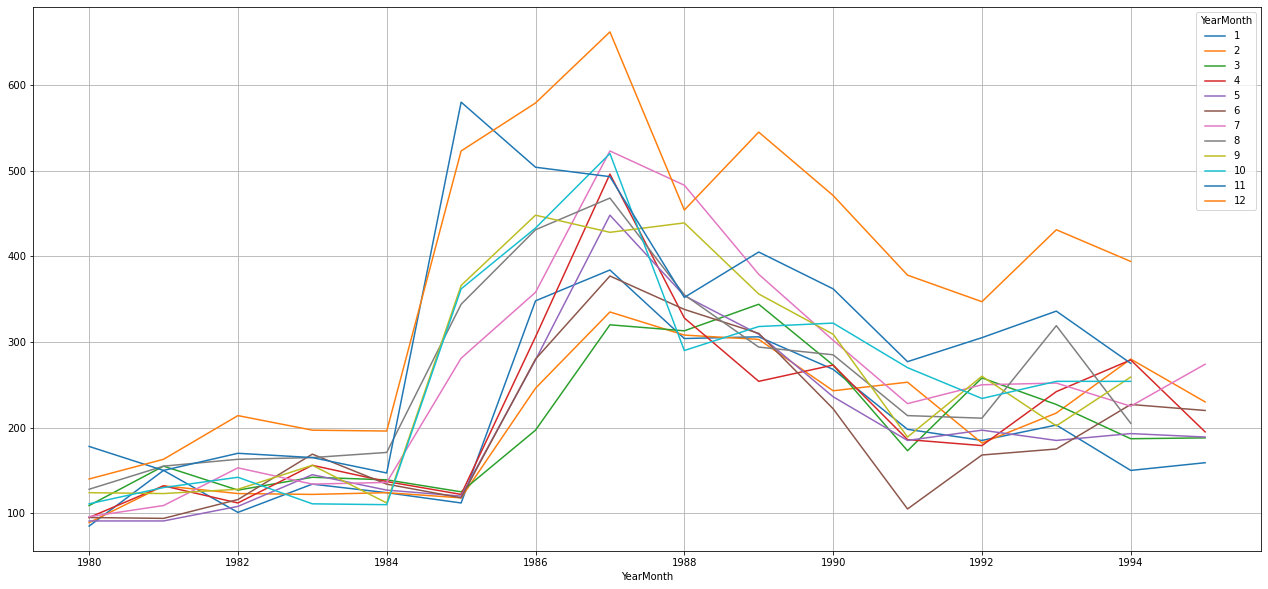

In [27]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

### Before heading to forecasting, First we need to check the trend and seasonality.

In [28]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1, model = 'additive')

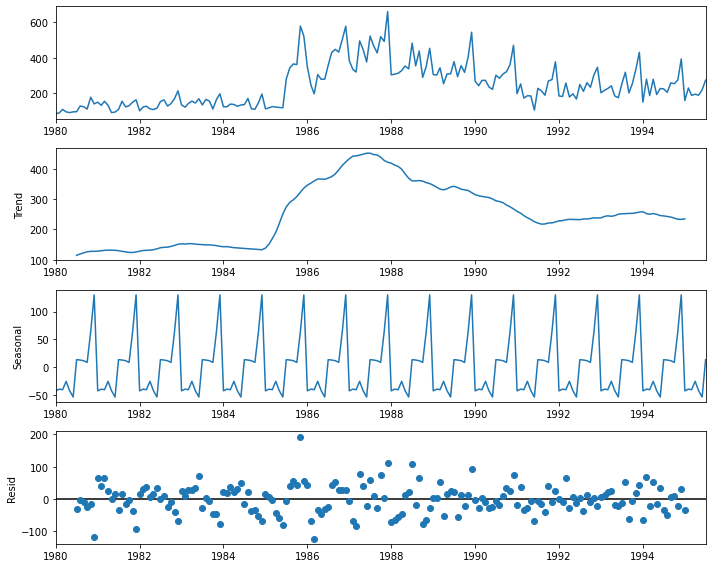

In [29]:
df1_add_decompose.plot()
plt.show()

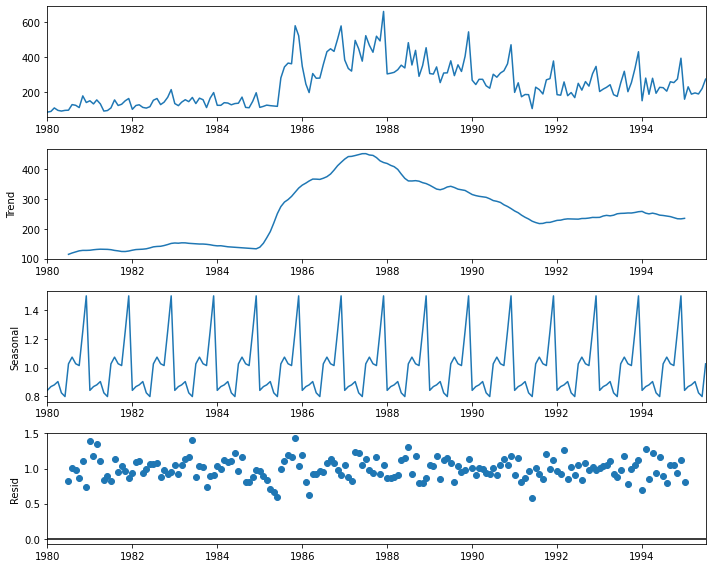

In [24]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

### Break the data into train and test datasets.

In [31]:
train             = df1[df1.index<'1991'] 
test              = df1[df1.index>'1991']

In [32]:
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91
...,...
1990-08-01,285
1990-09-01,309
1990-10-01,322


Test Data


,Shoe_Sales
YearMonth,
1991-02-01,253
1991-03-01,173
1991-04-01,186
1991-05-01,185
1991-06-01,105
1991-07-01,228
1991-08-01,214
1991-09-01,189
1991-10-01,270


In [64]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 1991-02-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  54 non-null     int64
dtypes: int64(1)
memory usage: 864.0 bytes


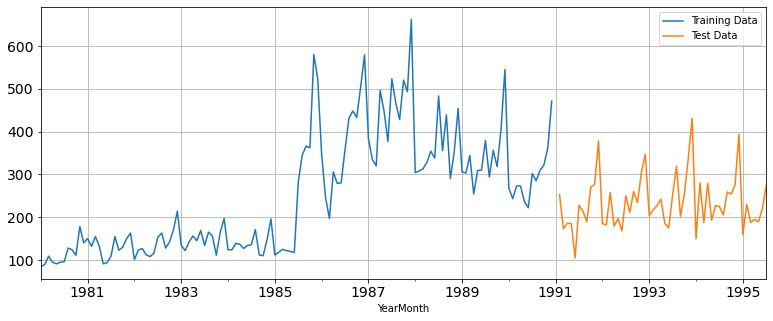

In [33]:
train['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
test['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression
!pip install numpy matplotlib scikit-learn

In [65]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]

In [71]:
train['Time'] = train_time
test['Time'] = test_time

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/555558576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Time'] = train_time
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/555558576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Time'] = test_time


In [74]:
X_train = train[['Time']]
y_train = train['Shoe_Sales']
X_test = test[['Time']]
y_test = test['Shoe_Sales']

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Shoe_Sales'], y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 264.51679449469304


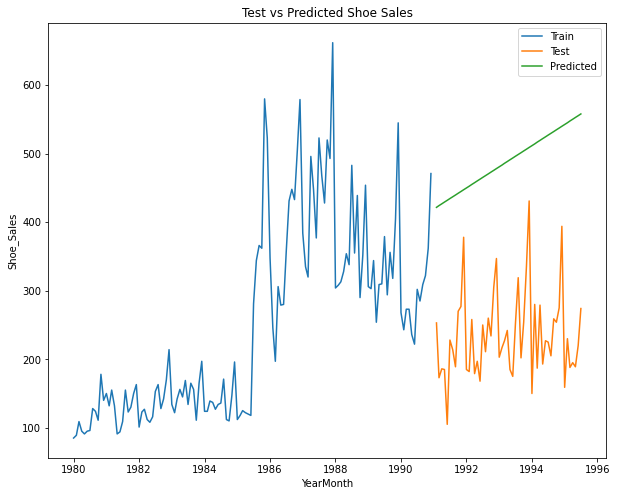

In [88]:
train_dates = pd.to_datetime(train.index)
plt.plot(train_dates, train['Shoe_Sales'], label='Train')
test_dates = pd.to_datetime(test.index)
plt.plot(test_dates, test['Shoe_Sales'], label='Test')
plt.plot(test_dates, y_pred, label='Predicted')
plt.xlabel('YearMonth')
plt.ylabel('Shoe_Sales')
plt.title('Test vs Predicted Shoe Sales')
plt.legend()
plt.show()

### Above models predicts the trend of sales.

### Naive Forecast

In [91]:
y_naive = np.array([train.iloc[-1]['Shoe_Sales']] * len(test))
naive_rmse = mean_squared_error(test['Shoe_Sales'], y_naive, squared=False)
print("Naive Forecast RMSE:", naive_rmse)

Naive Forecast RMSE: 244.57506611051537


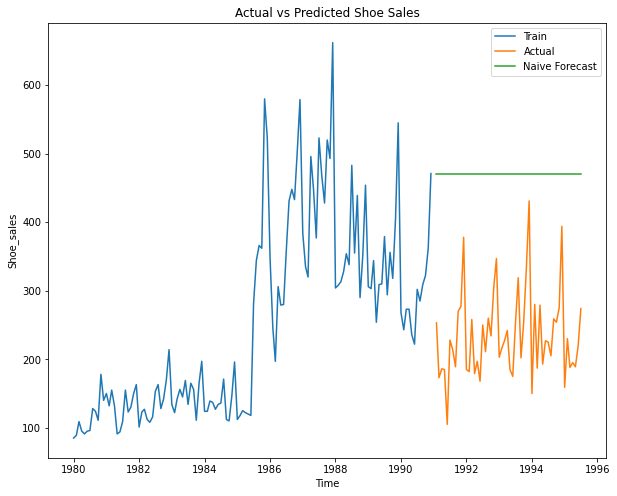

In [93]:
train_dates = pd.to_datetime(train.index)
plt.plot(train_dates, train['Shoe_Sales'], label='Train')
plt.plot(test.index, test['Shoe_Sales'], label='Actual')
plt.plot(test.index, y_naive, label='Naive Forecast')
plt.xlabel('Time')
plt.ylabel('Shoe_sales')
plt.title('Actual vs Predicted Shoe Sales')
plt.legend()
plt.show()

### Above Model Predicts the seasonality of Sales

### Lets perform the smoothening techniques to reduce Noise and enhance forecasting accuracy.

### Simple Average Smoothening

In [95]:
train_mean = train['Shoe_Sales'].mean()
y_pred = [train_mean] * len(test)
rmse = mean_squared_error(test['Shoe_Sales'], y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 64.17671978300159


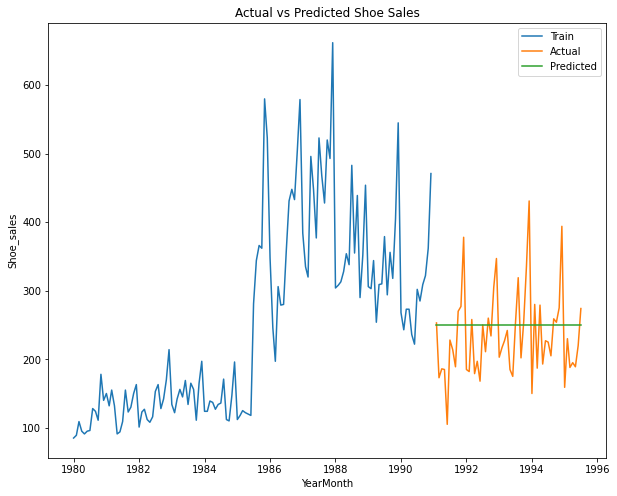

In [97]:
train_dates = pd.to_datetime(train.index)
plt.plot(train_dates, train['Shoe_Sales'], label='Train')
plt.plot(test.index, test['Shoe_Sales'], label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.xlabel('YearMonth')
plt.ylabel('Shoe_sales')
plt.title('Actual vs Predicted Shoe Sales')
plt.legend()
plt.show()

### Simple Exponential Smoothening

In [98]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [100]:
train             = df1[df1.index<'1991'] 
test              = df1[df1.index>'1991']

In [101]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [102]:
model_SES_autofit = model_SES.fit(optimized=True)

In [103]:
model_SES_autofit.params

{'smoothing_level': 0.6050492326837619,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82984937541246,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [104]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    420.229858
1991-02-01    420.229858
1991-03-01    420.229858
1991-04-01    420.229858
1991-05-01    420.229858
1991-06-01    420.229858
1991-07-01    420.229858
1991-08-01    420.229858
1991-09-01    420.229858
1991-10-01    420.229858
1991-11-01    420.229858
1991-12-01    420.229858
1992-01-01    420.229858
1992-02-01    420.229858
1992-03-01    420.229858
1992-04-01    420.229858
1992-05-01    420.229858
1992-06-01    420.229858
1992-07-01    420.229858
1992-08-01    420.229858
1992-09-01    420.229858
1992-10-01    420.229858
1992-11-01    420.229858
1992-12-01    420.229858
1993-01-01    420.229858
1993-02-01    420.229858
1993-03-01    420.229858
1993-04-01    420.229858
1993-05-01    420.229858
1993-06-01    420.229858
1993-07-01    420.229858
1993-08-01    420.229858
1993-09-01    420.229858
1993-10-01    420.229858
1993-11-01    420.229858
1993-12-01    420.229858
1994-01-01    420.229858
1994-02-01    420.229858
1994-03-01    420.229858
1994-04-01    420.229858


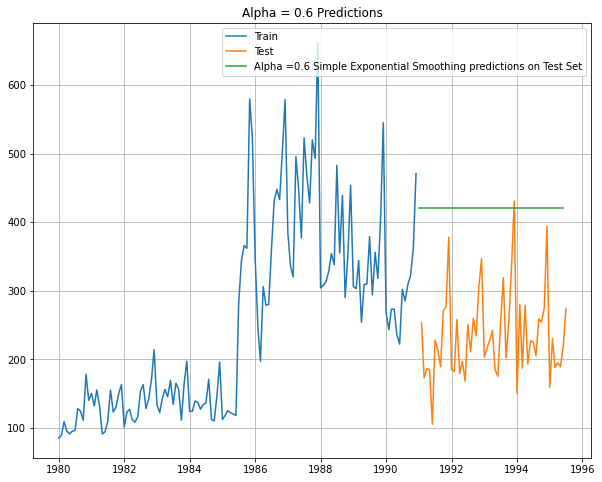

In [106]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.6 Predictions');

In [107]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 195.89449221296132


### Double Exponential Smoothing

In [109]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5944005376702972, 'smoothing_trend': 0.00027974296093176854, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93344201266473, 'initial_trend': 3.306823239177916, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [110]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    424.077851
1991-02-01    427.357602
1991-03-01    430.637352
1991-04-01    433.917103
1991-05-01    437.196854
1991-06-01    440.476605
1991-07-01    443.756356
1991-08-01    447.036107
1991-09-01    450.315858
1991-10-01    453.595609
1991-11-01    456.875360
1991-12-01    460.155111
1992-01-01    463.434862
1992-02-01    466.714613
1992-03-01    469.994364
1992-04-01    473.274115
1992-05-01    476.553866
1992-06-01    479.833617
1992-07-01    483.113368
1992-08-01    486.393119
1992-09-01    489.672870
1992-10-01    492.952621
1992-11-01    496.232372
1992-12-01    499.512123
1993-01-01    502.791874
1993-02-01    506.071625
1993-03-01    509.351376
1993-04-01    512.631127
1993-05-01    515.910878
1993-06-01    519.190629
1993-07-01    522.470380
1993-08-01    525.750131
1993-09-01    529.029882
1993-10-01    532.309633
1993-11-01    535.589384
1993-12-01    538.869135
1994-01-01    542.148886
1994-02-01    545.428637
1994-03-01    548.708388
1994-04-01    551.988139


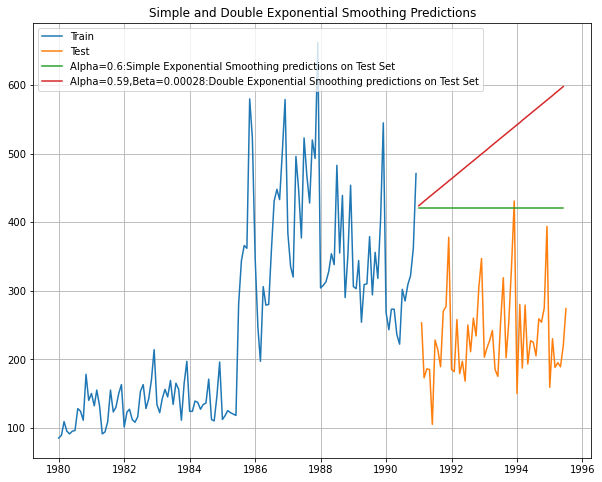

In [113]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.6:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.00028:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [128]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 286.4090482471201


### Triple Exponential Smoothening using Holt Winter's linear method with additive errors

In [116]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5707142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.29372180451127816, 'damping_trend': nan, 'initial_level': 116.47499999999994, 'initial_trend': 1.6939393939394014, 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
       -21.42013889, -11.18055556, -10.83680556,  18.14236111,
        -2.53472222, -12.53472222,  28.90277778,  40.87152778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [117]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    219.083658
1991-02-01    213.816321
1991-03-01    246.658224
1991-04-01    267.260236
1991-05-01    287.719744
1991-06-01    286.532259
1991-07-01    380.493545
1991-08-01    339.555860
1991-09-01    372.342545
1991-10-01    344.012031
1991-11-01    392.660570
1991-12-01    483.619562
1992-01-01    239.374793
1992-02-01    234.107456
1992-03-01    266.949358
1992-04-01    287.551371
1992-05-01    308.010879
1992-06-01    306.823393
1992-07-01    400.784679
1992-08-01    359.846995
1992-09-01    392.633680
1992-10-01    364.303165
1992-11-01    412.951705
1992-12-01    503.910697
1993-01-01    259.665928
1993-02-01    254.398590
1993-03-01    287.240493
1993-04-01    307.842506
1993-05-01    328.302014
1993-06-01    327.114528
1993-07-01    421.075814
1993-08-01    380.138129
1993-09-01    412.924815
1993-10-01    384.594300
1993-11-01    433.242840
1993-12-01    524.201832
1994-01-01    279.957063
1994-02-01    274.689725
1994-03-01    307.531628
1994-04-01    328.133640


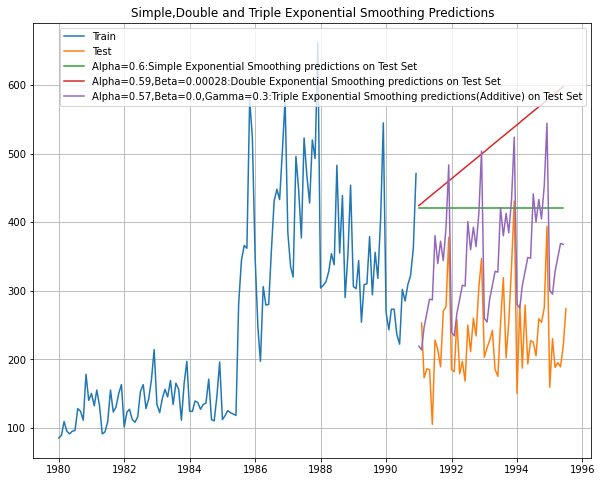

In [120]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.6:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.00028:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.57,Beta=0.0,Gamma=0.3:Triple Exponential Smoothing predictions(Additive) on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [127]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 142.69827463627703


### Triple Exponential Smoothening using Multiplicative Model

In [122]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5760758722416331, 'smoothing_trend': 0.00020158222674751197, 'smoothing_seasonal': 0.19824618620522388, 'damping_trend': nan, 'initial_level': 115.41068444621222, 'initial_trend': 0.2516415654000806, 'initial_seasons': array([1.07646256, 1.03143855, 1.25089992, 1.4385812 , 1.33081085,
       1.10018363, 1.20865787, 1.51191258, 1.75044286, 1.4767594 ,
       1.77782552, 1.96556386]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [123]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    261.748076
1991-02-01    243.581488
1991-03-01    257.762317
1991-04-01    271.961576
1991-05-01    269.017988
1991-06-01    258.639916
1991-07-01    341.532999
1991-08-01    318.156470
1991-09-01    342.614044
1991-10-01    317.202701
1991-11-01    379.361339
1991-12-01    470.201904
1992-01-01    265.629417
1992-02-01    247.188988
1992-03-01    261.575132
1992-04-01    275.979474
1992-05-01    272.987511
1992-06-01    262.451617
1992-07-01    346.560162
1992-08-01    322.833807
1992-09-01    347.644777
1992-10-01    321.854617
1992-11-01    384.918049
1992-12-01    477.080807
1993-01-01    269.510759
1993-02-01    250.796488
1993-03-01    265.387947
1993-04-01    279.997372
1993-05-01    276.957034
1993-06-01    266.263318
1993-07-01    351.587325
1993-08-01    327.511144
1993-09-01    352.675511
1993-10-01    326.506534
1993-11-01    390.474758
1993-12-01    483.959711
1994-01-01    273.392100
1994-02-01    254.403987
1994-03-01    269.200763
1994-04-01    284.015270


### Following plot shows result of all the Smoothening Models.

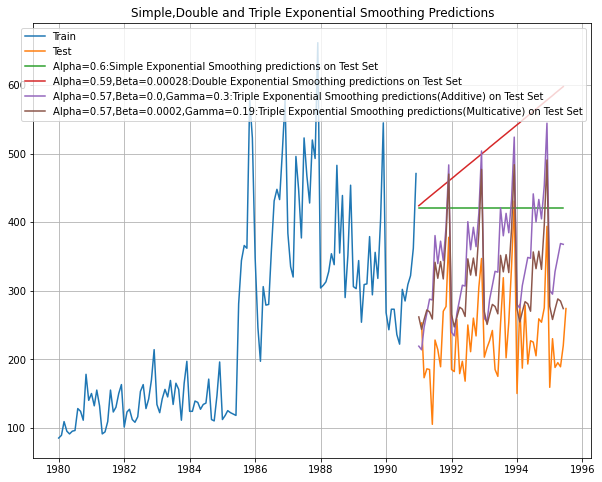

In [124]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.6:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.00028:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.57,Beta=0.0,Gamma=0.3:Triple Exponential Smoothing predictions(Additive) on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.57,Beta=0.0002,Gamma=0.19:Triple Exponential Smoothing predictions(Multicative) on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [126]:
print('TES_am RMSE :',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE : 111.47523803794569


### Problem Statement: You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drink has been given to you from January 1980 to July 1995.

In [148]:
#Load the Data
df2 = df1 = pd.read_csv('/Users/swanandmarathe/Downloads/SoftDrink.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [149]:
df2.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [150]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

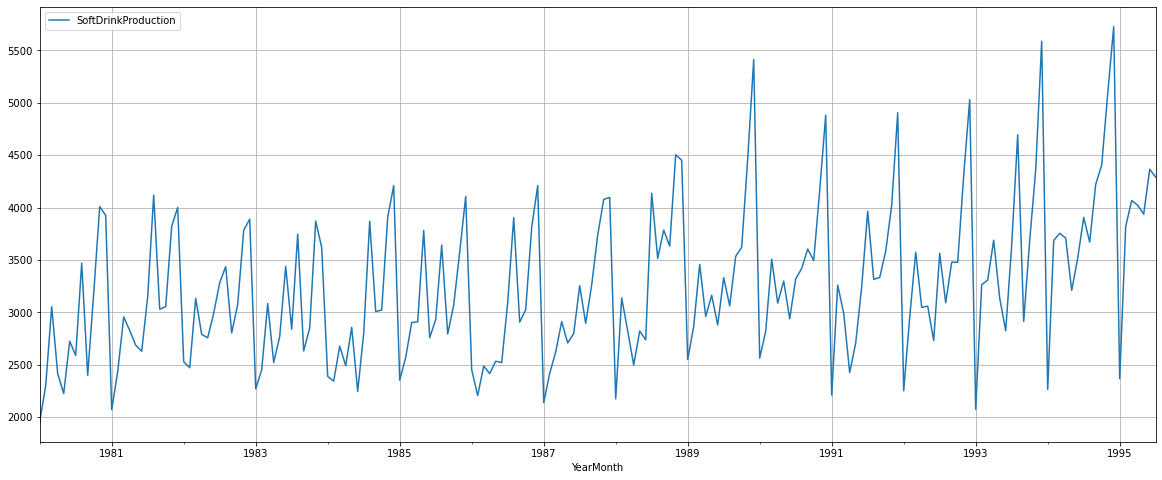

In [151]:
df2.plot()
plt.grid();

### Let us first run stationarity test on time series to understand the trend and seasonality.

In [152]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

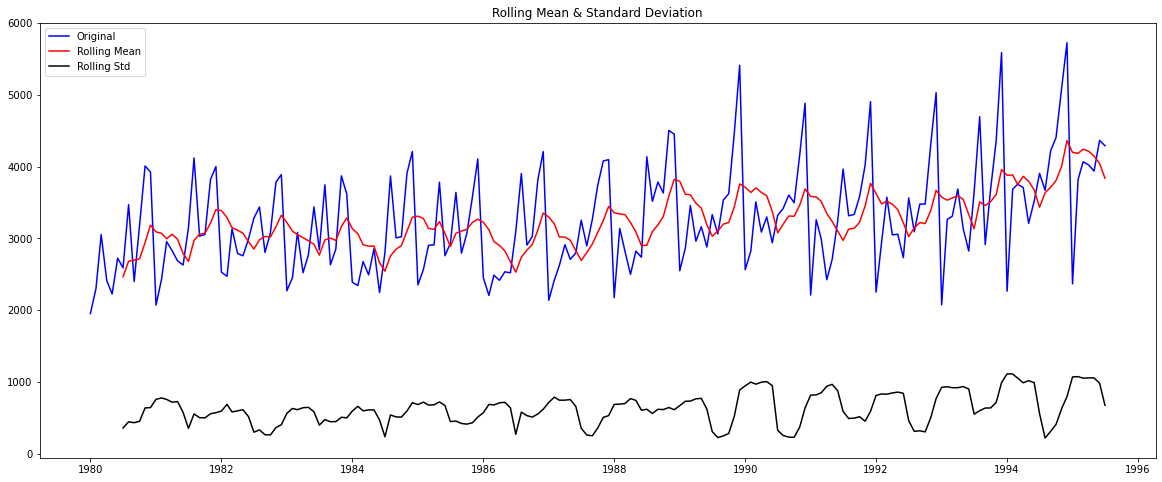

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [153]:
test_stationarity(df2['SoftDrinkProduction'])

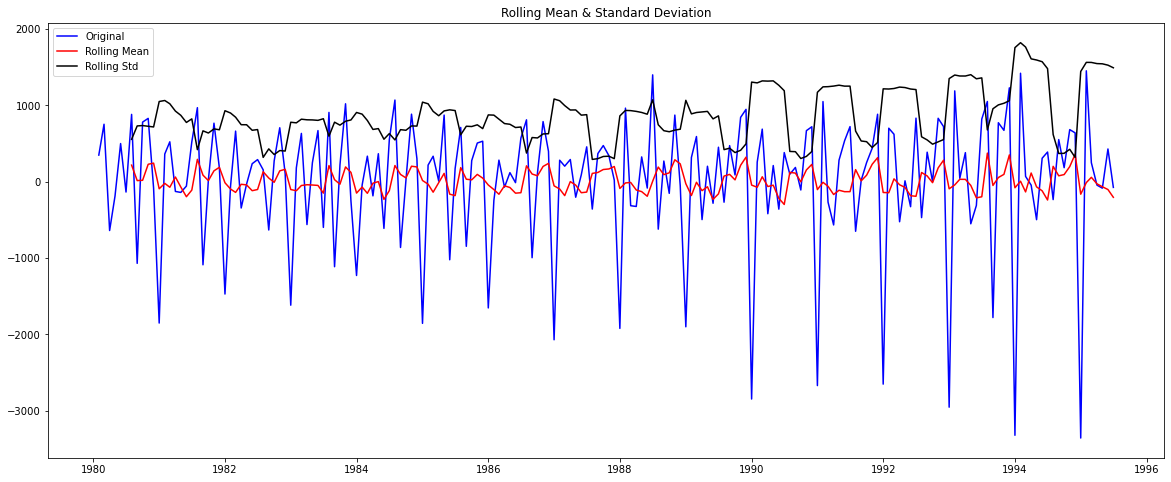

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [154]:
test_stationarity(df2['SoftDrinkProduction'].diff().dropna())

### Before heading to forecasting, We need to run autocorrelation.

In [179]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

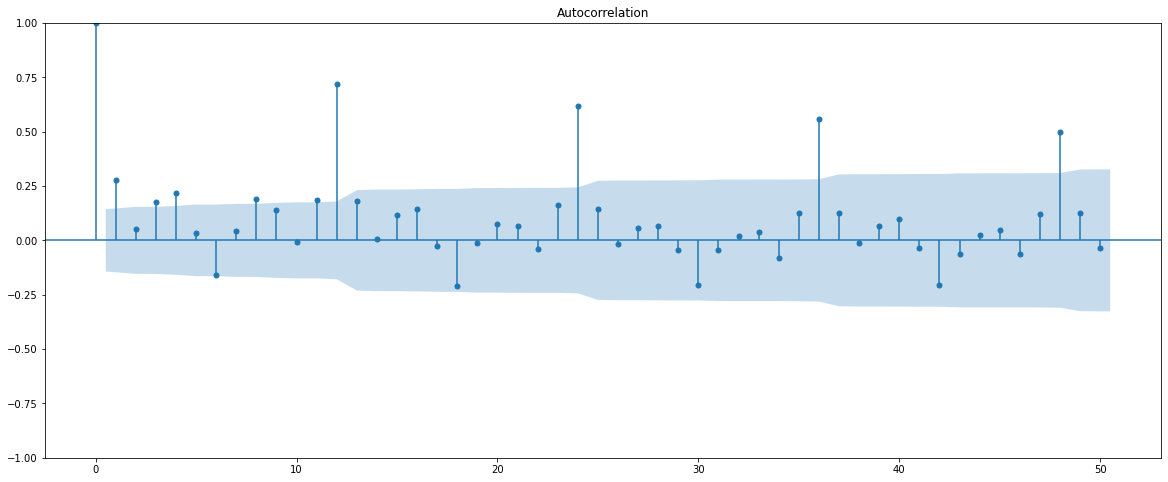

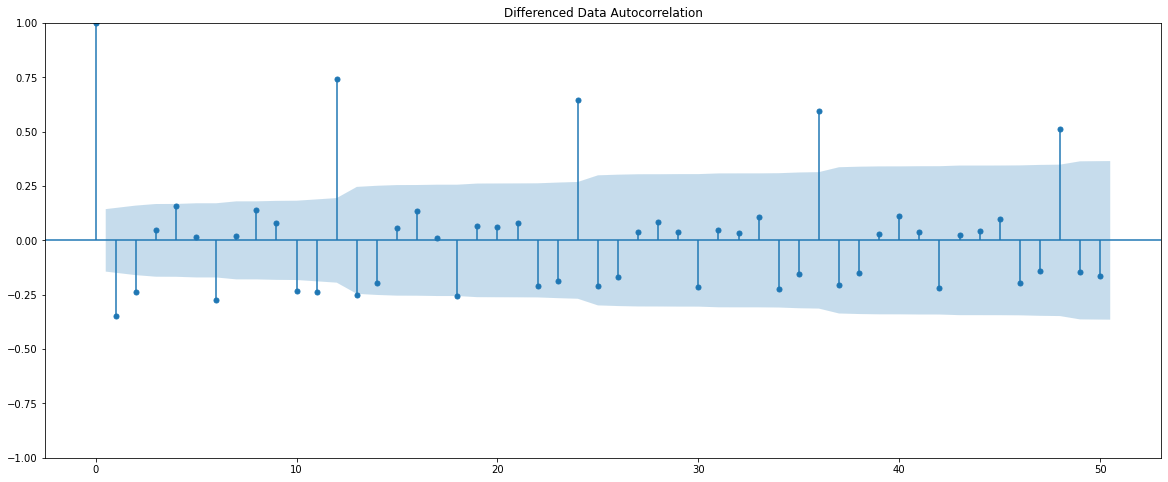

In [180]:
plot_acf(df2['SoftDrinkProduction'],lags=50)
plot_acf(df2['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


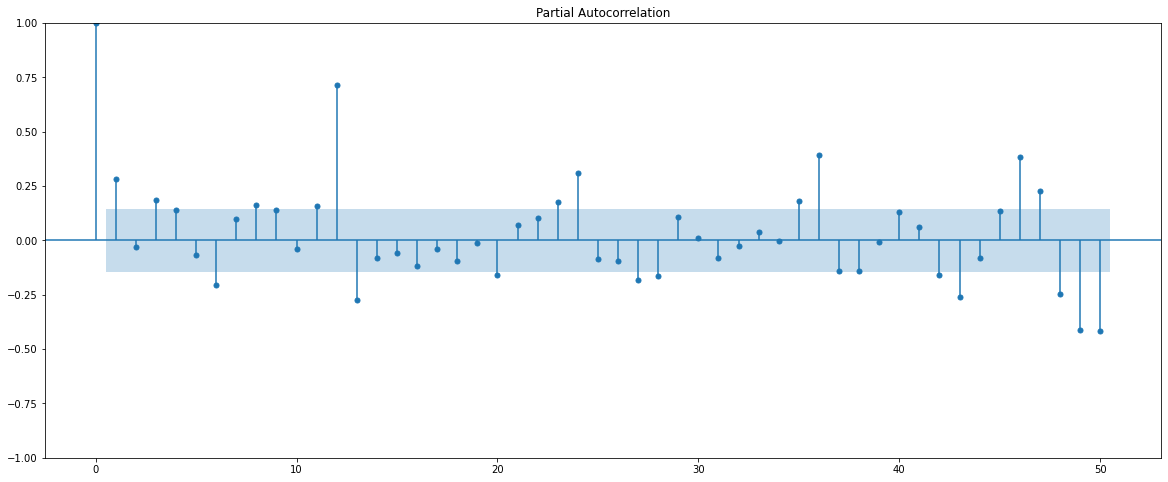

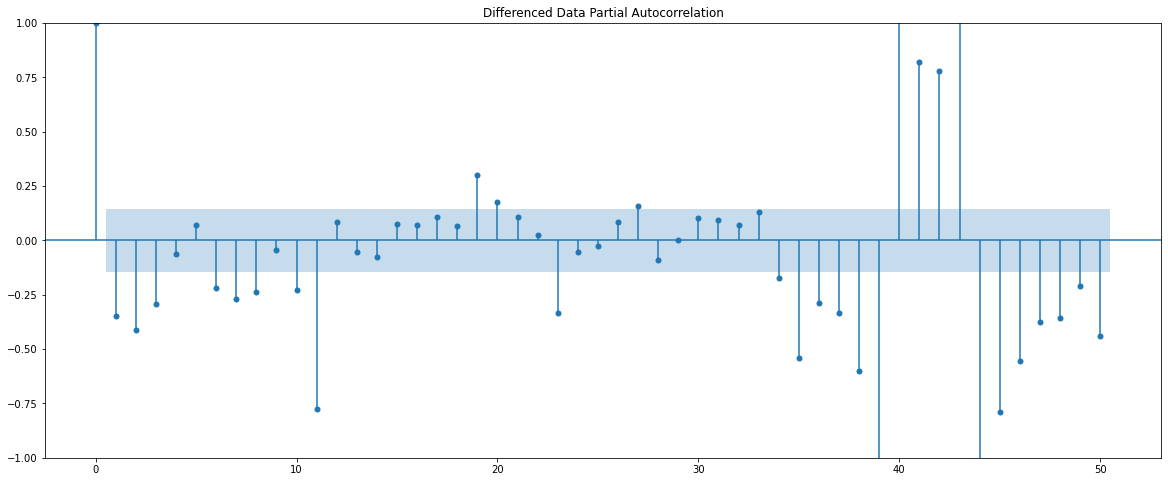

In [182]:
plot_pacf(df2['SoftDrinkProduction'],lags=50)
plot_pacf(df2['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### Lets divide data into train and test datasets.

In [157]:
df2.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [170]:
train=df2[df2.index.year < 1993]
test=df2[df2.index.year >= 1993]

In [171]:
from IPython.display import display

In [172]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


Last few rows of Training Data


,SoftDrinkProduction
YearMonth,
1992-08-01,3092
1992-09-01,3478
1992-10-01,3478
1992-11-01,4308
1992-12-01,5029


First few rows of Test Data


,SoftDrinkProduction
YearMonth,
1993-01-01,2075
1993-02-01,3264
1993-03-01,3308
1993-04-01,3688
1993-05-01,3136


Last few rows of Test Data


,SoftDrinkProduction
YearMonth,
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937
1995-06-01,4365
1995-07-01,4290


In [173]:
print(train.shape)
print(test.shape)

(156, 1)
(31, 1)


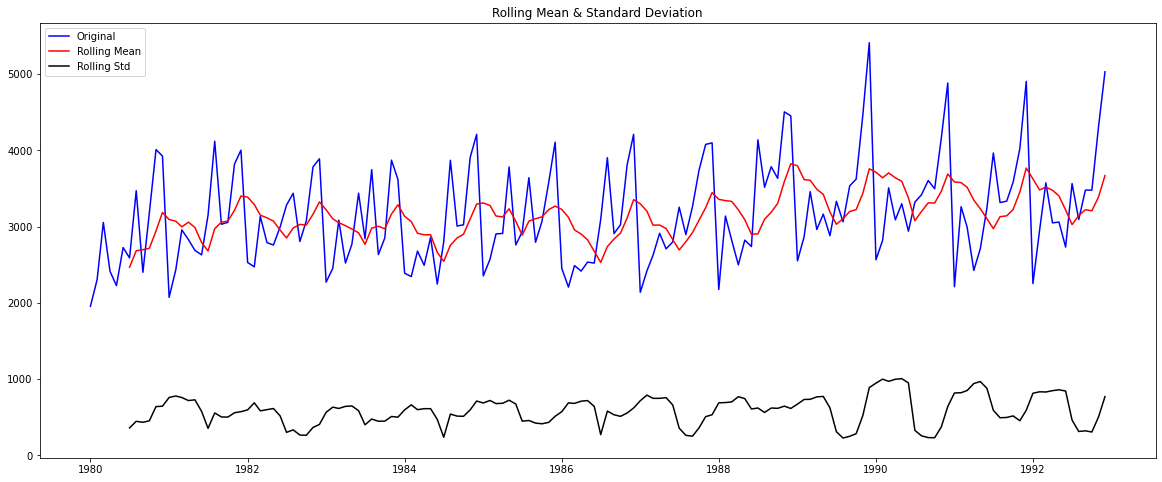

Results of Dickey-Fuller Test:
Test Statistic                  -1.436441
p-value                          0.564686
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64 



In [174]:
test_stationarity(train['SoftDrinkProduction'])

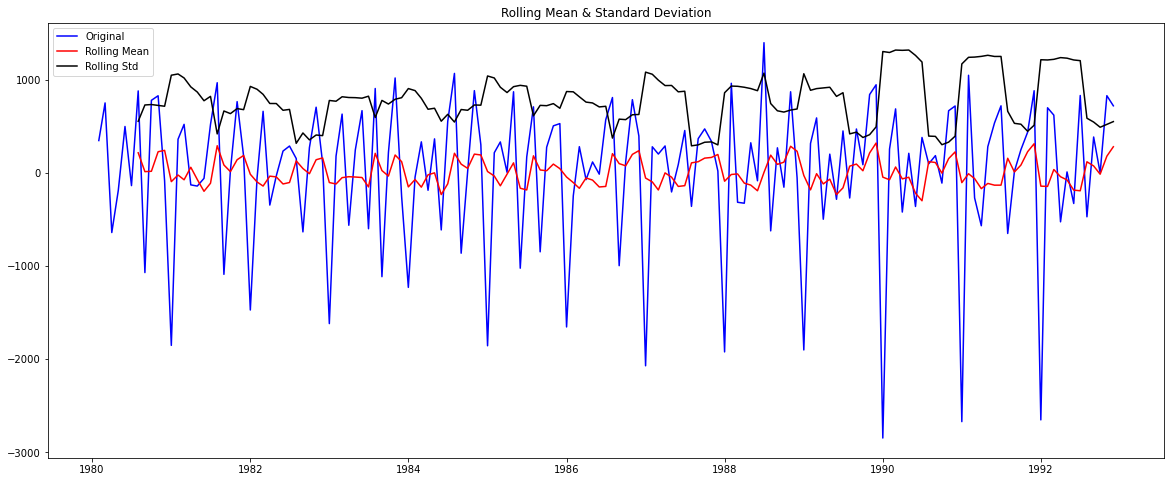

Results of Dickey-Fuller Test:
Test Statistic                -7.900743e+00
p-value                        4.191815e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.430000e+02
Critical Value (1%)           -3.476927e+00
Critical Value (5%)           -2.881973e+00
Critical Value (10%)          -2.577665e+00
dtype: float64 



In [175]:
test_stationarity(train['SoftDrinkProduction'].diff().dropna())

### SARIMA Modelling

In [184]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [185]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [186]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96901D+00    |proj g|=  1.49341D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   1.648D-07   7.969D+00
  F =   7.9689802437475734     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2488.321836049243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables 

 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:2216.7321504639413
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.87053D+00    |proj g|=  8.45566D-02

At iterate    5    f=  6.86254D+00    |proj g|=  9.68566D-04

At iterate   10    f=  6.86252D+00    |proj g|=  2.39353D-03

At iterate   15    f=  6.86040D+00    |proj g|=  3.57793D-02

At iterate   20    f=  6.80492D+00    |proj g|=  1.47249D-01

At iterate   25    f=  6.78981D+00    |proj g|=  1.20026D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:2126.4194133010824
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66959D+00    |proj g|=  5.24967D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.250D-06   7.670D+00
  F =   7.6695905892834135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2396.912263856425
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2315.8680124167004
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13137D+00    |proj g|=  1.37002D-01

At iterate    5    f=  7.10378D+00    |proj g|=  8.65236D-02

At iterate   10    f=  7.08800D+00    |proj g|=  3.23788D-02

At iterate   15    f=  7.08679D+00    |proj g|=  6.22505D-04

At iterate   20    f=  7.08636D+00    |proj g|=  2.39951D-02

At iterate   25    f=  7.02826D+00    |proj g|=  3.36221D-01

At iterate   30    f=  6.99343D+00    |proj g|=  1.02185D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:2189.9374959097513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85291D+00    |proj g|=  2.16592D-01

At iterate    5    f=  6.77670D+00    |proj g|=  1.68420D-01

At iterate   10    f=  6.76330D+00    |proj g|=  6.69135D-04

At iterate   15    f=  6.76320D+00    |proj g|=  5.49264D-03

At iterate   20    f=  6.75047D+00    |proj g|=  7.01494D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.65465D+00    |proj g|=  5.00939D-01

At iterate   30    f=  6.63906D+00    |proj g|=  2.85305D-03

At iterate   35    f=  6.63905D+00    |proj g|=  4.41860D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     49      1     0     0   4.419D-06   6.639D+00
  F =   6.6390523994053892     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:2081.3843486144815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be remov


At iterate    5    f=  6.76775D+00    |proj g|=  3.83433D-02

At iterate   10    f=  6.76755D+00    |proj g|=  7.64608D-04

At iterate   15    f=  6.76754D+00    |proj g|=  5.88333D-03

At iterate   20    f=  6.76700D+00    |proj g|=  7.35918D-02

At iterate   25    f=  6.75917D+00    |proj g|=  1.61416D-01

At iterate   30    f=  6.75775D+00    |proj g|=  1.82169D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   2.414D-05   6.758D+00
  F =   6.7577483989276477     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:2118.41750046542

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.48076D+00    |proj g|=  1.60743D-02

At iterate   30    f=  6.48065D+00    |proj g|=  8.07247D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     36      1     0     0   7.660D-05   6.481D+00
  F =   6.4806543122955143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:2033.9641454362004
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59900D+00    |proj g|=  1.34153D-05

           * * 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     24      1     0     0   1.559D-04   6.580D+00
  F =   6.5795933427829167     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:2062.83312294827
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54563D+00    |proj g|=  2.74231D-01

At iterate    5    f=  6.53218D+00    |proj g|=  9.29359D-03

At iterate   10    f=  6.53208D+00    |proj g|=  8.08684D-03

At iterate   15  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.52986D+00    |proj g|=  5.59478D-02

At iterate   30    f=  6.52315D+00    |proj g|=  6.04119D-03

At iterate   35    f=  6.52309D+00    |proj g|=  2.57570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     40      1     0     0   7.246D-05   6.523D+00
  F =   6.5230898227932750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:2047.204024711502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.48622D+00    |proj g|=  5.37504D-04

At iterate   25    f=  6.48609D+00    |proj g|=  2.04099D-02

At iterate   30    f=  6.48391D+00    |proj g|=  7.44303D-02

At iterate   35    f=  6.48005D+00    |proj g|=  9.12561D-04

At iterate   40    f=  6.48005D+00    |proj g|=  5.80291D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     47      1     0     0   5.803D-06   6.480D+00
  F =   6.4800458664026923     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:2035.7743103176401
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2315.2994394656707
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01480D+00    |proj g|=  8.23083D-02

At iterate    5    f=  6.98166D+00    |proj g|=  1.18038D-02

At iterate   10    f=  6.98164D+00    |proj g|=  2.12136D-03

At iterate   15    f=  6.98143D+00    |proj g|=  1.28059D-02

At iterate   20    f=  6.95893D+00    |proj g|=  3.30985D-01

At iterate   25    f=  6.87875D+00    |proj g|=  1.56777D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:2154.147473766602
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72723D+00    |proj g|=  1.25055D-01

At iterate    5    f=  6.68636D+00    |proj g|=  2.92308D-02

At iterate   10    f=  6.68537D+00    |proj g|=  6.45983D-04

At iterate   15    f=  6.68523D+00    |proj g|=  9.09976D-03

At iterate   20    f=  6.66958D+00    |proj g|=  9.94979D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.60359D+00    |proj g|=  1.60735D-01

At iterate   30    f=  6.58794D+00    |proj g|=  3.46776D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   1.609D-05   6.588D+00
  F =   6.5879293874025233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:2065.4339688695873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.55088D+00    |proj g|=  1.80745D-01

At iterate    5

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   35    f=  7.08219D+00    |proj g|=  1.78178D-02

At iterate   40    f=  7.08217D+00    |proj g|=  6.94538D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     55      1     0     0   6.945D-06   7.082D+00
  F =   7.0821737386896491     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2217.6382064711706


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00217D+00    |proj g|=  1.04009D-01

At iterate    5    f=  6.95936D+00    |proj g|=  5.70280D-02

At iterate   10    f=  6.93332D+00    |proj g|=  3.34392D-01

At iterate   15    f=  6.91675D+00    |proj g|=  4.18044D-02

At iterate   20    f=  6.91603D+00    |proj g|=  8.69449D-04

At iterate   25    f=  6.91598D+00    |proj g|=  1.36554D-02

At iterate   30    f=  6.90855D+00    |proj g|=  2.00095D-01

At iterate   35    f=  6.76365D+00    |proj g|=  2.82712D-01

At iterate   40    f=  6.70225D+00    |proj g|=  5.95367D-02

At iterate   45    f=  6.70191D+00    |proj g|=  9.17045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.61101D+00    |proj g|=  8.57405D-04

At iterate   20    f=  6.61068D+00    |proj g|=  2.09764D-02

At iterate   25    f=  6.59159D+00    |proj g|=  1.58354D-01

At iterate   30    f=  6.47717D+00    |proj g|=  1.55819D-01

At iterate   35    f=  6.39634D+00    |proj g|=  2.09488D-01

At iterate   40    f=  6.38581D+00    |proj g|=  7.54708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     63      1     0     0   9.284D-06   6.386D+00
  F =   6.3858073286512784     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:2004.37188653919

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:2103.6619949670267
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99621D+00    |proj g|=  4.54329D-02

At iterate    5    f=  6.98699D+00    |proj g|=  1.85149D-03

At iterate   10    f=  6.98656D+00    |proj g|=  1.18276D-02

At iterate   15    f=  6.98620D+00    |proj g|=  3.33826D-03

At iterate   20    f=  6.98611D+00    |proj g|=  7.61864D-03

At iterate   25    f=  6.97907D+00    |proj g|=  7.46902D-02

At iterate   30    f=  6.94380D+00    |proj g|=  1.56526D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   35    f=  6.72758D+00    |proj g|=  1.53189D-01

At iterate   40    f=  6.71828D+00    |proj g|=  4.46576D-03

At iterate   45    f=  6.71260D+00    |proj g|=  2.41002D-01

At iterate   50    f=  6.70780D+00    |proj g|=  4.54863D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     54     80      1     0     0   9.572D-06   6.708D+00
  F =   6.7077932042692074     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:2102.8314797319927
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.57357D+00    |proj g|=  5.55072D-01

At iterate   35    f=  6.51271D+00    |proj g|=  3.24084D-01

At iterate   40    f=  6.50176D+00    |proj g|=  8.08370D-03

At iterate   45    f=  6.50172D+00    |proj g|=  1.26125D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     56      1     0     0   1.266D-05   6.502D+00
  F =   6.5017209638341509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:2040.536940716255
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.45092D+00    |proj g|=  9.68293D-02

At iterate   25    f=  6.29170D+00    |proj g|=  1.64679D-01

At iterate   30    f=  6.23323D+00    |proj g|=  1.55841D-02

At iterate   35    f=  6.23306D+00    |proj g|=  3.06204D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     56      1     0     0   6.082D-05   6.233D+00
  F =   6.2330596534884677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:1958.714611888402
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.44228D+00    |proj g|=  1.25832D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     39      1     0     0   1.258D-05   6.442D+00
  F =   6.4422840854590460     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:2019.9926346632224
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70427D+00    |proj g|=  5.39659D-02

At iterate    5    f=  6.69159D+00    |proj g|=  2.94655D-03

At iterate   10

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.63992D+00    |proj g|=  3.45236D-01

At iterate   30    f=  6.40518D+00    |proj g|=  5.37573D-02

At iterate   35    f=  6.40452D+00    |proj g|=  2.42806D-03

At iterate   40    f=  6.40452D+00    |proj g|=  6.44117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     52      1     0     0   1.479D-04   6.405D+00
  F =   6.4045155303625858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:2010.2088454731268
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.60401D+00    |proj g|=  2.27223D-01

At iterate   30    f=  6.45878D+00    |proj g|=  1.63057D-01

At iterate   35    f=  6.37940D+00    |proj g|=  2.19959D-01

At iterate   40    f=  6.32096D+00    |proj g|=  4.75463D-02

At iterate   45    f=  6.32023D+00    |proj g|=  9.38921D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     69      1     0     0   6.833D-05   6.320D+00
  F =   6.3202264282473033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:1985.9106456131587
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.57062D+00    |proj g|=  9.95645D-03

At iterate   25    f=  6.56166D+00    |proj g|=  6.24712D-02

At iterate   30    f=  6.38271D+00    |proj g|=  2.35088D-01

At iterate   35    f=  6.27030D+00    |proj g|=  8.79339D-02

At iterate   40    f=  6.24008D+00    |proj g|=  5.49479D-02

At iterate   45    f=  6.23358D+00    |proj g|=  8.17582D-02

At iterate   50    f=  6.23272D+00    |proj g|=  5.03821D-03

At iterate   55    f=  6.23271D+00    |proj g|=  1.57913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     56     67      1     0     0   6.876D-05   6.233D+00
  F =   6.23270980377

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2293.6287274231245
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91880D+00    |proj g|=  9.95434D-02

At iterate    5    f=  6.90171D+00    |proj g|=  5.34350D-03

At iterate   10    f=  6.90162D+00    |proj g|=  7.09237D-04

At iterate   15    f=  6.90161D+00    |proj g|=  6.58941D-03

At iterate   20    f=  6.90104D+00    |proj g|=  2.09804D-02

At iterate   25    f=  6.87328D+00    |proj g|=  3.51464D-01

At iterate   30    f=  6.79212D+00    |proj g|=  6.96439D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:2129.1377673122843
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.62772D+00    |proj g|=  9.91799D-02

At iterate    5    f=  6.60664D+00    |proj g|=  7.89326D-03

At iterate   10    f=  6.60652D+00    |proj g|=  6.79502D-04

At iterate   15    f=  6.60633D+00    |proj g|=  2.30033D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.58047D+00    |proj g|=  1.24280D-01

At iterate   25    f=  6.50196D+00    |proj g|=  9.22568D-02

At iterate   30    f=  6.50120D+00    |proj g|=  2.77936D-03

At iterate   35    f=  6.50119D+00    |proj g|=  3.07203D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     41      1     0     0   3.072D-05   6.501D+00
  F =   6.5011935095957840     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:2040.3723749938845
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.18127D+00    |proj g|=  1.72551D-02

At iterate   25    f=  7.17642D+00    |proj g|=  2.25369D-01

At iterate   30    f=  7.11844D+00    |proj g|=  4.53770D-01

At iterate   35    f=  7.04132D+00    |proj g|=  1.77399D-01

At iterate   40    f=  7.03651D+00    |proj g|=  5.97937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     60      1     0     0   2.467D-05   7.037D+00
  F =   7.0365138706544936     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:2205.392327644202
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.84357D+00    |proj g|=  1.67792D-01

At iterate   35    f=  6.74706D+00    |proj g|=  2.55527D-01

At iterate   40    f=  6.66938D+00    |proj g|=  2.77654D-01

At iterate   45    f=  6.64885D+00    |proj g|=  7.37857D-03

At iterate   50    f=  6.64880D+00    |proj g|=  1.20148D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     51     70      1     0     0   3.428D-05   6.649D+00
  F =   6.6488034195649091     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:2086.4266669042518
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.54198D+00    |proj g|=  9.72200D-03

At iterate   20    f=  6.54182D+00    |proj g|=  3.98559D-03

At iterate   25    f=  6.54180D+00    |proj g|=  4.26593D-03

At iterate   30    f=  6.54070D+00    |proj g|=  4.01445D-02

At iterate   35    f=  6.51782D+00    |proj g|=  1.00061D-01

At iterate   40    f=  6.45157D+00    |proj g|=  1.91106D-01

At iterate   45    f=  6.33405D+00    |proj g|=  1.14619D-01

At iterate   50    f=  6.33078D+00    |proj g|=  7.47659D-03

At iterate   55    f=  6.33064D+00    |proj g|=  2.93568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     56     71   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:2095.435944550965
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96334D+00    |proj g|=  3.72160D-02

At iterate    5    f=  6.95985D+00    |proj g|=  4.96409D-03

At iterate   10    f=  6.95926D+00    |proj g|=  9.78374D-04

At iterate   15    f=  6.95897D+00    |proj g|=  1.45960D-02

At iterate   20    f=  6.91740D+00    |proj g|=  2.86710D-01

At iterate   25    f=  6.76007D+00    |proj g|=  1.93144D-01

At iterate   30    f=  6.68408D+00    |proj g|=  1.35811D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   35    f=  6.68203D+00    |proj g|=  4.06047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     47      1     0     0   2.265D-05   6.682D+00
  F =   6.6820257074684246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:2096.7920207301486


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80192D+00    |proj g|=  8.74132D-02

At iterate    5    f=  6.79441D+00    |proj g|=  2.86711D-02

At iterate   10    f=  6.79384D+00    |proj g|=  1.08471D-03

At iterate   15    f=  6.79372D+00    |proj g|=  8.01165D-03

At iterate   20    f=  6.78504D+00    |proj g|=  7.47571D-02

At iterate   25    f=  6.55504D+00    |proj g|=  4.47209D-01

At iterate   30    f=  6.46305D+00    |proj g|=  1.61384D-01

At iterate   35    f=  6.45359D+00    |proj g|=  2.71730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.47352D+00    |proj g|=  1.14416D-01

At iterate   25    f=  6.25261D+00    |proj g|=  1.00121D-01

At iterate   30    f=  6.18813D+00    |proj g|=  8.72259D-02

At iterate   35    f=  6.17793D+00    |proj g|=  1.82568D-02

At iterate   40    f=  6.17779D+00    |proj g|=  4.18665D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     61      1     0     0   4.842D-05   6.178D+00
  F =   6.1777878487761271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:1943.4698088181517
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.40924D+00    |proj g|=  6.55219D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     38      1     0     0   7.302D-06   6.409D+00
  F =   6.4092435566537214     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:2011.6839896759611


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.67098D+00    |proj g|=  4.68202D-02

At iterate    5    f=  6.66667D+00    |proj g|=  5.04937D-03

At iterate   10    f=  6.66542D+00    |proj g|=  2.88930D-02

At iterate   15    f=  6.66286D+00    |proj g|=  7.26034D-03

At iterate   20    f=  6.66274D+00    |proj g|=  1.52051D-03

At iterate   25    f=  6.65552D+00    |proj g|=  5.76678D-02

At iterate   30    f=  6.58948D+00    |proj g|=  1.59902D-01

At iterate   35    f=  6.41744D+00    |proj g|=  1.48367D-01

At iterate   40    f=  6.39207D+00    |proj g|=  1.19075D-02

At iterate   45    f=  6.39199D+00    |proj g|=  6.28705D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.64854D+00    |proj g|=  7.05866D-03

At iterate   25    f=  6.62909D+00    |proj g|=  6.21329D-02

At iterate   30    f=  6.55591D+00    |proj g|=  1.92354D-01

At iterate   35    f=  6.36547D+00    |proj g|=  5.27528D-01

At iterate   40    f=  6.31595D+00    |proj g|=  2.13418D-02

At iterate   45    f=  6.31558D+00    |proj g|=  7.92750D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     67      1     0     0   2.941D-05   6.316D+00
  F =   6.3155830296239399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:1986.46190524266

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.50284D+00    |proj g|=  2.82854D-03

At iterate   20    f=  6.50203D+00    |proj g|=  3.61506D-02

At iterate   25    f=  6.50079D+00    |proj g|=  1.49707D-02

At iterate   30    f=  6.48432D+00    |proj g|=  5.35522D-02

At iterate   35    f=  6.46998D+00    |proj g|=  9.08670D-02

At iterate   40    f=  6.43126D+00    |proj g|=  1.44333D-01

At iterate   45    f=  6.41891D+00    |proj g|=  3.85992D-02

At iterate   50    f=  6.40968D+00    |proj g|=  2.79978D-01

At iterate   55    f=  6.33735D+00    |proj g|=  1.16566D+00

At iterate   60    f=  6.19647D+00    |proj g|=  4.95901D-01

At iterate   65    f=  6.17975D+00    |proj g|=  2.55814D-02

At iterate   70    f=  6.17823D+00    |proj g|=  2.14629D-02

At iterate   75    f=  6.17791D+00    |proj g|=  1.17958D-02

At iterate   80    f=  6.17779D+00    |proj g|=  7.59965D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  7.25955D+00    |proj g|=  2.17245D-02

At iterate   35    f=  7.25937D+00    |proj g|=  9.84848D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     40      1     0     0   9.848D-06   7.259D+00
  F =   7.2593721194422915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:2274.924101265995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85935D+00    |proj g|=  1.36505D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.82931D+00    |proj g|=  2.16558D-02

At iterate   10    f=  6.82901D+00    |proj g|=  6.83782D-04

At iterate   15    f=  6.82898D+00    |proj g|=  4.15737D-03

At iterate   20    f=  6.82678D+00    |proj g|=  4.10355D-02

At iterate   25    f=  6.76079D+00    |proj g|=  8.91441D-02

At iterate   30    f=  6.74034D+00    |proj g|=  7.71692D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     44      1     0     0   4.156D-05   6.740D+00
  F =   6.7403175616608770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:2114.97907923819

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57010D+00    |proj g|=  1.45766D-01

At iterate    5    f=  6.53561D+00    |proj g|=  3.73343D-02

At iterate   10    f=  6.53471D+00    |proj g|=  9.63557D-04

At iterate   15    f=  6.53470D+00    |proj g|=  3.36518D-03

At iterate   20    f=  6.53441D+00    |proj g|=  9.52849D-03

At iterate   25    f=  6.49866D+00    |proj g|=  2.21235D-01

At iterate   30    f=  6.44880D+00    |proj g|=  2.44944D-02

At iterate   35    f=  6.44858D+00    |proj g|=  3.75185D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.09159D+00    |proj g|=  4.95226D-03

At iterate   25    f=  7.09028D+00    |proj g|=  1.14007D-01

At iterate   30    f=  7.02646D+00    |proj g|=  2.86108D-01

At iterate   35    f=  6.95590D+00    |proj g|=  8.66687D-02

At iterate   40    f=  6.95565D+00    |proj g|=  7.36185D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     52      1     0     0   2.670D-04   6.956D+00
  F =   6.9556547261579249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:2182.1642745612726


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84380D+00    |proj g|=  1.26833D-01

At iterate    5    f=  6.80973D+00    |proj g|=  2.69950D-02

At iterate   10    f=  6.77843D+00    |proj g|=  8.88223D-02

At iterate   15    f=  6.76356D+00    |proj g|=  5.58387D-02

At iterate   20    f=  6.75961D+00    |proj g|=  1.75770D-02

At iterate   25    f=  6.75943D+00    |proj g|=  7.14083D-03

At iterate   30    f=  6.75942D+00    |proj g|=  1.76761D-03

At iterate   35    f=  6.75897D+00    |proj g|=  4.00439D-02

At iterate   40    f=  6.72167D+00    |proj g|=  1.08072D-01

At iterate   45    f=  6.66918D+00    |proj g|=  8.17939D-02

At iterate   50    f=  6.58682D+00    |proj g|=  1.21135D-01

At iterate   55    f=  6.57259D+00    |proj g|=  2.06949D-02

At iterate   60    f=  6.57090D+00    |proj g|=  1.23165D-03

           * * *

Tit   = 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.46906D+00    |proj g|=  6.23008D-02

At iterate   15    f=  6.46366D+00    |proj g|=  7.92489D-03

At iterate   20    f=  6.46337D+00    |proj g|=  1.36929D-03

At iterate   25    f=  6.46319D+00    |proj g|=  2.69154D-03

At iterate   30    f=  6.44597D+00    |proj g|=  8.72078D-02

At iterate   35    f=  6.32585D+00    |proj g|=  5.25117D-01

At iterate   40    f=  6.27644D+00    |proj g|=  1.23701D-01

At iterate   45    f=  6.27380D+00    |proj g|=  2.02496D-02

At iterate   50    f=  6.27369D+00    |proj g|=  1.48101D-03

At iterate   55    f=  6.27369D+00    |proj g|=  7.80172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:2097.4345313518425
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94130D+00    |proj g|=  8.15920D-02

At iterate    5    f=  6.92939D+00    |proj g|=  1.30212D-02

At iterate   10    f=  6.92823D+00    |proj g|=  1.27081D-03

At iterate   15    f=  6.92816D+00    |proj g|=  3.07989D-03

At iterate   20    f=  6.92321D+00    |proj g|=  7.57620D-02

At iterate   25    f=  6.78211D+00    |proj g|=  2.58532D-01



/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   30    f=  6.70584D+00    |proj g|=  3.08914D-01

At iterate   35    f=  6.68096D+00    |proj g|=  3.52667D-02

At iterate   40    f=  6.68025D+00    |proj g|=  2.98521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     50      1     0     0   7.103D-06   6.680D+00
  F =   6.6802527064085684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:2098.2388443994732
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   20    f=  6.67543D+00    |proj g|=  8.29501D-02

At iterate   25    f=  6.51739D+00    |proj g|=  1.81331D-01

At iterate   30    f=  6.44203D+00    |proj g|=  7.24325D-02

At iterate   35    f=  6.41129D+00    |proj g|=  6.97636D-02

At iterate   40    f=  6.40986D+00    |proj g|=  1.37350D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     55      1     0     0   5.762D-05   6.410D+00
  F =   6.4098531312944633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:2015.8741769638725
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.42409D+00    |proj g|=  5.72820D-03

At iterate   20    f=  6.42118D+00    |proj g|=  2.43946D-02

At iterate   25    f=  6.33691D+00    |proj g|=  3.73660D-01

At iterate   30    f=  6.22249D+00    |proj g|=  1.01824D-01

At iterate   35    f=  6.20185D+00    |proj g|=  1.21491D-01

At iterate   40    f=  6.14692D+00    |proj g|=  2.52804D-01

At iterate   45    f=  6.13303D+00    |proj g|=  6.14679D-02

At iterate   50    f=  6.13184D+00    |proj g|=  6.06780D-03

At iterate   55    f=  6.13170D+00    |proj g|=  1.08691D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     59     74   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.43612D+00    |proj g|=  4.28314D-02

At iterate   30    f=  6.42926D+00    |proj g|=  1.42400D-01

At iterate   35    f=  6.41043D+00    |proj g|=  3.57859D-02

At iterate   40    f=  6.40916D+00    |proj g|=  1.55483D-03

At iterate   45    f=  6.40916D+00    |proj g|=  6.09361D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     57      1     0     0   6.094D-06   6.409D+00
  F =   6.4091571111611731     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:2013.657018682286
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.63326D+00    |proj g|=  1.73618D-02

At iterate   20    f=  6.63253D+00    |proj g|=  1.52198D-03

At iterate   25    f=  6.63250D+00    |proj g|=  4.65742D-03

At iterate   30    f=  6.63199D+00    |proj g|=  8.72379D-03

At iterate   35    f=  6.62367D+00    |proj g|=  5.08873D-02

At iterate   40    f=  6.52872D+00    |proj g|=  3.46245D-01

At iterate   45    f=  6.39121D+00    |proj g|=  4.15631D-02

At iterate   50    f=  6.38908D+00    |proj g|=  1.11603D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     54     77      1     0     0   3.906D-04   6.389D+00
  F =   6.38907477020

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.61360D+00    |proj g|=  3.30881D-02

At iterate   25    f=  6.46417D+00    |proj g|=  1.31993D+00

At iterate   30    f=  6.40293D+00    |proj g|=  9.48205D-02

At iterate   35    f=  6.36795D+00    |proj g|=  1.85454D-01

At iterate   40    f=  6.31568D+00    |proj g|=  5.42923D-02

At iterate   45    f=  6.31296D+00    |proj g|=  1.41394D-02

At iterate   50    f=  6.31267D+00    |proj g|=  2.78999D-03

At iterate   55    f=  6.31267D+00    |proj g|=  1.44262D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     56     70      1     0     0   1.077D-04   6.313D+00
  F =   6.31266876269

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.42408D+00    |proj g|=  4.51601D-03

At iterate   20    f=  6.42235D+00    |proj g|=  2.00420D-02

At iterate   25    f=  6.41579D+00    |proj g|=  2.14409D-02

At iterate   30    f=  6.38535D+00    |proj g|=  1.08779D-01

At iterate   35    f=  6.18165D+00    |proj g|=  4.27254D-01

At iterate   40    f=  6.13484D+00    |proj g|=  9.02106D-02

At iterate   45    f=  6.13173D+00    |proj g|=  4.16344D-03

At iterate   50    f=  6.13168D+00    |proj g|=  1.95972D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     52     61      1     0     0   1.390D-04   6.132D+00
  F =   6.13168115180

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate   10    f=  7.11445D+00    |proj g|=  6.93750D-03

At iterate   15    f=  7.10116D+00    |proj g|=  1.00957D-01

At iterate   20    f=  7.05048D+00    |proj g|=  6.68844D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   5.994D-07   7.050D+00
  F =   7.0504288603951153     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:2207.733804443276
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:2116.9195773447595
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56812D+00    |proj g|=  3.29814D-02

At iterate    5    f=  7.56689D+00    |proj g|=  3.84888D-04

At iterate   10    f=  7.56685D+00    |proj g|=  6.38482D-03

At iterate   15    f=  7.56464D+00    |proj g|=  2.95565D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   4.040D-06   7.564D+00
  F =   7.5638448147877559     

CONVERGENCE: NO

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:2295.5395333682764
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10739D+00    |proj g|=  1.17058D-01

At iterate    5    f=  7.07900D+00    |proj g|=  1.49534D-01

At iterate   10    f=  7.06181D+00    |proj g|=  1.96124D-02

At iterate   15    f=  7.06158D+00    |proj g|=  6.92897D-04

At iterate   20    f=  7.06141D+00    |proj g|=  1.11293D-02

At iterate   25    f=  7.05020D+00    |proj g|=  4.07272D-01

At iterate   30    f=  6.94149D+00    |proj g|=  1.07440D-01

At iterate   35    f=  6.93658D+00    |proj g|=  2.52721D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm o

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:2174.210187115611
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83230D+00    |proj g|=  2.34788D-01

At iterate    5    f=  6.74507D+00    |proj g|=  5.93296D-02

At iterate   10    f=  6.74119D+00    |proj g|=  2.61590D-03

At iterate   15    f=  6.74116D+00    |proj g|=  2.23571D-03


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.74045D+00    |proj g|=  3.31658D-02

At iterate   25    f=  6.67170D+00    |proj g|=  5.78708D-01

At iterate   30    f=  6.58697D+00    |proj g|=  7.59924D-02

At iterate   35    f=  6.58675D+00    |proj g|=  3.58023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     50      1     0     0   5.099D-05   6.587D+00
  F =   6.5867463391288430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:2067.064857808199
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.78476D+00    |proj g|=  1.36419D-01

At iterate   30    f=  6.77686D+00    |proj g|=  6.38312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     39      1     0     0   4.534D-07   6.777D+00
  F =   6.7768327095093941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:2124.371805366931
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98153D+00    |proj g|=  1.02493D-01

At iterate    5 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   35    f=  6.68521D+00    |proj g|=  1.18009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     45      1     0     0   2.093D-04   6.685D+00
  F =   6.6852057179344637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:2097.7841839955527
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68973D+00    |proj g|=  4.10862D-02

At iterate    5    f=  6.68131D+00    |proj g|=  4.01450D-03

At iterate   10

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.48277D+00    |proj g|=  1.54845D-01

At iterate   30    f=  6.40271D+00    |proj g|=  1.23508D-01

At iterate   35    f=  6.40049D+00    |proj g|=  1.25796D-03

At iterate   40    f=  6.40049D+00    |proj g|=  3.42280D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     48      1     0     0   8.207D-06   6.400D+00
  F =   6.4004902783525059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:2010.9529668459818
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:2039.4835874604523
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70446D+00    |proj g|=  2.96232D-02

At iterate    5    f=  6.70231D+00    |proj g|=  1.62648D-02

At iterate   10    f=  6.70059D+00    |proj g|=  3.51288D-03

At iterate   15    f=  6.70040D+00    |proj g|=  7.15528D-03

At iterate   20    f=  6.67674D+00    |proj g|=  1.22101D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.53227D+00    |proj g|=  1.71938D-01

At iterate   30    f=  6.46862D+00    |proj g|=  5.02245D-02

At iterate   35    f=  6.46849D+00    |proj g|=  2.73598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     47      1     0     0   2.467D-04   6.468D+00
  F =   6.4684948666434510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:2030.1703983927566
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.61683D+00    |proj g|=  1.11332D-01

At iterate   30    f=  6.56262D+00    |proj g|=  1.62365D-01

At iterate   35    f=  6.41766D+00    |proj g|=  5.19262D-01

At iterate   40    f=  6.40084D+00    |proj g|=  9.52375D-03

At iterate   45    f=  6.40077D+00    |proj g|=  1.29878D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     64      1     0     0   1.620D-05   6.401D+00
  F =   6.4007666689539597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:2011.0392007136354
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   20    f=  6.67842D+00    |proj g|=  2.14200D-02

At iterate   25    f=  6.66624D+00    |proj g|=  1.32586D-01

At iterate   30    f=  6.54179D+00    |proj g|=  9.04412D-02

At iterate   35    f=  6.51809D+00    |proj g|=  2.46590D-01

At iterate   40    f=  6.43473D+00    |proj g|=  5.76770D-01

At iterate   45    f=  6.40959D+00    |proj g|=  6.27070D-02

At iterate   50    f=  6.40071D+00    |proj g|=  1.41635D-02

At iterate   55    f=  6.40047D+00    |proj g|=  4.22926D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     58     69      1     0     0   1.700D-05   6.400D+00
  F =   6.400468538641

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:2312.204785398495
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98190D+00    |proj g|=  1.46119D-01

At iterate    5    f=  6.96073D+00    |proj g|=  1.42331D-02

At iterate   10    f=  6.96055D+00    |proj g|=  7.98437D-04

At iterate   15    f=  6.95967D+00    |proj g|=  2.03707D-02

At iterate   20    f=  6.88833D+00    |proj g|=  2.14842D-01

At iterate   25    f=  6.85160D+00    |proj g|=  5.96432D-02

At iterate   30    f=  6.84887D+00    |proj g|=  4.92120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:2146.8475653750543
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69298D+00    |proj g|=  1.38311D-01

At iterate    5    f=  6.66653D+00    |proj g|=  1.59493D-02

At iterate   10    f=  6.66648D+00    |proj g|=  7.97681D-04

At iterate   15    f=  6.66587D+00    |proj g|=  1.97324D-02

At iterate   20    f=  6.61334D+00    |proj g|=  2.25245D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.56153D+00    |proj g|=  1.78757D-02

At iterate   30    f=  6.56151D+00    |proj g|=  2.10076D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     34      1     0     0   2.101D-05   6.562D+00
  F =   6.5615127240559827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:2059.191969905467
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45447D+00    |proj g|=  2.66977D-01

At iterate    5 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2312.0918754633885
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39567D+00    |proj g|=  2.52946D-01

At iterate    5    f=  7.27002D+00    |proj g|=  2.91129D-01

At iterate   10    f=  7.23653D+00    |proj g|=  4.55319D-02

At iterate   15    f=  7.23594D+00    |proj g|=  4.25422D-03

At iterate   20    f=  7.23559D+00    |proj g|=  7.44388D-02

At iterate   25    f=  7.18991D+00    |proj g|=  8.24029D-01

At iterate   30    f=  7.08530D+00    |proj g|=  1.16568D-01

At iterate   35    f=  7.08197D+00    |proj g|=  4.68336D-02

At iterate   40    f=  7.08178D+00    |proj g|=  1.24094D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:2219.514221938609
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.97073D+00    |proj g|=  1.45389D-01

At iterate    5    f=  6.94254D+00    |proj g|=  3.20169D-02

At iterate   10    f=  6.92434D+00    |proj g|=  1.06216D-01

At iterate   15    f=  6.90515D+00    |proj g|=  5.49216D-02



/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   20    f=  6.90439D+00    |proj g|=  2.00745D-03

At iterate   25    f=  6.90436D+00    |proj g|=  5.98186D-03

At iterate   30    f=  6.90266D+00    |proj g|=  7.00495D-02

At iterate   35    f=  6.84879D+00    |proj g|=  1.25932D-01

At iterate   40    f=  6.82953D+00    |proj g|=  7.80209D-02

At iterate   45    f=  6.72528D+00    |proj g|=  2.46797D-01

At iterate   50    f=  6.69871D+00    |proj g|=  4.80304D-02

At iterate   55    f=  6.69858D+00    |proj g|=  1.51989D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     56     81      1     0     0   2.618D-06   6.699D+00
  F =   6.698575652463

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.59837D+00    |proj g|=  8.66248D-04

At iterate   20    f=  6.59824D+00    |proj g|=  8.32381D-03

At iterate   25    f=  6.59023D+00    |proj g|=  3.11124D-02

At iterate   30    f=  6.52041D+00    |proj g|=  1.16860D-01

At iterate   35    f=  6.40137D+00    |proj g|=  2.73880D-01

At iterate   40    f=  6.37838D+00    |proj g|=  3.08110D-02

At iterate   45    f=  6.37832D+00    |proj g|=  4.49255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     61      1     0     0   2.193D-04   6.378D+00
  F =   6.3783229700833921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:2082.923585897945
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92443D+00    |proj g|=  6.54778D-02

At iterate    5    f=  6.91720D+00    |proj g|=  4.65942D-03

At iterate   10    f=  6.91645D+00    |proj g|=  9.63605D-04

At iterate   15    f=  6.91633D+00    |proj g|=  7.85076D-03

At iterate   20    f=  6.91003D+00    |proj g|=  6.72268D-02

At iterate   25    f=  6.70832D+00    |proj g|=  2.21084D-01

At iterate   30    f=  6.64402D+00    |proj g|=  1.33100D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   35    f=  6.64380D+00    |proj g|=  7.35009D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     42      1     0     0   8.169D-05   6.644D+00
  F =   6.6437969833838242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:2084.864658815753
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86146D+00    |proj g|=  9.64798D-02

At iterate    5    f=  6.85089D+00    |proj g|=  2.61129D-02

At iterate   10 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.59918D+00    |proj g|=  1.35889D-01

At iterate   30    f=  6.50034D+00    |proj g|=  3.21379D-02

At iterate   35    f=  6.49916D+00    |proj g|=  4.45913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     49      1     0     0   2.039D-04   6.499D+00
  F =   6.4991643291863195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:2041.7392707061317
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.56092D+00    |proj g|=  1.03455D-02

At iterate   20    f=  6.54278D+00    |proj g|=  7.73008D-02

At iterate   25    f=  6.41276D+00    |proj g|=  1.09586D-01

At iterate   30    f=  6.38333D+00    |proj g|=  8.76063D-02

At iterate   35    f=  6.29510D+00    |proj g|=  1.96249D-01

At iterate   40    f=  6.23506D+00    |proj g|=  6.54998D-02

At iterate   45    f=  6.22997D+00    |proj g|=  9.98407D-03

At iterate   50    f=  6.22991D+00    |proj g|=  3.99463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     52     64      1     0     0   4.688D-05   6.230D+00
  F =   6.22990731285

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.38490D+00    |proj g|=  1.28615D-01

At iterate   30    f=  6.37211D+00    |proj g|=  3.78187D-03

At iterate   35    f=  6.37210D+00    |proj g|=  4.03575D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     44      1     0     0   4.036D-05   6.372D+00
  F =   6.3721008327666713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:2000.0954598232015
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.62298D+00    |proj g|=  1.72064D-03

At iterate   25    f=  6.62289D+00    |proj g|=  9.29896D-03

At iterate   30    f=  6.61976D+00    |proj g|=  6.93436D-02

At iterate   35    f=  6.52730D+00    |proj g|=  4.74611D-01

At iterate   40    f=  6.40662D+00    |proj g|=  2.50347D-01

At iterate   45    f=  6.34925D+00    |proj g|=  7.25948D-02

At iterate   50    f=  6.34099D+00    |proj g|=  7.09491D-03

At iterate   55    f=  6.34097D+00    |proj g|=  3.64376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     58     88      1     0     0   5.325D-05   6.341D+00
  F =   6.34097463790


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:1992.384087027264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.61914D+00    |proj g|=  9.08081D-02

At iterate    5    f=  6.60976D+00    |proj g|=  1.52781D-02

At iterate   10    f=  6.60938D+00    |proj g|=  9.77138D-04

At iterate   15    f=  6.60881D+00    |proj g|=  3.00620D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.59997D+00    |proj g|=  3.01640D-02

At iterate   25    f=  6.54785D+00    |proj g|=  7.32236D-02

At iterate   30    f=  6.53515D+00    |proj g|=  7.13255D-02

At iterate   35    f=  6.49301D+00    |proj g|=  5.57440D-01

At iterate   40    f=  6.46429D+00    |proj g|=  2.81132D-01

At iterate   45    f=  6.32936D+00    |proj g|=  3.56987D-01

At iterate   50    f=  6.29053D+00    |proj g|=  1.75127D-01

At iterate   55    f=  6.27680D+00    |proj g|=  1.42012D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     59     78      1     0     0   2.915D-04   6.277D+00
  F =   6.27671980044

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.56094D+00    |proj g|=  8.59571D-03

At iterate   20    f=  6.56034D+00    |proj g|=  3.99726D-03

At iterate   25    f=  6.53682D+00    |proj g|=  6.99074D-02

At iterate   30    f=  6.26581D+00    |proj g|=  6.89664D-01

At iterate   35    f=  6.23242D+00    |proj g|=  5.78326D-02

At iterate   40    f=  6.22955D+00    |proj g|=  1.39541D-02

At iterate   45    f=  6.22941D+00    |proj g|=  1.66498D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     59      1     0     0   1.259D-04   6.229D+00
  F =   6.2294075215756317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  7.32470D+00    |proj g|=  7.92830D-02

At iterate   30    f=  7.31150D+00    |proj g|=  2.99227D-02

At iterate   35    f=  7.31095D+00    |proj g|=  2.03017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     45      1     0     0   8.952D-06   7.311D+00
  F =   7.3109471187926163     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:2291.015501063296
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   30    f=  6.78877D+00    |proj g|=  7.11101D-02

At iterate   35    f=  6.78703D+00    |proj g|=  4.94639D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     44      1     0     0   2.992D-05   6.787D+00
  F =   6.7870267694478343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:2129.5523520677243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.62880D+00    |proj g|=  1.07566D-01

At iterate    5 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.59973D+00    |proj g|=  1.75553D-02

At iterate   25    f=  6.56529D+00    |proj g|=  1.16879D-01

At iterate   30    f=  6.53709D+00    |proj g|=  5.06486D-02

At iterate   35    f=  6.50305D+00    |proj g|=  1.16548D-01

At iterate   40    f=  6.49512D+00    |proj g|=  1.41344D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     59      1     0     0   4.313D-05   6.495D+00
  F =   6.4950462570518610     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:2040.4544322001807
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2309.177740864822
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32583D+00    |proj g|=  2.31397D-01

At iterate    5    f=  7.20259D+00    |proj g|=  1.13994D-01

At iterate   10    f=  7.17470D+00    |proj g|=  1.74529D-02

At iterate   15    f=  7.17460D+00    |proj g|=  8.11217D-04

At iterate   20    f=  7.17452D+00    |proj g|=  8.06683D-03

At iterate   25    f=  7.17437D+00    |proj g|=  5.96953D-03

At iterate   30    f=  7.16658D+00    |proj g|=  1.37404D-01

At iterate   35    f=  7.10920D+00    |proj g|=  3.52634D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   40    f=  7.03670D+00    |proj g|=  2.71906D-02

At iterate   45    f=  7.03664D+00    |proj g|=  9.90594D-03

At iterate   50    f=  7.02991D+00    |proj g|=  6.99353D-02

At iterate   55    f=  7.02796D+00    |proj g|=  1.28178D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     59     77      1     0     0   6.080D-06   7.028D+00
  F =   7.0279445894150347     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:2204.7187118974907
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.83851D+00    |proj g|=  1.62849D-03

At iterate   25    f=  6.83850D+00    |proj g|=  3.19913D-03

At iterate   30    f=  6.83735D+00    |proj g|=  3.86714D-02

At iterate   35    f=  6.81033D+00    |proj g|=  1.13896D-01
  ys=-1.350E-02  -gs= 1.339E-02 BFGS update SKIPPED

At iterate   40    f=  6.79051D+00    |proj g|=  8.10950D-02

At iterate   45    f=  6.68927D+00    |proj g|=  4.94597D-01

At iterate   50    f=  6.65528D+00    |proj g|=  9.45945D-02

At iterate   55    f=  6.65136D+00    |proj g|=  4.01080D-02

At iterate   60    f=  6.64437D+00    |proj g|=  2.92513D-01

At iterate   65    f=  6.63718D+00    |proj g|=  9.77870D-03

At iterate   70    f=  6.63713D+00    |proj g|=  1.93722D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy poi

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53456D+00    |proj g|=  6.01026D-03

At iterate   20    f=  6.53428D+00    |proj g|=  8.71279D-04

At iterate   25    f=  6.53423D+00    |proj g|=  2.87809D-03

At iterate   30    f=  6.53235D+00    |proj g|=  4.55383D-02

At iterate   35    f=  6.47258D+00    |proj g|=  3.57171D-01

At iterate   40    f=  6.35486D+00    |proj g|=  2.38448D-01

At iterate   45    f=  6.32367D+00    |proj g|=  8.28060D-02

At iterate   50    f=  6.32001D+00    |proj g|=  1.45729D-02

At iterate   55    f=  6.31988D+00    |proj g|=  9.09398D-04

At iterate   60    f=  6.31988D+00    |proj g|=  3.64015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   35    f=  6.66012D+00    |proj g|=  1.34744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     47      1     0     0   8.187D-06   6.660D+00
  F =   6.6601152604800884     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:2089.9559612697876
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91102D+00    |proj g|=  5.42191D-02

At iterate    5    f=  6.90243D+00    |proj g|=  2.49388D-02

At iterate   10

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   25    f=  6.89687D+00    |proj g|=  5.03713D-02

At iterate   30    f=  6.77654D+00    |proj g|=  2.14387D-01

At iterate   35    f=  6.63485D+00    |proj g|=  4.09023D-02

At iterate   40    f=  6.62789D+00    |proj g|=  3.36846D-02

At iterate   45    f=  6.62766D+00    |proj g|=  1.07305D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     60      1     0     0   2.971D-05   6.628D+00
  F =   6.6276586920930116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:2081.8295119330196
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.77897D+00    |proj g|=  4.71259D-02

At iterate   30    f=  6.73752D+00    |proj g|=  9.20052D-02

At iterate   35    f=  6.58238D+00    |proj g|=  4.57665D-01

At iterate   40    f=  6.45937D+00    |proj g|=  5.84933D-02

At iterate   45    f=  6.45745D+00    |proj g|=  1.04960D-02

At iterate   50    f=  6.45743D+00    |proj g|=  8.03289D-04

At iterate   55    f=  6.45743D+00    |proj g|=  3.24908D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     57     79      1     0     0   1.334D-04   6.457D+00
  F =   6.4574265558731172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.49753D+00    |proj g|=  1.32140D-02

At iterate   20    f=  6.49719D+00    |proj g|=  1.73466D-03

At iterate   25    f=  6.49555D+00    |proj g|=  1.33673D-02

At iterate   30    f=  6.39517D+00    |proj g|=  1.00374D-01

At iterate   35    f=  6.19607D+00    |proj g|=  2.68245D-01

At iterate   40    f=  6.17477D+00    |proj g|=  9.68213D-03

At iterate   45    f=  6.17458D+00    |proj g|=  9.95726D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     58      1     0     0   5.947D-05   6.175D+00
  F =   6.1745784805574848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.41386D+00    |proj g|=  4.48738D-01

At iterate   30    f=  6.36505D+00    |proj g|=  1.30578D-02

At iterate   35    f=  6.36498D+00    |proj g|=  1.24657D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     43      1     0     0   2.138D-06   6.365D+00
  F =   6.3649833972676708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:1999.8748199475133
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.60934D+00    |proj g|=  2.67664D-03

At iterate   25    f=  6.60847D+00    |proj g|=  7.81191D-03

At iterate   30    f=  6.60839D+00    |proj g|=  9.43256D-04

At iterate   35    f=  6.60801D+00    |proj g|=  9.93158D-03

At iterate   40    f=  6.56694D+00    |proj g|=  1.00038D-01

At iterate   45    f=  6.50385D+00    |proj g|=  2.95289D-01

At iterate   50    f=  6.43689D+00    |proj g|=  2.13600D-01

At iterate   55    f=  6.38255D+00    |proj g|=  1.33825D-01

At iterate   60    f=  6.36801D+00    |proj g|=  1.74803D-02

At iterate   65    f=  6.36408D+00    |proj g|=  9.83936D-02

At iterate   70    f=  6.34296D+00    |proj g|=  8.61900D-02

At iterate   75    f=  6.34174D+00    |proj g|=  2.69350D-03

At iterate   80    f=  6.34172D+00    |proj g|=  9.50309D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.58955D+00    |proj g|=  1.34638D-02

At iterate   25    f=  6.57901D+00    |proj g|=  2.89528D-02

At iterate   30    f=  6.40486D+00    |proj g|=  9.54928D-01

At iterate   35    f=  6.27267D+00    |proj g|=  1.28878D-01

At iterate   40    f=  6.26863D+00    |proj g|=  3.86792D-02

At iterate   45    f=  6.26771D+00    |proj g|=  6.36898D-03

At iterate   50    f=  6.26764D+00    |proj g|=  4.15224D-03

At iterate   55    f=  6.26763D+00    |proj g|=  1.28834D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     57     70      1     0     0   1.216D-04   6.268D+00
  F =   6.26763173156

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.49752D+00    |proj g|=  1.56864D-02

At iterate   20    f=  6.49727D+00    |proj g|=  2.37748D-03

At iterate   25    f=  6.49489D+00    |proj g|=  2.04662D-02

At iterate   30    f=  6.48863D+00    |proj g|=  1.34880D-02

At iterate   35    f=  6.47627D+00    |proj g|=  2.00151D-01

At iterate   40    f=  6.42701D+00    |proj g|=  1.05333D-01

At iterate   45    f=  6.36620D+00    |proj g|=  1.10896D-01

At iterate   50    f=  6.30745D+00    |proj g|=  2.37180D-01

At iterate   55    f=  6.19673D+00    |proj g|=  4.62283D-01

At iterate   60    f=  6.18022D+00    |proj g|=  1.59667D-01

At iterate   65    f=  6.17696D+00    |proj g|=  8.10846D-03

At iterate   70    f=  6.17532D+00    |proj g|=  6.32742D-02

At iterate   75    f=  6.17485D+00    |proj g|=  4.68274D-03

At iterate   80    f=  6.17465D+00    |proj g|=  1.40303D-02

At iterate   85    f=  6.17428D+00    |proj g|=  2.48522D-03

At iterate   90    f=  6.17428D+00    |proj g|=  5.01786D-05

       

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   15    f=  7.26521D+00    |proj g|=  3.88269D-04

At iterate   20    f=  7.26520D+00    |proj g|=  3.63108D-03

At iterate   25    f=  7.26415D+00    |proj g|=  4.38235D-02

At iterate   30    f=  7.25669D+00    |proj g|=  3.23451D-02

At iterate   35    f=  7.25642D+00    |proj g|=  6.23010D-03

At iterate   40    f=  7.25615D+00    |proj g|=  8.16610D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     51      1     0     0   4.598D-05   7.256D+00
  F =   7.2561449652676266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:2275.917229163499

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.82726D+00    |proj g|=  1.41166D-02

At iterate   30    f=  6.79985D+00    |proj g|=  1.18334D-01

At iterate   35    f=  6.78334D+00    |proj g|=  3.09238D-01

At iterate   40    f=  6.75602D+00    |proj g|=  3.70391D-01

At iterate   45    f=  6.74505D+00    |proj g|=  5.73989D-02

At iterate   50    f=  6.74371D+00    |proj g|=  4.29490D-03

At iterate   55    f=  6.74371D+00    |proj g|=  6.06042D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     55     80      1     0     0   6.060D-05   6.744D+00
  F =   6.7437093978884786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53319D+00    |proj g|=  1.88698D-02

At iterate   20    f=  6.53298D+00    |proj g|=  6.56599D-04

At iterate   25    f=  6.53290D+00    |proj g|=  5.11435D-03

At iterate   30    f=  6.52490D+00    |proj g|=  9.63091D-02

At iterate   35    f=  6.46247D+00    |proj g|=  4.53252D-01

At iterate   40    f=  6.45111D+00    |proj g|=  5.98298D-02

At iterate   45    f=  6.44761D+00    |proj g|=  1.38540D-02

At iterate   50    f=  6.44729D+00    |proj g|=  1.13162D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     53     63      1     0     0   7.680D-06   6.447D+00
  F =   6.44729029085

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:2304.587191556311
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26644D+00    |proj g|=  2.71340D-01

At iterate    5    f=  7.17432D+00    |proj g|=  3.04495D-01

At iterate   10    f=  7.09303D+00    |proj g|=  3.57733D-02

At iterate   15    f=  7.09223D+00    |proj g|=  1.69956D-02

At iterate   20    f=  7.09098D+00    |proj g|=  2.28812D-02



/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   25    f=  7.09076D+00    |proj g|=  1.02385D-03

At iterate   30    f=  7.09034D+00    |proj g|=  2.95035D-02

At iterate   35    f=  7.03874D+00    |proj g|=  6.63725D-01

At iterate   40    f=  6.96739D+00    |proj g|=  1.60017D-01

At iterate   45    f=  6.95777D+00    |proj g|=  2.79327D-02

At iterate   50    f=  6.95567D+00    |proj g|=  2.12558D-02

At iterate   55    f=  6.95561D+00    |proj g|=  1.77922D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     57     73      1     0     0   4.917D-05   6.956D+00
  F =   6.9556092651865056     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.75862D+00    |proj g|=  3.78496D-02

At iterate   20    f=  6.75834D+00    |proj g|=  1.65001D-03

At iterate   25    f=  6.75823D+00    |proj g|=  4.38988D-03

At iterate   30    f=  6.75820D+00    |proj g|=  5.31213D-03

At iterate   35    f=  6.75744D+00    |proj g|=  3.95758D-02

At iterate   40    f=  6.71781D+00    |proj g|=  1.42635D-01

At iterate   45    f=  6.58404D+00    |proj g|=  8.07018D-02

At iterate   50    f=  6.58057D+00    |proj g|=  1.72404D-02

At iterate   55    f=  6.57263D+00    |proj g|=  1.15582D-01

At iterate   60    f=  6.57010D+00    |proj g|=  6.78936D-03

At iterate   65    f=  6.57002D+00    |proj g|=  1.87057D-03

At iterate   70    f=  6.57002D+00    |proj g|=  6.28371D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.46618D+00    |proj g|=  5.26057D-02

At iterate   15    f=  6.46226D+00    |proj g|=  3.95622D-03

At iterate   20    f=  6.46224D+00    |proj g|=  1.51687D-03

At iterate   25    f=  6.46218D+00    |proj g|=  9.29604D-03

At iterate   30    f=  6.46113D+00    |proj g|=  8.58802D-03

At iterate   35    f=  6.46055D+00    |proj g|=  3.31181D-03

At iterate   40    f=  6.46021D+00    |proj g|=  5.47171D-03

At iterate   45    f=  6.44811D+00    |proj g|=  5.54760D-02

At iterate   50    f=  6.41775D+00    |proj g|=  3.24146D-01

At iterate   55    f=  6.36973D+00    |proj g|=  2.69854D-01

At iterate   60    f=  6.34823D+00    |proj g|=  1.87840D-01

At iterate   65    f=  6.33093D+00    |proj g|=  1.48295D-01

At iterate   70    f=  6.32025D+00    |proj g|=  3.60477D-01

At iterate   75    f=  6.31411D+00    |proj g|=  1.37094D-01

At iterate   80    f=  6.29371D+00    |proj g|=  2.36469D-01

At iterate   85    f=  6.27599D+00    |proj g|=  9.65002D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.63868D+00    |proj g|=  2.72000D-02

At iterate   35    f=  6.63657D+00    |proj g|=  3.08986D-03

At iterate   40    f=  6.63645D+00    |proj g|=  7.65886D-03

At iterate   45    f=  6.63641D+00    |proj g|=  2.52251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     57      1     0     0   2.523D-05   6.636D+00
  F =   6.6364081102472463     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:2084.559330397141
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.86985D+00    |proj g|=  4.90639D-02

At iterate   35    f=  6.82029D+00    |proj g|=  1.74353D-01

At iterate   40    f=  6.66125D+00    |proj g|=  3.88065D-01

At iterate   45    f=  6.63813D+00    |proj g|=  3.41931D-02

At iterate   50    f=  6.63179D+00    |proj g|=  3.73952D-02

At iterate   55    f=  6.62815D+00    |proj g|=  3.32629D-02

At iterate   60    f=  6.62761D+00    |proj g|=  4.01461D-03

At iterate   65    f=  6.62760D+00    |proj g|=  6.28362D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     65     76      1     0     0   6.284D-05   6.628D+00
  F =   6.62760224290

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.71219D+00    |proj g|=  2.86690D-03

At iterate   25    f=  6.71032D+00    |proj g|=  2.80412D-02

At iterate   30    f=  6.68452D+00    |proj g|=  6.95407D-02

At iterate   35    f=  6.65101D+00    |proj g|=  2.10558D-01

At iterate   40    f=  6.59933D+00    |proj g|=  2.00420D-01

At iterate   45    f=  6.55754D+00    |proj g|=  5.76908D-01

At iterate   50    f=  6.45375D+00    |proj g|=  7.89482D-02

At iterate   55    f=  6.41649D+00    |proj g|=  6.49207D-02

At iterate   60    f=  6.41030D+00    |proj g|=  2.61644D-02

At iterate   65    f=  6.41012D+00    |proj g|=  1.00598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.42245D+00    |proj g|=  1.07561D-02

At iterate   20    f=  6.41170D+00    |proj g|=  5.83945D-02

At iterate   25    f=  6.40482D+00    |proj g|=  1.26676D-02

At iterate   30    f=  6.39949D+00    |proj g|=  4.73629D-02

At iterate   35    f=  6.30985D+00    |proj g|=  2.14309D-01

At iterate   40    f=  6.25202D+00    |proj g|=  1.80317D-01

At iterate   45    f=  6.17048D+00    |proj g|=  1.49281D-01

At iterate   50    f=  6.13010D+00    |proj g|=  4.23630D-02

At iterate   55    f=  6.12985D+00    |proj g|=  3.33532D-03

At iterate   60    f=  6.12977D+00    |proj g|=  1.22728D-02

At iterate   65    f=  6.12958D+00    |proj g|=  2.21028D-03

At iterate   70    f=  6.12958D+00    |proj g|=  2.58764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.58643D+00    |proj g|=  1.60572D-03

At iterate   25    f=  6.58460D+00    |proj g|=  2.97766D-02

At iterate   30    f=  6.51548D+00    |proj g|=  1.51125D-01

At iterate   35    f=  6.41301D+00    |proj g|=  5.27041D-01

At iterate   40    f=  6.37099D+00    |proj g|=  3.54088D-02

At iterate   45    f=  6.36263D+00    |proj g|=  4.66859D-02

At iterate   50    f=  6.36137D+00    |proj g|=  3.62705D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     54     72      1     0     0   3.168D-06   6.361D+00
  F =   6.3613599810957018     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.58306D+00    |proj g|=  1.94224D-02

At iterate   20    f=  6.58227D+00    |proj g|=  1.01101D-03

At iterate   25    f=  6.58201D+00    |proj g|=  5.77186D-03

At iterate   30    f=  6.58187D+00    |proj g|=  9.55004D-04

At iterate   35    f=  6.58116D+00    |proj g|=  1.90021D-02

At iterate   40    f=  6.54007D+00    |proj g|=  7.90309D-02

At iterate   45    f=  6.38787D+00    |proj g|=  4.38533D-01

At iterate   50    f=  6.34625D+00    |proj g|=  1.86580D-01

At iterate   55    f=  6.34085D+00    |proj g|=  7.55823D-02

At iterate   60    f=  6.33891D+00    |proj g|=  1.97801D-02

At iterate   65    f=  6.33702D+00    |proj g|=  4.44779D-02

At iterate   70    f=  6.33682D+00    |proj g|=  1.83749D-03

At iterate   75    f=  6.33682D+00    |proj g|=  1.51725D-03

At iterate   80    f=  6.33682D+00    |proj g|=  2.53029D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:1995.0867885858697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58069D+00    |proj g|=  7.58326D-02

At iterate    5    f=  6.56878D+00    |proj g|=  7.57335D-03

At iterate   10    f=  6.56858D+00    |proj g|=  1.37694D-03

At iterate   15    f=  6.56838D+00    |proj g|=  7.26767D-03


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.56234D+00    |proj g|=  4.52676D-02

At iterate   25    f=  6.53710D+00    |proj g|=  4.14059D-02

At iterate   30    f=  6.52632D+00    |proj g|=  5.37894D-02

At iterate   35    f=  6.51288D+00    |proj g|=  3.10305D-02

At iterate   40    f=  6.50512D+00    |proj g|=  1.77306D-01

At iterate   45    f=  6.48315D+00    |proj g|=  8.02241D-02

At iterate   50    f=  6.40757D+00    |proj g|=  6.81809D-01

At iterate   55    f=  6.29653D+00    |proj g|=  4.32942D-01

At iterate   60    f=  6.27356D+00    |proj g|=  6.28914D-02

At iterate   65    f=  6.27186D+00    |proj g|=  6.76899D-03

At iterate   70    f=  6.27150D+00    |proj g|=  1.70000D-02

At iterate   75    f=  6.27148D+00    |proj g|=  3.44502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   10    f=  6.42310D+00    |proj g|=  9.96535D-04

At iterate   15    f=  6.42300D+00    |proj g|=  4.24467D-03

At iterate   20    f=  6.41925D+00    |proj g|=  2.07459D-02

At iterate   25    f=  6.41076D+00    |proj g|=  5.34139D-02

At iterate   30    f=  6.40836D+00    |proj g|=  1.63803D-02

At iterate   35    f=  6.40115D+00    |proj g|=  1.65816D-01

At iterate   40    f=  6.27920D+00    |proj g|=  1.16045D-01

At iterate   45    f=  6.19628D+00    |proj g|=  1.32824D-01

At iterate   50    f=  6.15950D+00    |proj g|=  3.90891D-01

At iterate   55    f=  6.14913D+00    |proj g|=  3.33407D-02

At iterate   60    f=  6.14586D+00    |proj g|=  7.23579D-02

At iterate   65    f=  6.13213D+00    |proj g|=  5.27194D-02

At iterate   70    f=  6.12958D+00    |proj g|=  6.95521D-03

At iterate   75    f=  6.12950D+00    |proj g|=  1.41751D-03

At iterate   80    f=  6.12949D+00    |proj g|=  7.32258D-04

At iterate   85    f=  6.12949D+00    |proj g|=  2.04784D-03

        

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate   10    f=  7.03583D+00    |proj g|=  2.85152D-02

At iterate   15    f=  6.99164D+00    |proj g|=  1.55929D-01

At iterate   20    f=  6.97967D+00    |proj g|=  8.88049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   2.523D-06   6.980D+00
  F =   6.9796677496674562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:2187.6563378962464
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:2096.22868381069
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41458D+00    |proj g|=  6.57520D-02

At iterate    5    f=  7.41005D+00    |proj g|=  1.93379D-04

At iterate   10    f=  7.41003D+00    |proj g|=  4.03962D-03

At iterate   15    f=  7.40856D+00    |proj g|=  3.83719D-02

At iterate   20    f=  7.40507D+00    |proj g|=  3.99407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   2.268D-05 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  7.18358D+00    |proj g|=  4.95030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     42      1     0     0   1.337D-05   7.184D+00
  F =   7.1835718294912683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2251.2744108012757
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02491D+00    |proj g|=  9.62233D-02

At iterate    5    f=  6.99652D+00    |proj g|=  9.09782D-02

At iterate   10

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   30    f=  6.88078D+00    |proj g|=  2.20483D-01

At iterate   35    f=  6.84441D+00    |proj g|=  1.59897D-02

At iterate   40    f=  6.84427D+00    |proj g|=  1.90156D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     53      1     0     0   3.811D-06   6.844D+00
  F =   6.8442651551920832     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:2147.41072841993
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.66040D+00    |proj g|=  3.26562D-02

At iterate   25    f=  6.65107D+00    |proj g|=  2.37386D-01

At iterate   30    f=  6.52253D+00    |proj g|=  8.53747D-02

At iterate   35    f=  6.51498D+00    |proj g|=  6.63177D-03

At iterate   40    f=  6.51496D+00    |proj g|=  1.13569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     47      1     0     0   5.064D-05   6.515D+00
  F =   6.5149633351834444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:2046.6685605772345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.78318D+00    |proj g|=  1.45731D-01

At iterate   25    f=  6.69668D+00    |proj g|=  3.02527D-02

At iterate   30    f=  6.69155D+00    |proj g|=  5.30253D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     38      1     0     0   9.881D-06   6.692D+00
  F =   6.6915455114839117     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:2099.7621995829804
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.84796D+00    |proj g|=  1.29320D-02

At iterate   10    f=  6.84785D+00    |proj g|=  9.75352D-04

At iterate   15    f=  6.84695D+00    |proj g|=  1.58413D-02

At iterate   20    f=  6.72343D+00    |proj g|=  4.40190D-01

At iterate   25    f=  6.62396D+00    |proj g|=  1.27065D-01

At iterate   30    f=  6.57591D+00    |proj g|=  3.69797D-02

At iterate   35    f=  6.57486D+00    |proj g|=  6.97661D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     48      1     0     0   7.901D-05   6.575D+00
  F =   6.5748594762684958     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.47923D+00    |proj g|=  3.23758D-01

At iterate   25    f=  6.38628D+00    |proj g|=  3.17707D-01

At iterate   30    f=  6.34616D+00    |proj g|=  4.10415D-02

At iterate   35    f=  6.34554D+00    |proj g|=  8.05875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     46      1     0     0   1.222D-04   6.346D+00
  F =   6.3455407279635354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:1995.808707124623
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:2013.5875850501359
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58869D+00    |proj g|=  4.49393D-02

At iterate    5    f=  6.58571D+00    |proj g|=  1.59502D-03

At iterate   10    f=  6.58564D+00    |proj g|=  7.58927D-03

At iterate   15    f=  6.58457D+00    |proj g|=  6.71303D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.58097D+00    |proj g|=  9.91384D-03

At iterate   25    f=  6.58078D+00    |proj g|=  2.88699D-03

At iterate   30    f=  6.57276D+00    |proj g|=  5.82471D-02

At iterate   35    f=  6.48314D+00    |proj g|=  2.80618D-01

At iterate   40    f=  6.37961D+00    |proj g|=  6.88957D-02

At iterate   45    f=  6.37907D+00    |proj g|=  6.02216D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     56      1     0     0   1.355D-04   6.379D+00
  F =   6.3790657700850470     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:2004.26852026653

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.55855D+00    |proj g|=  5.34297D-03

At iterate   20    f=  6.55842D+00    |proj g|=  1.63739D-02

At iterate   25    f=  6.55014D+00    |proj g|=  6.20064D-02

At iterate   30    f=  6.39777D+00    |proj g|=  1.89796D-01

At iterate   35    f=  6.34271D+00    |proj g|=  1.15551D-01

At iterate   40    f=  6.30540D+00    |proj g|=  2.27364D-02

At iterate   45    f=  6.30338D+00    |proj g|=  4.75948D-02

At iterate   50    f=  6.30233D+00    |proj g|=  5.51833D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     54     67      1     0     0   8.012D-05   6.302D+00
  F =   6.30233164616

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.55850D+00    |proj g|=  3.26605D-03

At iterate   20    f=  6.55830D+00    |proj g|=  4.13395D-03

At iterate   25    f=  6.55381D+00    |proj g|=  1.39837D-01

At iterate   30    f=  6.47756D+00    |proj g|=  1.41020D-01

At iterate   35    f=  6.40103D+00    |proj g|=  9.47063D-02

At iterate   40    f=  6.31379D+00    |proj g|=  1.58387D-01

At iterate   45    f=  6.30246D+00    |proj g|=  1.97948D-02

At iterate   50    f=  6.30226D+00    |proj g|=  3.13565D-03

At iterate   55    f=  6.30226D+00    |proj g|=  2.23819D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     55     70   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.37773D+00    |proj g|=  2.23858D-02

At iterate   25    f=  7.37207D+00    |proj g|=  1.31683D-01

At iterate   30    f=  7.36778D+00    |proj g|=  5.14698D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     42      1     0     0   8.954D-05   7.368D+00
  F =   7.3677847861228241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2308.748853270321
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.83881D+00    |proj g|=  3.05166D-02

At iterate   30    f=  6.83606D+00    |proj g|=  2.13315D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     46      1     0     0   1.887D-05   6.836D+00
  F =   6.8360577725334357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:2144.850025030432
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68292D+00    |proj g|=  1.31704D-01

At iterate    5 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.64161D+00    |proj g|=  1.69405D-03

At iterate   20    f=  6.64045D+00    |proj g|=  2.62536D-02

At iterate   25    f=  6.59108D+00    |proj g|=  1.48272D-01

At iterate   30    f=  6.54936D+00    |proj g|=  4.09751D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     43      1     0     0   1.230D-04   6.549D+00
  F =   6.5493557215321250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:2057.398985118023
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:2291.406519366099
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38640D+00    |proj g|=  2.48487D-01

At iterate    5    f=  7.22965D+00    |proj g|=  2.54565D-01

At iterate   10    f=  7.20485D+00    |proj g|=  3.47133D-03

At iterate   15    f=  7.20481D+00    |proj g|=  2.54840D-03

At iterate   20    f=  7.20404D+00    |proj g|=  4.75782D-02

At iterate   25    f=  7.15280D+00    |proj g|=  3.09173D-01

At iterate   30    f=  7.09068D+00    |proj g|=  1.43515D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   35    f=  7.06461D+00    |proj g|=  4.11635D-02

At iterate   40    f=  7.06430D+00    |proj g|=  7.28291D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     59      1     0     0   2.035D-05   7.064D+00
  F =   7.0642993338413573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:2216.0613921585036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.95466D+00    |proj g|=  1.07612D-01

At iterate    5

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.87130D+00    |proj g|=  8.95989D-04

At iterate   25    f=  6.87115D+00    |proj g|=  1.70422D-02

At iterate   30    f=  6.86462D+00    |proj g|=  7.79974D-02

At iterate   35    f=  6.77614D+00    |proj g|=  8.02432D-02

At iterate   40    f=  6.73794D+00    |proj g|=  2.02110D-01

At iterate   45    f=  6.67789D+00    |proj g|=  3.99692D-02

At iterate   50    f=  6.67621D+00    |proj g|=  4.31677D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     53     75      1     0     0   4.457D-05   6.676D+00
  F =   6.6762119716707753     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.57234D+00    |proj g|=  2.03832D-02

At iterate   15    f=  6.56970D+00    |proj g|=  3.15287D-03

At iterate   20    f=  6.56969D+00    |proj g|=  1.92643D-03

At iterate   25    f=  6.56817D+00    |proj g|=  2.35521D-02

At iterate   30    f=  6.47827D+00    |proj g|=  2.17869D-01

At iterate   35    f=  6.38427D+00    |proj g|=  1.30708D-01

At iterate   40    f=  6.36802D+00    |proj g|=  4.29487D-02

At iterate   45    f=  6.36767D+00    |proj g|=  2.13180D-03

At iterate   50    f=  6.36767D+00    |proj g|=  3.34425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     66   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:2068.973800609148
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85278D+00    |proj g|=  4.65156D-02

At iterate    5    f=  6.83955D+00    |proj g|=  1.97812D-02

At iterate   10    f=  6.83801D+00    |proj g|=  7.51349D-03

At iterate   15    f=  6.83734D+00    |proj g|=  2.05646D-03

At iterate   20    f=  6.83655D+00    |proj g|=  7.44940D-03

At iterate   25    f=  6.75621D+00    |proj g|=  1.67579D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.74082D+00    |proj g|=  5.24160D-02

At iterate   35    f=  6.72708D+00    |proj g|=  9.85833D-02

At iterate   40    f=  6.72573D+00    |proj g|=  4.70051D-03

At iterate   45    f=  6.72565D+00    |proj g|=  4.78700D-03

At iterate   50    f=  6.72563D+00    |proj g|=  8.01951D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   8.020D-05   6.726D+00
  F =   6.7256342705629342     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:2112.3978924156354
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.73925D+00    |proj g|=  2.27572D-01

At iterate   30    f=  6.67693D+00    |proj g|=  7.43022D-02

At iterate   35    f=  6.58829D+00    |proj g|=  2.34359D-01

At iterate   40    f=  6.51187D+00    |proj g|=  1.30445D-01

At iterate   45    f=  6.49464D+00    |proj g|=  1.22358D-02

At iterate   50    f=  6.49446D+00    |proj g|=  3.75419D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     51     67      1     0     0   7.729D-05   6.494D+00
  F =   6.4944561151565008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:2042.27030792882

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53205D+00    |proj g|=  2.61315D-03

At iterate   20    f=  6.53145D+00    |proj g|=  1.16878D-02

At iterate   25    f=  6.47552D+00    |proj g|=  1.22101D-01

At iterate   30    f=  6.29997D+00    |proj g|=  1.19647D-01

At iterate   35    f=  6.25814D+00    |proj g|=  2.51325D-01

At iterate   40    f=  6.22856D+00    |proj g|=  8.68776D-02

At iterate   45    f=  6.22736D+00    |proj g|=  2.33829D-03

At iterate   50    f=  6.22736D+00    |proj g|=  4.04821D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65      1     0     0   4.048D-05   6.227D+00
  F =   6.22735634188

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.51374D+00    |proj g|=  1.41487D-01

At iterate   25    f=  6.33763D+00    |proj g|=  1.27727D-01

At iterate   30    f=  6.32196D+00    |proj g|=  1.79063D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     43      1     0     0   3.112D-05   6.322D+00
  F =   6.3219566590987917     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1986.450477638823
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.54757D+00    |proj g|=  2.01568D-02

At iterate   20    f=  6.54669D+00    |proj g|=  1.22133D-03

At iterate   25    f=  6.54662D+00    |proj g|=  6.05405D-03

At iterate   30    f=  6.54323D+00    |proj g|=  5.84716D-02

At iterate   35    f=  6.38584D+00    |proj g|=  4.34858D-01

At iterate   40    f=  6.30059D+00    |proj g|=  2.19801D-01

At iterate   45    f=  6.29455D+00    |proj g|=  4.88996D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     65      1     0     0   9.862D-05   6.295D+00
  F =   6.2945463200383420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53206D+00    |proj g|=  1.34758D-03

At iterate   20    f=  6.53188D+00    |proj g|=  4.74876D-03

At iterate   25    f=  6.52737D+00    |proj g|=  5.19510D-02

At iterate   30    f=  6.42707D+00    |proj g|=  5.47671D-01

At iterate   35    f=  6.33216D+00    |proj g|=  3.01121D-01

At iterate   40    f=  6.31898D+00    |proj g|=  7.54486D-02

At iterate   45    f=  6.24524D+00    |proj g|=  1.42294D-01

At iterate   50    f=  6.23067D+00    |proj g|=  1.30729D-01

At iterate   55    f=  6.22759D+00    |proj g|=  1.64729D-02

At iterate   60    f=  6.22735D+00    |proj g|=  2.63064D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     64     90      1     0     0   2.560D-05   6.227D+00
  F =   6.2273445359673572     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1960.9314952218153
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55034D+00    |proj g|=  5.08606D-02

At iterate    5    f=  6.53384D+00    |proj g|=  1.41918D-02

At iterate   10    f=  6.53209D+00    |proj g|=  1.68458D-03


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53205D+00    |proj g|=  1.76296D-03

At iterate   20    f=  6.53057D+00    |proj g|=  2.59860D-02

At iterate   25    f=  6.48341D+00    |proj g|=  8.26818D-02

At iterate   30    f=  6.45638D+00    |proj g|=  7.07377D-02

At iterate   35    f=  6.37827D+00    |proj g|=  3.39644D-01

At iterate   40    f=  6.29180D+00    |proj g|=  7.52710D-02

At iterate   45    f=  6.28271D+00    |proj g|=  1.29611D-01

At iterate   50    f=  6.24387D+00    |proj g|=  2.16274D-01

At iterate   55    f=  6.23125D+00    |proj g|=  1.05840D-01

At iterate   60    f=  6.22726D+00    |proj g|=  7.51608D-03

At iterate   65    f=  6.22715D+00    |proj g|=  1.88078D-03

At iterate   70    f=  6.22715D+00    |proj g|=  4.81923D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.32148D+00    |proj g|=  2.01978D-03

At iterate   20    f=  7.32148D+00    |proj g|=  2.19309D-03

At iterate   25    f=  7.32122D+00    |proj g|=  2.94229D-02

At iterate   30    f=  7.31498D+00    |proj g|=  1.21852D-01

At iterate   35    f=  7.31058D+00    |proj g|=  1.19713D-02

At iterate   40    f=  7.30930D+00    |proj g|=  3.45267D-02

At iterate   45    f=  7.30906D+00    |proj g|=  1.38615D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     54      1     0     0   6.798D-06   7.309D+00
  F =   7.3090558813413189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.88627D+00    |proj g|=  1.23155D-03

At iterate   30    f=  6.88527D+00    |proj g|=  1.89472D-02

At iterate   35    f=  6.86442D+00    |proj g|=  3.95102D-01

At iterate   40    f=  6.85567D+00    |proj g|=  1.49682D-01

At iterate   45    f=  6.84536D+00    |proj g|=  2.78293D-01

At iterate   50    f=  6.82991D+00    |proj g|=  2.86366D-01

At iterate   55    f=  6.79721D+00    |proj g|=  2.93732D-01

At iterate   60    f=  6.79242D+00    |proj g|=  6.18749D-02

At iterate   65    f=  6.78765D+00    |proj g|=  4.38527D-02

At iterate   70    f=  6.78703D+00    |proj g|=  5.61932D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.59106D+00    |proj g|=  4.62410D-03

At iterate   20    f=  6.59099D+00    |proj g|=  6.74474D-04

At iterate   25    f=  6.59018D+00    |proj g|=  9.59843D-03

At iterate   30    f=  6.58368D+00    |proj g|=  3.86975D-02

At iterate   35    f=  6.55750D+00    |proj g|=  3.08282D-01

At iterate   40    f=  6.50926D+00    |proj g|=  6.99559D-02

At iterate   45    f=  6.49502D+00    |proj g|=  2.22714D-02

At iterate   50    f=  6.49493D+00    |proj g|=  1.40870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     53     69      1     0     0   1.372D-05   6.495D+00
  F =   6.49492996003

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2290.4592227191547
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34330D+00    |proj g|=  2.33360D-01

At iterate    5    f=  7.18019D+00    |proj g|=  2.67796D-01

At iterate   10    f=  7.15511D+00    |proj g|=  7.47024D-03

At iterate   15    f=  7.15502D+00    |proj g|=  7.35950D-03

At iterate   20    f=  7.15467D+00    |proj g|=  1.45579D-03

At iterate   25    f=  7.15467D+00    |proj g|=  1.98858D-03

At iterate   30    f=  7.15413D+00    |proj g|=  3.28422D-02

At iterate   35    f=  7.12655D+00    |proj g|=  5.92429D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   40    f=  7.08397D+00    |proj g|=  1.34258D-01

At iterate   45    f=  7.06806D+00    |proj g|=  2.94487D-01

At iterate   50    f=  7.04401D+00    |proj g|=  1.36768D-01

At iterate   55    f=  7.03072D+00    |proj g|=  4.46983D-02

At iterate   60    f=  7.03038D+00    |proj g|=  6.10576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     62     75      1     0     0   7.926D-05   7.030D+00
  F =   7.0303773656970705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:2207.477738097486
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.82385D+00    |proj g|=  6.27235D-03

At iterate   30    f=  6.82348D+00    |proj g|=  2.92354D-03

At iterate   35    f=  6.82345D+00    |proj g|=  1.23680D-03

At iterate   40    f=  6.82287D+00    |proj g|=  1.57833D-02

At iterate   45    f=  6.78754D+00    |proj g|=  1.33106D-01

At iterate   50    f=  6.74763D+00    |proj g|=  1.17225D-01

At iterate   55    f=  6.65806D+00    |proj g|=  6.43149D-02

At iterate   60    f=  6.64785D+00    |proj g|=  4.62823D-03

At iterate   65    f=  6.64783D+00    |proj g|=  2.43201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     65     89   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.53048D+00    |proj g|=  4.64563D-02

At iterate   15    f=  6.52310D+00    |proj g|=  4.40297D-03

At iterate   20    f=  6.52273D+00    |proj g|=  8.54175D-03

At iterate   25    f=  6.52209D+00    |proj g|=  3.63523D-03

At iterate   30    f=  6.52208D+00    |proj g|=  1.44927D-03

At iterate   35    f=  6.52182D+00    |proj g|=  7.71077D-03

At iterate   40    f=  6.51897D+00    |proj g|=  4.51625D-02

At iterate   45    f=  6.49552D+00    |proj g|=  9.35331D-02

At iterate   50    f=  6.34515D+00    |proj g|=  1.73476D-01

At iterate   55    f=  6.31944D+00    |proj g|=  1.10262D-02

At iterate   60    f=  6.31924D+00    |proj g|=  3.81669D-03

At iterate   65    f=  6.31915D+00    |proj g|=  2.13116D-03

At iterate   70    f=  6.31915D+00    |proj g|=  4.70092D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.76517D+00    |proj g|=  2.46187D-01

At iterate   35    f=  6.74942D+00    |proj g|=  1.01720D-01

At iterate   40    f=  6.60222D+00    |proj g|=  1.01019D-01

At iterate   45    f=  6.59311D+00    |proj g|=  1.84860D-02

At iterate   50    f=  6.59269D+00    |proj g|=  6.19662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     69      1     0     0   4.018D-05   6.593D+00
  F =   6.5926926144001570     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:2070.920095692849
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.83751D+00    |proj g|=  5.31334D-03

At iterate   30    f=  6.83060D+00    |proj g|=  7.23046D-02

At iterate   35    f=  6.80032D+00    |proj g|=  1.39116D-01

At iterate   40    f=  6.77676D+00    |proj g|=  1.31726D-01

At iterate   45    f=  6.76493D+00    |proj g|=  5.05291D-02

At iterate   50    f=  6.75076D+00    |proj g|=  5.33065D-02

At iterate   55    f=  6.64077D+00    |proj g|=  1.17788D-01

At iterate   60    f=  6.59937D+00    |proj g|=  7.47593D-02

At iterate   65    f=  6.59120D+00    |proj g|=  1.02422D-01

At iterate   70    f=  6.58911D+00    |proj g|=  4.18645D-02

At iterate   75    f=  6.58509D+00    |proj g|=  1.33118D-02

At iterate   80    f=  6.58488D+00    |proj g|=  2.76699D-03

At iterate   85    f=  6.58344D+00    |proj g|=  2.61845D-02

At iterate   90    f=  6.58195D+00    |proj g|=  3.29960D-03

At iterate   95    f=  6.58193D+00    |proj g|=  4.42108D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.77342D+00    |proj g|=  1.96351D-03

At iterate   25    f=  6.77259D+00    |proj g|=  8.60837D-03

At iterate   30    f=  6.73845D+00    |proj g|=  1.51250D-01

At iterate   35    f=  6.55695D+00    |proj g|=  4.29113D-01

At iterate   40    f=  6.45763D+00    |proj g|=  2.45087D-01

At iterate   45    f=  6.45006D+00    |proj g|=  1.31655D-02

At iterate   50    f=  6.44998D+00    |proj g|=  1.56180D-03

At iterate   55    f=  6.44997D+00    |proj g|=  3.85829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     59     74      1     0     0   1.641D-04   6.450D+00
  F =   6.44996744020

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.48449D+00    |proj g|=  2.19730D-02

At iterate   20    f=  6.48383D+00    |proj g|=  4.81152D-03

At iterate   25    f=  6.48371D+00    |proj g|=  4.36154D-03

At iterate   30    f=  6.47850D+00    |proj g|=  3.36979D-02

At iterate   35    f=  6.39319D+00    |proj g|=  1.66331D-01

At iterate   40    f=  6.20319D+00    |proj g|=  9.97575D-02

At iterate   45    f=  6.17793D+00    |proj g|=  6.34729D-02

At iterate   50    f=  6.17657D+00    |proj g|=  2.03783D-02

At iterate   55    f=  6.17573D+00    |proj g|=  3.77011D-03

At iterate   60    f=  6.17572D+00    |proj g|=  4.60445D-04

At iterate   65    f=  6.17572D+00    |proj g|=  4.36907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.54912D+00    |proj g|=  2.16247D-02

At iterate   25    f=  6.54722D+00    |proj g|=  8.67896D-03

At iterate   30    f=  6.49207D+00    |proj g|=  1.48110D-01

At iterate   35    f=  6.44227D+00    |proj g|=  1.55971D-01

At iterate   40    f=  6.35339D+00    |proj g|=  2.27202D-01

At iterate   45    f=  6.34535D+00    |proj g|=  1.82839D-02

At iterate   50    f=  6.34497D+00    |proj g|=  2.84916D-04

At iterate   55    f=  6.34497D+00    |proj g|=  5.81830D-04

At iterate   60    f=  6.34497D+00    |proj g|=  7.99226D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     61     85   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.55126D+00    |proj g|=  1.56528D-02

At iterate   20    f=  6.54914D+00    |proj g|=  9.38795D-04

At iterate   25    f=  6.54905D+00    |proj g|=  5.95383D-03

At iterate   30    f=  6.54256D+00    |proj g|=  4.07722D-02

At iterate   35    f=  6.46487D+00    |proj g|=  7.38653D-01

At iterate   40    f=  6.44809D+00    |proj g|=  2.98945D-01

At iterate   45    f=  6.43010D+00    |proj g|=  1.26407D-01

At iterate   50    f=  6.40864D+00    |proj g|=  4.31726D-01

At iterate   55    f=  6.40315D+00    |proj g|=  1.17923D+00

At iterate   60    f=  6.36587D+00    |proj g|=  5.85842D-01

At iterate   65    f=  6.35235D+00    |proj g|=  2.76240D-01

At iterate   70    f=  6.32979D+00    |proj g|=  6.51481D-01

At iterate   75    f=  6.31583D+00    |proj g|=  3.05970D-01

At iterate   80    f=  6.30568D+00    |proj g|=  9.00318D-02

At iterate   85    f=  6.30302D+00    |proj g|=  1.14013D-02

At iterate   90    f=  6.30295D+00    |proj g|=  1.87272D-03

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53472D+00    |proj g|=  4.08093D-03

At iterate   20    f=  6.53400D+00    |proj g|=  7.81986D-03

At iterate   25    f=  6.53352D+00    |proj g|=  1.20720D-03

At iterate   30    f=  6.53290D+00    |proj g|=  1.05426D-02

At iterate   35    f=  6.51208D+00    |proj g|=  5.70081D-02

At iterate   40    f=  6.48919D+00    |proj g|=  1.22342D-01

At iterate   45    f=  6.47002D+00    |proj g|=  4.96015D-02

At iterate   50    f=  6.40578D+00    |proj g|=  3.20400D-01

At iterate   55    f=  6.32490D+00    |proj g|=  6.36071D-01

At iterate   60    f=  6.23159D+00    |proj g|=  1.30563D-01

At iterate   65    f=  6.22427D+00    |proj g|=  2.51958D-02

At iterate   70    f=  6.22413D+00    |proj g|=  3.83561D-03

At iterate   75    f=  6.22407D+00    |proj g|=  7.63679D-03

At iterate   80    f=  6.22401D+00    |proj g|=  5.89195D-03

At iterate   85    f=  6.22401D+00    |proj g|=  9.38738D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.48456D+00    |proj g|=  5.21198D-03

At iterate   20    f=  6.48392D+00    |proj g|=  2.50952D-03

At iterate   25    f=  6.48378D+00    |proj g|=  4.68694D-03

At iterate   30    f=  6.48348D+00    |proj g|=  2.52276D-03

At iterate   35    f=  6.48316D+00    |proj g|=  8.78028D-03

At iterate   40    f=  6.45553D+00    |proj g|=  1.26337D-01

At iterate   45    f=  6.39497D+00    |proj g|=  2.08725D-01

At iterate   50    f=  6.27698D+00    |proj g|=  4.15898D-01

At iterate   55    f=  6.23201D+00    |proj g|=  3.42751D-01

At iterate   60    f=  6.21534D+00    |proj g|=  4.27306D-02

At iterate   65    f=  6.20140D+00    |proj g|=  1.08281D-01

At iterate   70    f=  6.18837D+00    |proj g|=  2.03735D-01

At iterate   75    f=  6.17498D+00    |proj g|=  1.60129D-02

At iterate   80    f=  6.17446D+00    |proj g|=  1.03435D-02

At iterate   85    f=  6.17439D+00    |proj g|=  1.86910D-03

At iterate   90    f=  6.17428D+00    |proj g|=  3.83314D-03

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31368D+00    |proj g|=  1.45753D-01

At iterate    5    f=  7.26709D+00    |proj g|=  3.09387D-02

At iterate   10    f=  7.26598D+00    |proj g|=  3.69495D-02

At iterate   15    f=  7.26484D+00    |proj g|=  3.51599D-03

At iterate   20    f=  7.26357D+00    |proj g|=  2.82974D-02

At iterate   25    f=  7.25858D+00    |proj g|=  1.00676D-01

At iterate   30    f=  7.25088D+00    |proj g|=  1.63704D-01

At iterate   35    f=  7.24541D+00    |proj g|=  1.24322D-02

At iterate   40    f=  7.24535D+00    |proj g|=  6.39928D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     92      2     0     0   6.477D-04   7.245D+00
  F =   7.2453494660824633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:2274.5490334177284
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85958D+00    |proj g|=  1.08572D-01

At iterate    5    f=  6.82817D+00    |proj g|=  1.03695D-02

At iterate   10    f=  6.82789D+00    |proj g|=  1.15472D-02

At iterate   15

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.82735D+00    |proj g|=  1.87465D-03

At iterate   25    f=  6.82653D+00    |proj g|=  2.00146D-02

At iterate   30    f=  6.82569D+00    |proj g|=  8.59472D-03

At iterate   35    f=  6.82559D+00    |proj g|=  3.04672D-03

At iterate   40    f=  6.82163D+00    |proj g|=  3.10713D-02

At iterate   45    f=  6.75439D+00    |proj g|=  1.29925D-01

At iterate   50    f=  6.74111D+00    |proj g|=  5.14435D-02

At iterate   55    f=  6.74046D+00    |proj g|=  4.77258D-04

At iterate   60    f=  6.74046D+00    |proj g|=  1.26804D-03

At iterate   65    f=  6.74040D+00    |proj g|=  1.36441D-02

At iterate   70    f=  6.74005D+00    |proj g|=  7.70522D-03

At iterate   75    f=  6.73996D+00    |proj g|=  1.10849D-03

At iterate   80    f=  6.73996D+00    |proj g|=  5.97948D-04

At iterate   85    f=  6.73996D+00    |proj g|=  1.00609D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53259D+00    |proj g|=  2.02883D-03

At iterate   20    f=  6.53230D+00    |proj g|=  1.16088D-02

At iterate   25    f=  6.53161D+00    |proj g|=  3.25962D-03

At iterate   30    f=  6.53159D+00    |proj g|=  1.41962D-03

At iterate   35    f=  6.53059D+00    |proj g|=  2.26088D-02

At iterate   40    f=  6.52229D+00    |proj g|=  6.08980D-02

At iterate   45    f=  6.44926D+00    |proj g|=  4.34667D-02

At iterate   50    f=  6.44675D+00    |proj g|=  2.72779D-03

At iterate   55    f=  6.44667D+00    |proj g|=  6.36968D-03

At iterate   60    f=  6.44664D+00    |proj g|=  1.46450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   40    f=  7.29628D+00    |proj g|=  8.82516D-03

At iterate   45    f=  7.29622D+00    |proj g|=  2.08763D-03

At iterate   50    f=  7.29622D+00    |proj g|=  2.56643D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     64      1     0     0   8.368D-05   7.296D+00
  F =   7.2962157736231648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:2290.4193213704275
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  7.08983D+00    |proj g|=  4.53762D-02

At iterate   30    f=  7.08944D+00    |proj g|=  1.90114D-03

At iterate   35    f=  7.08931D+00    |proj g|=  1.25396D-03

At iterate   40    f=  7.08919D+00    |proj g|=  2.08033D-02

At iterate   45    f=  7.08325D+00    |proj g|=  2.62117D-02

At iterate   50    f=  7.05817D+00    |proj g|=  1.35839D-01

At iterate   55    f=  7.03917D+00    |proj g|=  5.04359D-02

At iterate   60    f=  7.03546D+00    |proj g|=  7.87504D-02

At iterate   65    f=  7.03445D+00    |proj g|=  3.99002D-02

At iterate   70    f=  7.03403D+00    |proj g|=  2.59146D-02

At iterate   75    f=  7.01844D+00    |proj g|=  2.07841D-01

At iterate   80    f=  6.91341D+00    |proj g|=  9.11882D-02

At iterate   85    f=  6.87974D+00    |proj g|=  2.71974D-01

At iterate   90    f=  6.86444D+00    |proj g|=  1.21405D+00

At iterate   95    f=  6.85745D+00    |proj g|=  6.72841D-02

At iterate  100    f=  6.85711D+00    |proj g|=  2.98740D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.75884D+00    |proj g|=  2.69282D-02

At iterate   15    f=  6.75738D+00    |proj g|=  3.09755D-03

At iterate   20    f=  6.75722D+00    |proj g|=  8.90466D-03

At iterate   25    f=  6.75714D+00    |proj g|=  3.60052D-03

At iterate   30    f=  6.75702D+00    |proj g|=  1.10665D-02

At iterate   35    f=  6.75683D+00    |proj g|=  1.95319D-02

At iterate   40    f=  6.75489D+00    |proj g|=  3.60596D-02

At iterate   45    f=  6.69442D+00    |proj g|=  2.01895D-01

At iterate   50    f=  6.58500D+00    |proj g|=  5.39459D-01

At iterate   55    f=  6.57039D+00    |proj g|=  1.37580D-02

At iterate   60    f=  6.57002D+00    |proj g|=  2.75827D-03

At iterate   65    f=  6.56997D+00    |proj g|=  2.06368D-03

At iterate   70    f=  6.56997D+00    |proj g|=  8.77823D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.46760D+00    |proj g|=  7.59362D-02

At iterate   15    f=  6.46155D+00    |proj g|=  6.59226D-03

At iterate   20    f=  6.46133D+00    |proj g|=  4.04463D-03

At iterate   25    f=  6.46123D+00    |proj g|=  8.67697D-04

At iterate   30    f=  6.46120D+00    |proj g|=  2.29606D-03

At iterate   35    f=  6.46027D+00    |proj g|=  6.28145D-02

At iterate   40    f=  6.45744D+00    |proj g|=  1.57758D-02

At iterate   45    f=  6.45689D+00    |proj g|=  1.41575D-02

At iterate   50    f=  6.45517D+00    |proj g|=  2.47956D-02

At iterate   55    f=  6.44495D+00    |proj g|=  1.29398D-01

At iterate   60    f=  6.42274D+00    |proj g|=  9.91396D-02

At iterate   65    f=  6.41691D+00    |proj g|=  3.26480D-02

At iterate   70    f=  6.41565D+00    |proj g|=  8.33571D-03

At iterate   75    f=  6.41424D+00    |proj g|=  4.38712D-02

At iterate   80    f=  6.41200D+00    |proj g|=  1.90626D-02

At iterate   85    f=  6.39306D+00    |proj g|=  2.28334D-01

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.81172D+00    |proj g|=  2.68132D-02

At iterate   30    f=  6.78893D+00    |proj g|=  1.94744D-01

At iterate   35    f=  6.61961D+00    |proj g|=  3.73698D-01

At iterate   40    f=  6.61536D+00    |proj g|=  4.33447D-02

At iterate   45    f=  6.61447D+00    |proj g|=  3.96457D-02

At iterate   50    f=  6.61428D+00    |proj g|=  3.04862D-02

At iterate   55    f=  6.61413D+00    |proj g|=  7.44763D-03

At iterate   60    f=  6.61412D+00    |proj g|=  6.56823D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     60     89      1     0     0   6.568D-04   6.614D+00
  F =   6.61412021099


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:2079.6055058302236
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83932D+00    |proj g|=  7.41438D-02

At iterate    5    f=  6.82666D+00    |proj g|=  1.04971D-02

At iterate   10    f=  6.82422D+00    |proj g|=  1.90745D-03

At iterate   15    f=  6.82412D+00    |proj g|=  5.24117D-03

At iterate   20    f=  6.82394D+00    |proj g|=  3.31564D-03


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.82272D+00    |proj g|=  2.77723D-02

At iterate   30    f=  6.82209D+00    |proj g|=  2.12084D-03

At iterate   35    f=  6.82137D+00    |proj g|=  2.46739D-02

At iterate   40    f=  6.79107D+00    |proj g|=  2.51159D-01

At iterate   45    f=  6.73523D+00    |proj g|=  1.13585D-01

At iterate   50    f=  6.58609D+00    |proj g|=  1.40350D-01

At iterate   55    f=  6.58125D+00    |proj g|=  4.00963D-02

At iterate   60    f=  6.58090D+00    |proj g|=  4.24230D-03

At iterate   65    f=  6.58086D+00    |proj g|=  3.68455D-03

At iterate   70    f=  6.58078D+00    |proj g|=  9.06246D-03

At iterate   75    f=  6.58074D+00    |proj g|=  5.46021D-03

At iterate   80    f=  6.58073D+00    |proj g|=  3.14149D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.71012D+00    |proj g|=  2.88637D-02

At iterate   20    f=  6.70957D+00    |proj g|=  1.34822D-03

At iterate   25    f=  6.70805D+00    |proj g|=  1.17223D-02

At iterate   30    f=  6.70780D+00    |proj g|=  8.60920D-03

At iterate   35    f=  6.70775D+00    |proj g|=  2.26186D-03

At iterate   40    f=  6.70442D+00    |proj g|=  3.54625D-02

At iterate   45    f=  6.68934D+00    |proj g|=  4.50204D-02

At iterate   50    f=  6.67093D+00    |proj g|=  3.93733D-02

At iterate   55    f=  6.48645D+00    |proj g|=  1.83578D-01

At iterate   60    f=  6.41865D+00    |proj g|=  4.94766D-02

At iterate   65    f=  6.41478D+00    |proj g|=  1.84971D-02

At iterate   70    f=  6.40828D+00    |proj g|=  1.03340D-01

At iterate   75    f=  6.40672D+00    |proj g|=  4.32854D-03

At iterate   80    f=  6.40492D+00    |proj g|=  8.95632D-02

At iterate   85    f=  6.39717D+00    |proj g|=  3.21518D-02

At iterate   90    f=  6.39595D+00    |proj g|=  5.91696D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.42187D+00    |proj g|=  1.32796D-03

At iterate   15    f=  6.42116D+00    |proj g|=  1.18510D-02

At iterate   20    f=  6.42064D+00    |proj g|=  1.71937D-03

At iterate   25    f=  6.41946D+00    |proj g|=  2.01657D-02

At iterate   30    f=  6.41754D+00    |proj g|=  6.67245D-03

At iterate   35    f=  6.41740D+00    |proj g|=  1.33412D-03

At iterate   40    f=  6.41679D+00    |proj g|=  8.35639D-03

At iterate   45    f=  6.39413D+00    |proj g|=  6.07751D-02

At iterate   50    f=  6.23076D+00    |proj g|=  1.91401D-01

At iterate   55    f=  6.13848D+00    |proj g|=  1.37443D-01

At iterate   60    f=  6.13276D+00    |proj g|=  1.35758D-02

At iterate   65    f=  6.13214D+00    |proj g|=  1.93448D-02

At iterate   70    f=  6.13005D+00    |proj g|=  9.57093D-03

At iterate   75    f=  6.12999D+00    |proj g|=  3.44139D-03

At iterate   80    f=  6.12973D+00    |proj g|=  1.32162D-02

At iterate   85    f=  6.12932D+00    |proj g|=  2.32270D-03

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53918D+00    |proj g|=  4.24880D-03

At iterate   20    f=  6.53900D+00    |proj g|=  9.12822D-03

At iterate   25    f=  6.52662D+00    |proj g|=  1.00418D-01

At iterate   30    f=  6.50030D+00    |proj g|=  4.82563D-02

At iterate   35    f=  6.49027D+00    |proj g|=  6.96588D-02

At iterate   40    f=  6.47851D+00    |proj g|=  2.91634D-01

At iterate   45    f=  6.35689D+00    |proj g|=  1.85713D-01

At iterate   50    f=  6.32195D+00    |proj g|=  3.36839D-02

At iterate   55    f=  6.32127D+00    |proj g|=  6.51253D-03

At iterate   60    f=  6.32116D+00    |proj g|=  7.74553D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.53546D+00    |proj g|=  1.32099D-02

At iterate   20    f=  6.53525D+00    |proj g|=  2.66306D-03

At iterate   25    f=  6.53434D+00    |proj g|=  1.29537D-02

At iterate   30    f=  6.53416D+00    |proj g|=  9.44820D-04

At iterate   35    f=  6.53334D+00    |proj g|=  8.79423D-03

At iterate   40    f=  6.53187D+00    |proj g|=  2.35479D-03

At iterate   45    f=  6.53158D+00    |proj g|=  3.58502D-03

At iterate   50    f=  6.51512D+00    |proj g|=  7.82560D-02

At iterate   55    f=  6.47307D+00    |proj g|=  2.32148D-01

At iterate   60    f=  6.39810D+00    |proj g|=  1.55296D-01

At iterate   65    f=  6.31802D+00    |proj g|=  2.58471D-01

At iterate   70    f=  6.30440D+00    |proj g|=  4.88590D-02

At iterate   75    f=  6.30420D+00    |proj g|=  3.97255D-03

At iterate   80    f=  6.30418D+00    |proj g|=  3.87089D-04

At iterate   85    f=  6.30418D+00    |proj g|=  2.04056D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.51803D+00    |proj g|=  8.14323D-03

At iterate   20    f=  6.51764D+00    |proj g|=  2.25433D-03

At iterate   25    f=  6.51735D+00    |proj g|=  2.32558D-03

At iterate   30    f=  6.51729D+00    |proj g|=  1.10818D-03

At iterate   35    f=  6.51668D+00    |proj g|=  2.01181D-02

At iterate   40    f=  6.51343D+00    |proj g|=  3.29719D-02

At iterate   45    f=  6.51125D+00    |proj g|=  1.75747D-02

At iterate   50    f=  6.50901D+00    |proj g|=  2.79561D-02

At iterate   55    f=  6.50568D+00    |proj g|=  3.58946D-02

At iterate   60    f=  6.49802D+00    |proj g|=  1.43830D-01

At iterate   65    f=  6.47251D+00    |proj g|=  1.80507D-01

At iterate   70    f=  6.46564D+00    |proj g|=  8.39043D-02

At iterate   75    f=  6.42795D+00    |proj g|=  3.44370D-01

At iterate   80    f=  6.40929D+00    |proj g|=  3.32312D-01

At iterate   85    f=  6.40178D+00    |proj g|=  2.84936D-01

At iterate   90    f=  6.36964D+00    |proj g|=  2.11785D-01

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.42186D+00    |proj g|=  9.84993D-04

At iterate   15    f=  6.42137D+00    |proj g|=  1.92652D-02

At iterate   20    f=  6.42069D+00    |proj g|=  1.52476D-03

At iterate   25    f=  6.41952D+00    |proj g|=  6.97764D-03

At iterate   30    f=  6.41824D+00    |proj g|=  1.04627D-02

At iterate   35    f=  6.41807D+00    |proj g|=  2.23780D-03

At iterate   40    f=  6.41766D+00    |proj g|=  7.18542D-03

At iterate   45    f=  6.41743D+00    |proj g|=  3.57553D-03

At iterate   50    f=  6.41721D+00    |proj g|=  2.07280D-03

At iterate   55    f=  6.41658D+00    |proj g|=  1.13229D-02

At iterate   60    f=  6.41254D+00    |proj g|=  3.63430D-02

At iterate   65    f=  6.41124D+00    |proj g|=  1.56319D-02

At iterate   70    f=  6.40613D+00    |proj g|=  2.50976D-02

At iterate   75    f=  6.32405D+00    |proj g|=  1.77412D-01

At iterate   80    f=  6.25616D+00    |proj g|=  1.47937D-01

At iterate   85    f=  6.20605D+00    |proj g|=  1.63920D-01

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02515D+00    |proj g|=  5.74253D-02

At iterate    5    f=  7.02241D+00    |proj g|=  5.93714D-04

At iterate   10    f=  7.02237D+00    |proj g|=  3.80702D-03

At iterate   15    f=  7.01810D+00    |proj g|=  4.82383D-02

At iterate   20    f=  6.96549D+00    |proj g|=  1.79342D-02

At iterate   25    f=  6.96536D+00    |proj g|=  1.63848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     30      1     0     0   

 This problem is unconstrained.


SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:2185.193854553155
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74166D+00    |proj g|=  1.47341D-01

At iterate    5    f=  6.72478D+00    |proj g|=  9.60375D-04

At iterate   10    f=  6.72473D+00    |proj g|=  5.10004D-03

At iterate   15    f=  6.72044D+00    |proj g|=  6.94429D-02

At iterate   20    f=  6.67044D+00    |proj g|=  3.39098D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.66911D+00    |proj g|=  3.45586D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     30      1     0     0   6.954D-06   6.669D+00
  F =   6.6691081061031428     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:2094.7617291041806
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36255D+00    |proj g|=  1.17283D-01

At iterate    5    f=  7.35503D+00    |proj g|=  2.95707D-04

At iterate   10

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   15    f=  7.20562D+00    |proj g|=  1.16075D-03

At iterate   20    f=  7.20560D+00    |proj g|=  4.63763D-03

At iterate   25    f=  7.20008D+00    |proj g|=  6.45752D-02

At iterate   30    f=  7.13110D+00    |proj g|=  8.55729D-02

At iterate   35    f=  7.12654D+00    |proj g|=  2.73164D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     47      1     0     0   1.185D-05   7.127D+00
  F =   7.1265396343065301     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:2235.4803659036374
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.83329D+00    |proj g|=  6.86519D-02

At iterate   35    f=  6.82902D+00    |proj g|=  5.41021D-03

At iterate   40    f=  6.82895D+00    |proj g|=  3.71565D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     50      1     0     0   1.159D-05   6.829D+00
  F =   6.8289462789068152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:2144.6312390189264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.64851D+00    |proj g|=  7.91968D-04

At iterate   20    f=  6.64837D+00    |proj g|=  6.83222D-03

At iterate   25    f=  6.61884D+00    |proj g|=  1.53531D-01

At iterate   30    f=  6.52692D+00    |proj g|=  1.15297D-01

At iterate   35    f=  6.50528D+00    |proj g|=  1.26744D-02

At iterate   40    f=  6.50518D+00    |proj g|=  7.84372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     49      1     0     0   7.844D-05   6.505D+00
  F =   6.5051794154300646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:2045.61597761418

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81003D+00    |proj g|=  4.24331D-02

At iterate    5    f=  6.80690D+00    |proj g|=  1.29369D-02

At iterate   10    f=  6.80669D+00    |proj g|=  8.98709D-04

At iterate   15    f=  6.80596D+00    |proj g|=  2.09873D-02

At iterate   20    f=  6.74666D+00    |proj g|=  2.22995D-01

At iterate   25    f=  6.61861D+00    |proj g|=  7.33068D-02

At iterate   30    f=  6.61428D+00    |proj g|=  1.57846D-02

At iterate   35    f=  6.61420D+00    |proj g|=  4.22740D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.58277D+00    |proj g|=  4.76444D-01

At iterate   30    f=  6.51174D+00    |proj g|=  7.45882D-02

At iterate   35    f=  6.50451D+00    |proj g|=  2.72679D-03

At iterate   40    f=  6.50451D+00    |proj g|=  1.41817D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     49      1     0     0   1.418D-04   6.505D+00
  F =   6.5045056192618542     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:2045.4057532096986
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.58569D+00    |proj g|=  3.18113D-02

At iterate   25    f=  6.52411D+00    |proj g|=  3.74423D-01

At iterate   30    f=  6.34244D+00    |proj g|=  2.03630D-01

At iterate   35    f=  6.32256D+00    |proj g|=  4.08124D-02

At iterate   40    f=  6.32134D+00    |proj g|=  3.77699D-03

At iterate   45    f=  6.32131D+00    |proj g|=  1.04779D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     53      1     0     0   4.939D-05   6.321D+00
  F =   6.3213139873919584     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:1990.24996406629

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:1991.0820406145463
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52018D+00    |proj g|=  4.48800D-02

At iterate    5    f=  6.51673D+00    |proj g|=  1.49264D-03

At iterate   10    f=  6.51625D+00    |proj g|=  1.17508D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.51466D+00    |proj g|=  1.01248D-02

At iterate   20    f=  6.51447D+00    |proj g|=  1.05794D-03

At iterate   25    f=  6.51345D+00    |proj g|=  1.27334D-02

At iterate   30    f=  6.47511D+00    |proj g|=  2.56816D-01

At iterate   35    f=  6.31182D+00    |proj g|=  1.14967D-01

At iterate   40    f=  6.30660D+00    |proj g|=  1.43825D-02

At iterate   45    f=  6.30655D+00    |proj g|=  7.52356D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     55      1     0     0   7.524D-05   6.307D+00
  F =   6.3065500500834313     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.49199D+00    |proj g|=  2.64250D-03

At iterate   20    f=  6.49193D+00    |proj g|=  2.06261D-03

At iterate   25    f=  6.48952D+00    |proj g|=  3.10098D-02

At iterate   30    f=  6.46540D+00    |proj g|=  1.48575D-01

At iterate   35    f=  6.42687D+00    |proj g|=  1.06629D-01

At iterate   40    f=  6.27561D+00    |proj g|=  6.37406D-01

At iterate   45    f=  6.23105D+00    |proj g|=  6.98359D-02

At iterate   50    f=  6.23000D+00    |proj g|=  4.07101D-03

At iterate   55    f=  6.23000D+00    |proj g|=  3.12930D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     57     70   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.49198D+00    |proj g|=  2.32259D-03

At iterate   20    f=  6.49127D+00    |proj g|=  2.96168D-02

At iterate   25    f=  6.41181D+00    |proj g|=  1.91529D-01

At iterate   30    f=  6.33293D+00    |proj g|=  1.04780D-01

At iterate   35    f=  6.29394D+00    |proj g|=  1.92138D-01

At iterate   40    f=  6.25820D+00    |proj g|=  3.46610D-01

At iterate   45    f=  6.24392D+00    |proj g|=  2.19413D-01

At iterate   50    f=  6.23451D+00    |proj g|=  9.95440D-02

At iterate   55    f=  6.23109D+00    |proj g|=  1.90341D-02

At iterate   60    f=  6.23004D+00    |proj g|=  6.35684D-03

At iterate   65    f=  6.22999D+00    |proj g|=  1.17324D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.37357D+00    |proj g|=  6.64528D-04

At iterate   20    f=  7.37343D+00    |proj g|=  3.00764D-02

At iterate   25    f=  7.36589D+00    |proj g|=  3.05634D-01

At iterate   30    f=  7.36229D+00    |proj g|=  3.51826D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     44      1     0     0   9.596D-05   7.362D+00
  F =   7.3622912518073624     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:2309.034870563897
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.93422D+00    |proj g|=  7.06501D-04

At iterate   20    f=  6.93403D+00    |proj g|=  8.37968D-03

At iterate   25    f=  6.92193D+00    |proj g|=  4.76993D-02

At iterate   30    f=  6.85595D+00    |proj g|=  1.78647D-01

At iterate   35    f=  6.83562D+00    |proj g|=  4.67208D-02

At iterate   40    f=  6.83544D+00    |proj g|=  8.26362D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     62      1     0     0   1.485D-05   6.835D+00
  F =   6.8354397787519474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 2, 6) - AIC:2146.65721097060

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.65612D+00    |proj g|=  1.30663D-01

At iterate   10    f=  6.64091D+00    |proj g|=  3.25858D-03

At iterate   15    f=  6.64089D+00    |proj g|=  6.72053D-04

At iterate   20    f=  6.64058D+00    |proj g|=  1.14697D-02

At iterate   25    f=  6.61967D+00    |proj g|=  2.74775D-01

At iterate   30    f=  6.54927D+00    |proj g|=  2.83259D-02

At iterate   35    f=  6.54785D+00    |proj g|=  3.05203D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     54      1     0     0   9.747D-05   6.548D+00
  F =   6.5478456418755027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(3, 1, 1)x(1, 0, 0, 6) - AIC:2276.722186357797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34136D+00    |proj g|=  2.35843D-01

At iterate    5    f=  7.16176D+00    |proj g|=  1.26941D-01

At iterate   10    f=  7.15376D+00    |proj g|=  3.00724D-02

At iterate   15    f=  7.15306D+00    |proj g|=  8.20949D-04

At iterate   20    f=  7.15304D+00    |proj g|=  5.36731D-03

At iterate   25    f=  7.15229D+00    |proj g|=  3.81503D-02

At iterate   30    f=  7.08894D+00    |proj g|=  2.12963D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   35    f=  7.04598D+00    |proj g|=  1.47858D-01

At iterate   40    f=  7.01260D+00    |proj g|=  3.56850D-02

At iterate   45    f=  7.01239D+00    |proj g|=  1.02691D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     62      1     0     0   6.103D-06   7.012D+00
  F =   7.0123918835486547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:2201.86626766718
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.86495D+00    |proj g|=  5.19584D-02

At iterate   30    f=  6.72970D+00    |proj g|=  2.49515D-01

At iterate   35    f=  6.67680D+00    |proj g|=  6.13408D-02

At iterate   40    f=  6.67545D+00    |proj g|=  6.97199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     56      1     0     0   3.168D-05   6.675D+00
  F =   6.6754400186746823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:2098.7372858265007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.56933D+00    |proj g|=  4.18134D-03

At iterate   20    f=  6.56930D+00    |proj g|=  1.31754D-03

At iterate   25    f=  6.56737D+00    |proj g|=  2.59022D-02

At iterate   30    f=  6.49561D+00    |proj g|=  3.64025D-01

At iterate   35    f=  6.37735D+00    |proj g|=  2.20512D-01

At iterate   40    f=  6.36663D+00    |proj g|=  1.06995D-02

At iterate   45    f=  6.36649D+00    |proj g|=  2.03447D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     56      1     0     0   4.120D-05   6.366D+00
  F =   6.3664912371141318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   30    f=  6.54671D+00    |proj g|=  1.16284D-02

At iterate   35    f=  6.54666D+00    |proj g|=  6.40080D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     42      1     0     0   4.238D-05   6.547D+00
  F =   6.5466601707732757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:2056.557973281262
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80690D+00    |proj g|=  5.01737D-02

At iterate    5  

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.77426D+00    |proj g|=  1.22917D-01

At iterate   30    f=  6.69657D+00    |proj g|=  8.55050D-02

At iterate   35    f=  6.63164D+00    |proj g|=  8.09437D-02

At iterate   40    f=  6.56548D+00    |proj g|=  6.71480D-02

At iterate   45    f=  6.54733D+00    |proj g|=  5.07098D-02

At iterate   50    f=  6.54076D+00    |proj g|=  1.54094D-02

At iterate   55    f=  6.54057D+00    |proj g|=  1.16908D-03

At iterate   60    f=  6.54056D+00    |proj g|=  4.72091D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     60     69      1     0     0   4.721D-05   6.541D+00
  F =   6.54056492605

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.67221D+00    |proj g|=  3.38997D-01

At iterate   30    f=  6.46550D+00    |proj g|=  1.02659D-01

At iterate   35    f=  6.45023D+00    |proj g|=  5.66413D-03

At iterate   40    f=  6.45022D+00    |proj g|=  4.65114D-04

At iterate   45    f=  6.45022D+00    |proj g|=  1.50852D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     57      1     0     0   1.509D-05   6.450D+00
  F =   6.4502196582988409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:2030.4685333892382
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.53195D+00    |proj g|=  4.02973D-03

At iterate   15    f=  6.53184D+00    |proj g|=  1.29246D-03

At iterate   20    f=  6.53094D+00    |proj g|=  1.69758D-02

At iterate   25    f=  6.41477D+00    |proj g|=  3.97023D-01

At iterate   30    f=  6.28516D+00    |proj g|=  1.31357D-01

At iterate   35    f=  6.24496D+00    |proj g|=  1.47873D-01

At iterate   40    f=  6.22914D+00    |proj g|=  8.14293D-02

At iterate   45    f=  6.22709D+00    |proj g|=  2.19059D-03

At iterate   50    f=  6.22709D+00    |proj g|=  4.78805D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     64   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   15    f=  6.50093D+00    |proj g|=  3.65109D-03

At iterate   20    f=  6.50070D+00    |proj g|=  1.04207D-02

At iterate   25    f=  6.47849D+00    |proj g|=  7.86123D-02

At iterate   30    f=  6.28846D+00    |proj g|=  1.82433D-01

At iterate   35    f=  6.26760D+00    |proj g|=  3.49248D-03

At iterate   40    f=  6.26758D+00    |proj g|=  2.16236D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     47      1     0     0   2.162D-05   6.268D+00
  F =   6.2675790264737534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:1971.484656259811

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.50105D+00    |proj g|=  1.16840D-02

At iterate   20    f=  6.49776D+00    |proj g|=  1.83423D-02

At iterate   25    f=  6.49710D+00    |proj g|=  9.33814D-04

At iterate   30    f=  6.49703D+00    |proj g|=  5.88952D-03

At iterate   35    f=  6.49378D+00    |proj g|=  2.23812D-02

At iterate   40    f=  6.37598D+00    |proj g|=  2.46720D-01

At iterate   45    f=  6.30908D+00    |proj g|=  6.19465D-02

At iterate   50    f=  6.28270D+00    |proj g|=  8.97596D-02

At iterate   55    f=  6.25463D+00    |proj g|=  1.12381D-01

At iterate   60    f=  6.24783D+00    |proj g|=  1.10394D-02

At iterate   65    f=  6.24770D+00    |proj g|=  4.89784D-04

At iterate   70    f=  6.24770D+00    |proj g|=  3.20945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.48186D+00    |proj g|=  1.65101D-03

At iterate   20    f=  6.48174D+00    |proj g|=  1.76608D-02

At iterate   25    f=  6.48053D+00    |proj g|=  1.49967D-02

At iterate   30    f=  6.45792D+00    |proj g|=  1.24400D-01

At iterate   35    f=  6.44029D+00    |proj g|=  6.02127D-02

At iterate   40    f=  6.39973D+00    |proj g|=  1.14098D-01

At iterate   45    f=  6.35258D+00    |proj g|=  2.43356D-01

At iterate   50    f=  6.31404D+00    |proj g|=  1.74202D-01

At iterate   55    f=  6.19765D+00    |proj g|=  2.24092D-01

At iterate   60    f=  6.17750D+00    |proj g|=  8.19665D-02

At iterate   65    f=  6.17576D+00    |proj g|=  1.49818D-02

At iterate   70    f=  6.17559D+00    |proj g|=  2.39031D-03

At iterate   75    f=  6.17559D+00    |proj g|=  2.41053D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   10    f=  6.48226D+00    |proj g|=  7.10234D-03

At iterate   15    f=  6.48187D+00    |proj g|=  9.85637D-04

At iterate   20    f=  6.48176D+00    |proj g|=  2.93277D-03

At iterate   25    f=  6.47998D+00    |proj g|=  2.99746D-02

At iterate   30    f=  6.47620D+00    |proj g|=  4.28637D-02

At iterate   35    f=  6.36281D+00    |proj g|=  1.73470D-01

At iterate   40    f=  6.18985D+00    |proj g|=  1.11487D-01

At iterate   45    f=  6.17595D+00    |proj g|=  1.87641D-02

At iterate   50    f=  6.17563D+00    |proj g|=  1.53841D-03

At iterate   55    f=  6.17561D+00    |proj g|=  2.60890D-03

At iterate   60    f=  6.17559D+00    |proj g|=  6.92621D-04

At iterate   65    f=  6.17559D+00    |proj g|=  3.10937D-04

At iterate   70    f=  6.17559D+00    |proj g|=  1.44617D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.63880D+00    |proj g|=  2.32361D-01

At iterate    5    f=  7.62250D+00    |proj g|=  1.88847D-01

At iterate   10    f=  7.37345D+00    |proj g|=  2.28016D-01

At iterate   15    f=  7.33302D+00    |proj g|=  1.33542D-01

At iterate   20    f=  7.32717D+00    |proj g|=  1.14684D-02

At iterate   25    f=  7.32714D+00    |proj g|=  4.59964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     50      1     0     0   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   15    f=  6.87981D+00    |proj g|=  9.61343D-03

At iterate   20    f=  6.87975D+00    |proj g|=  7.90622D-04

At iterate   25    f=  6.87967D+00    |proj g|=  1.06549D-03

At iterate   30    f=  6.87937D+00    |proj g|=  1.80578D-02

At iterate   35    f=  6.86098D+00    |proj g|=  9.30102D-02

At iterate   40    f=  6.85032D+00    |proj g|=  6.05553D-01

At iterate   45    f=  6.83805D+00    |proj g|=  7.47809D-02

At iterate   50    f=  6.81866D+00    |proj g|=  4.69907D-02

At iterate   55    f=  6.80111D+00    |proj g|=  1.98259D-01

At iterate   60    f=  6.79319D+00    |proj g|=  2.62618D-02

At iterate   65    f=  6.79253D+00    |proj g|=  1.58834D-02

At iterate   70    f=  6.78726D+00    |proj g|=  7.63831D-02

At iterate   75    f=  6.78562D+00    |proj g|=  7.61506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.71454D+00    |proj g|=  1.69511D-01

At iterate   15    f=  6.58858D+00    |proj g|=  2.70740D-02

At iterate   20    f=  6.58668D+00    |proj g|=  1.19279D-02

At iterate   25    f=  6.58509D+00    |proj g|=  3.68652D-03

At iterate   30    f=  6.58504D+00    |proj g|=  6.67305D-04

At iterate   35    f=  6.58500D+00    |proj g|=  7.31828D-03

At iterate   40    f=  6.58012D+00    |proj g|=  6.74088D-02

At iterate   45    f=  6.51247D+00    |proj g|=  6.03883D-01

At iterate   50    f=  6.49574D+00    |proj g|=  4.67245D-02

At iterate   55    f=  6.49548D+00    |proj g|=  9.84218D-03

At iterate   60    f=  6.49503D+00    |proj g|=  1.95062D-02

At iterate   65    f=  6.49491D+00    |proj g|=  1.46883D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     47      1     0     0   1.225D-03   7.278D+00
  F =   7.2781925030974612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:2284.796060966408
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.59319D+00    |proj g|=  2.48986D-01

At iterate    5    f=  7.85224D+00    |proj g|=  2.04303D+00

At iterate   10    f=  7.29749D+00    |proj g|=  6.06152D-01

At iterate   15 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.15456D+00    |proj g|=  4.23843D-02

At iterate   25    f=  7.14934D+00    |proj g|=  2.31749D-02

At iterate   30    f=  7.14911D+00    |proj g|=  8.30391D-04

At iterate   35    f=  7.14909D+00    |proj g|=  2.84354D-03

At iterate   40    f=  7.14829D+00    |proj g|=  3.49255D-02

At iterate   45    f=  7.13407D+00    |proj g|=  1.96055D-01

At iterate   50    f=  7.06111D+00    |proj g|=  2.26455D-01

At iterate   55    f=  7.01607D+00    |proj g|=  2.18864D-01

At iterate   60    f=  7.00424D+00    |proj g|=  3.84736D-02

At iterate   65    f=  7.00382D+00    |proj g|=  6.70346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:2201.1919369907882
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10005D+00    |proj g|=  1.25500D-01

At iterate    5    f=  7.45652D+00    |proj g|=  3.65936D-01

At iterate   10    f=  7.02531D+00    |proj g|=  2.01340D-01


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.82133D+00    |proj g|=  4.42704D-02

At iterate   20    f=  6.81662D+00    |proj g|=  7.03933D-03

At iterate   25    f=  6.81657D+00    |proj g|=  1.33083D-03

At iterate   30    f=  6.81636D+00    |proj g|=  7.17548D-03

At iterate   35    f=  6.81441D+00    |proj g|=  4.40276D-02

At iterate   40    f=  6.81320D+00    |proj g|=  1.40241D-02

At iterate   45    f=  6.80690D+00    |proj g|=  7.99620D-02

At iterate   50    f=  6.68543D+00    |proj g|=  4.43762D-01

At iterate   55    f=  6.63021D+00    |proj g|=  1.96672D-01

At iterate   60    f=  6.62532D+00    |proj g|=  4.18643D-03

At iterate   65    f=  6.62532D+00    |proj g|=  5.63491D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate    5    f=  6.96088D+00    |proj g|=  1.06934D+00

At iterate   10    f=  6.76972D+00    |proj g|=  1.97032D-01

At iterate   15    f=  6.55094D+00    |proj g|=  1.00818D-01

At iterate   20    f=  6.52749D+00    |proj g|=  5.97955D-02

At iterate   25    f=  6.51612D+00    |proj g|=  2.10000D-02

At iterate   30    f=  6.51409D+00    |proj g|=  5.61859D-03

At iterate   35    f=  6.51403D+00    |proj g|=  3.81143D-03

At iterate   40    f=  6.51401D+00    |proj g|=  1.49346D-03

At iterate   45    f=  6.51397D+00    |proj g|=  5.12836D-03

At iterate   50    f=  6.51161D+00    |proj g|=  6.87939D-02

At iterate   55    f=  6.48771D+00    |proj g|=  6.67980D-02

At iterate   60    f=  6.46981D+00    |proj g|=  9.88588D-02

At iterate   65    f=  6.45554D+00    |proj g|=  5.26448D-01

At iterate   70    f=  6.44489D+00    |proj g|=  9.40032D-02

At iterate   75    f=  6.43329D+00    |proj g|=  2.53817D-01

At iterate   80    f=  6.41352D+00    |proj g|=  8.03680D-02

At itera

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.78332D+00    |proj g|=  1.99267D-02

At iterate   35    f=  6.74300D+00    |proj g|=  1.96554D-01

At iterate   40    f=  6.60764D+00    |proj g|=  1.59751D-01

At iterate   45    f=  6.54655D+00    |proj g|=  2.31603D-02

At iterate   50    f=  6.54609D+00    |proj g|=  1.85346D-03

At iterate   55    f=  6.54608D+00    |proj g|=  3.32643D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     57     71      1     0     0   1.532D-05   6.546D+00
  F =   6.5460769377274373     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:2058.37600457096

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.78405D+00    |proj g|=  7.48514D-03

At iterate   25    f=  6.78294D+00    |proj g|=  7.20209D-03

At iterate   30    f=  6.78232D+00    |proj g|=  1.53328D-02

At iterate   35    f=  6.78194D+00    |proj g|=  9.73798D-04

At iterate   40    f=  6.78157D+00    |proj g|=  7.14133D-03

At iterate   45    f=  6.74025D+00    |proj g|=  2.37263D-01

At iterate   50    f=  6.65770D+00    |proj g|=  1.97026D-01

At iterate   55    f=  6.57941D+00    |proj g|=  9.95139D-02

At iterate   60    f=  6.54385D+00    |proj g|=  6.93457D-02

At iterate   65    f=  6.53821D+00    |proj g|=  5.20211D-02

At iterate   70    f=  6.53708D+00    |proj g|=  1.88840D-02

At iterate   75    f=  6.53587D+00    |proj g|=  4.29477D-03

At iterate   80    f=  6.53585D+00    |proj g|=  8.75505D-04

At iterate   85    f=  6.53585D+00    |proj g|=  1.16276D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.79555D+00    |proj g|=  1.38159D-01

At iterate   20    f=  6.77347D+00    |proj g|=  5.45539D-02

At iterate   25    f=  6.76810D+00    |proj g|=  1.59102D-02

At iterate   30    f=  6.76618D+00    |proj g|=  1.13349D-02

At iterate   35    f=  6.76484D+00    |proj g|=  4.91693D-03

At iterate   40    f=  6.76466D+00    |proj g|=  1.03564D-03

At iterate   45    f=  6.76460D+00    |proj g|=  5.03267D-03

At iterate   50    f=  6.76217D+00    |proj g|=  3.43214D-02

At iterate   55    f=  6.73527D+00    |proj g|=  6.28110D-02

At iterate   60    f=  6.69613D+00    |proj g|=  1.68652D-01

At iterate   65    f=  6.65888D+00    |proj g|=  3.48027D-01

At iterate   70    f=  6.64367D+00    |proj g|=  1.01441D-01

At iterate   75    f=  6.51361D+00    |proj g|=  2.47849D-01

At iterate   80    f=  6.45743D+00    |proj g|=  6.78466D-02

At iterate   85    f=  6.45242D+00    |proj g|=  8.85603D-03

At iterate   90    f=  6.45111D+00    |proj g|=  3.78982D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.57673D+00    |proj g|=  3.09876D-01

At iterate   15    f=  6.50508D+00    |proj g|=  1.27003D-01

At iterate   20    f=  6.49393D+00    |proj g|=  3.30320D-02

At iterate   25    f=  6.48613D+00    |proj g|=  1.10796D-01

At iterate   30    f=  6.47655D+00    |proj g|=  1.90562D-02

At iterate   35    f=  6.47636D+00    |proj g|=  5.37210D-03

At iterate   40    f=  6.47510D+00    |proj g|=  7.51832D-03

At iterate   45    f=  6.47485D+00    |proj g|=  9.90651D-04

At iterate   50    f=  6.47469D+00    |proj g|=  4.45352D-03

At iterate   55    f=  6.46630D+00    |proj g|=  7.71176D-02

At iterate   60    f=  6.42362D+00    |proj g|=  7.95058D-02

At iterate   65    f=  6.36262D+00    |proj g|=  7.55778D-01

At iterate   70    f=  6.25186D+00    |proj g|=  6.47471D-01

At iterate   75    f=  6.20827D+00    |proj g|=  9.83783D-02

At iterate   80    f=  6.18499D+00    |proj g|=  2.11008D-01

At iterate   85    f=  6.17680D+00    |proj g|=  7.23124D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.54336D+00    |proj g|=  1.85774D-01

At iterate   15    f=  6.51117D+00    |proj g|=  3.35530D-02

At iterate   20    f=  6.49736D+00    |proj g|=  1.65090D-02

At iterate   25    f=  6.49588D+00    |proj g|=  1.09976D-02

At iterate   30    f=  6.49488D+00    |proj g|=  2.37964D-03

At iterate   35    f=  6.49473D+00    |proj g|=  9.20697D-04

At iterate   40    f=  6.49437D+00    |proj g|=  6.67864D-03

At iterate   45    f=  6.47320D+00    |proj g|=  7.91027D-02

At iterate   50    f=  6.36172D+00    |proj g|=  1.86166D-01

At iterate   55    f=  6.26894D+00    |proj g|=  7.08524D-02

At iterate   60    f=  6.26765D+00    |proj g|=  4.73867D-03

At iterate   65    f=  6.26757D+00    |proj g|=  6.01495D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.50292D+00    |proj g|=  4.18610D-02

At iterate   15    f=  6.49428D+00    |proj g|=  2.88604D-02

At iterate   20    f=  6.49055D+00    |proj g|=  6.92712D-03

At iterate   25    f=  6.49041D+00    |proj g|=  9.38855D-04

At iterate   30    f=  6.49028D+00    |proj g|=  3.90013D-03

At iterate   35    f=  6.49020D+00    |proj g|=  2.62467D-03

At iterate   40    f=  6.48966D+00    |proj g|=  1.15566D-02

At iterate   45    f=  6.47060D+00    |proj g|=  1.25123D-01

At iterate   50    f=  6.44042D+00    |proj g|=  1.12484D-01

At iterate   55    f=  6.42423D+00    |proj g|=  3.78931D-01

At iterate   60    f=  6.41217D+00    |proj g|=  1.90361D-01

At iterate   65    f=  6.34106D+00    |proj g|=  2.07358D-01

At iterate   70    f=  6.25817D+00    |proj g|=  2.23819D-01

At iterate   75    f=  6.24974D+00    |proj g|=  5.88419D-02

At iterate   80    f=  6.24871D+00    |proj g|=  4.32394D-02

At iterate   85    f=  6.24838D+00    |proj g|=  6.63841D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  105    f=  6.24372D+00    |proj g|=  7.82347D-03

At iterate  110    f=  6.24333D+00    |proj g|=  1.02189D-02

At iterate  115    f=  6.23946D+00    |proj g|=  1.78952D-02

At iterate  120    f=  6.23917D+00    |proj g|=  3.10014D-03

At iterate  125    f=  6.23915D+00    |proj g|=  3.37088D-04

At iterate  130    f=  6.23915D+00    |proj g|=  7.90412D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    132    206      2     0     0   4.325D-05   6.239D+00
  F =   6.2391513639795493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:1966.61522556161

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.70791D+00    |proj g|=  2.14560D-01

At iterate   15    f=  6.55483D+00    |proj g|=  6.12833D-01

At iterate   20    f=  6.48111D+00    |proj g|=  3.24252D-02

At iterate   25    f=  6.47768D+00    |proj g|=  9.57287D-03

At iterate   30    f=  6.47618D+00    |proj g|=  3.80774D-03

At iterate   35    f=  6.47559D+00    |proj g|=  4.74201D-03

At iterate   40    f=  6.47539D+00    |proj g|=  2.19445D-03

At iterate   45    f=  6.47536D+00    |proj g|=  1.43384D-03

At iterate   50    f=  6.47477D+00    |proj g|=  1.03571D-02

At iterate   55    f=  6.46838D+00    |proj g|=  3.03406D-02

At iterate   60    f=  6.42242D+00    |proj g|=  1.53422D-01

At iterate   65    f=  6.25877D+00    |proj g|=  3.33197D-01

At iterate   70    f=  6.20412D+00    |proj g|=  5.48565D-02

At iterate   75    f=  6.18210D+00    |proj g|=  7.84515D-02

At iterate   80    f=  6.17459D+00    |proj g|=  5.71960D-03

At iterate   85    f=  6.17449D+00    |proj g|=  2.92017D-03

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.75413D+00    |proj g|=  5.38941D-01

At iterate   15    f=  6.50535D+00    |proj g|=  2.87095D-01

At iterate   20    f=  6.48359D+00    |proj g|=  1.66737D-02

At iterate   25    f=  6.47836D+00    |proj g|=  2.23786D-02

At iterate   30    f=  6.47715D+00    |proj g|=  3.40137D-03

At iterate   35    f=  6.47630D+00    |proj g|=  7.97670D-03

At iterate   40    f=  6.47620D+00    |proj g|=  5.07077D-03

At iterate   45    f=  6.47543D+00    |proj g|=  1.19489D-02

At iterate   50    f=  6.47488D+00    |proj g|=  2.54328D-03

At iterate   55    f=  6.47481D+00    |proj g|=  9.90606D-04

At iterate   60    f=  6.47470D+00    |proj g|=  9.83798D-03

At iterate   65    f=  6.47431D+00    |proj g|=  2.27673D-02

At iterate   70    f=  6.46707D+00    |proj g|=  2.40649D-02

At iterate   75    f=  6.44339D+00    |proj g|=  1.05892D-01

At iterate   80    f=  6.33557D+00    |proj g|=  2.01539D-01

At iterate   85    f=  6.26684D+00    |proj g|=  8.31748D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33014D+00    |proj g|=  9.72016D-02

At iterate    5    f=  7.26410D+00    |proj g|=  3.72474D-02

At iterate   10    f=  7.26334D+00    |proj g|=  1.75188D-02

At iterate   15    f=  7.26245D+00    |proj g|=  4.20081D-03

At iterate   20    f=  7.26048D+00    |proj g|=  4.27229D-02


 This problem is unconstrained.



At iterate   25    f=  7.25636D+00    |proj g|=  3.42597D-01

At iterate   30    f=  7.25392D+00    |proj g|=  7.51588D-02

At iterate   35    f=  7.25293D+00    |proj g|=  5.84237D-03

At iterate   40    f=  7.25292D+00    |proj g|=  2.90661D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     88      2     0     0   6.691D-04   7.253D+00
  F =   7.2529188330233927     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:2278.9106759032984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86907D+00    |proj g|=  8.86351D-02

At iterate    5    f=  6.83197D+00    |proj g|=  9.68587D-02

At iterate   10    f=  6.82539D+00    |proj g|=  4.20990D-03

At iterate   15    f=  6.82478D+00    |proj g|=  3.62659D-03


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.82473D+00    |proj g|=  2.78114D-03

At iterate   25    f=  6.82417D+00    |proj g|=  1.62903D-02

At iterate   30    f=  6.82410D+00    |proj g|=  1.27548D-03

At iterate   35    f=  6.82353D+00    |proj g|=  2.72361D-02

At iterate   40    f=  6.81515D+00    |proj g|=  6.11368D-02

At iterate   45    f=  6.80526D+00    |proj g|=  5.09073D-02

At iterate   50    f=  6.79702D+00    |proj g|=  1.59499D-01

At iterate   55    f=  6.75890D+00    |proj g|=  4.26045D-01

At iterate   60    f=  6.73899D+00    |proj g|=  3.84732D-02

At iterate   65    f=  6.73870D+00    |proj g|=  3.50856D-02

At iterate   70    f=  6.73866D+00    |proj g|=  2.57555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:2120.4618666015813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58106D+00    |proj g|=  1.36132D-01

At iterate    5    f=  6.53307D+00    |proj g|=  3.77056D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.53036D+00    |proj g|=  4.56587D-03

At iterate   15    f=  6.53016D+00    |proj g|=  8.29928D-03

At iterate   20    f=  6.53003D+00    |proj g|=  1.85452D-03

At iterate   25    f=  6.52975D+00    |proj g|=  1.83130D-02

At iterate   30    f=  6.52944D+00    |proj g|=  1.46177D-03

At iterate   35    f=  6.52942D+00    |proj g|=  2.69043D-03

At iterate   40    f=  6.52872D+00    |proj g|=  8.01516D-03

At iterate   45    f=  6.52578D+00    |proj g|=  2.92830D-02

At iterate   50    f=  6.51687D+00    |proj g|=  2.16948D-01

At iterate   55    f=  6.50429D+00    |proj g|=  3.22234D-02

At iterate   60    f=  6.50256D+00    |proj g|=  4.81952D-02

At iterate   65    f=  6.50194D+00    |proj g|=  5.17016D-02

At iterate   70    f=  6.50111D+00    |proj g|=  8.41308D-02

At iterate   75    f=  6.49973D+00    |proj g|=  4.23562D-02

At iterate   80    f=  6.49915D+00    |proj g|=  4.29687D-02

At iterate   85    f=  6.49762D+00    |proj g|=  5.17687D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   25    f=  7.18983D+00    |proj g|=  7.04471D-02

At iterate   30    f=  7.18655D+00    |proj g|=  1.86012D-02

At iterate   35    f=  7.18645D+00    |proj g|=  2.85440D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     59      1     0     0   6.762D-04   7.186D+00
  F =   7.1864485477846367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:2258.1719469088066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.08699D+00    |proj g|=  3.29317D-02

At iterate   25    f=  7.08329D+00    |proj g|=  3.88871D-02

At iterate   30    f=  7.08103D+00    |proj g|=  2.07323D-02

At iterate   35    f=  7.08048D+00    |proj g|=  2.49958D-03

At iterate   40    f=  7.08047D+00    |proj g|=  2.18735D-03

At iterate   45    f=  7.08043D+00    |proj g|=  9.92611D-03

At iterate   50    f=  7.07939D+00    |proj g|=  6.04904D-02

At iterate   55    f=  7.07447D+00    |proj g|=  3.07650D-01

At iterate   60    f=  7.06200D+00    |proj g|=  3.30552D-02

At iterate   65    f=  7.05647D+00    |proj g|=  7.63589D-02

At iterate   70    f=  7.05453D+00    |proj g|=  2.98627D-02

At iterate   75    f=  6.96862D+00    |proj g|=  7.19827D-01

At iterate   80    f=  6.92545D+00    |proj g|=  4.02813D-02

At iterate   85    f=  6.92520D+00    |proj g|=  1.53852D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.77771D+00    |proj g|=  8.17071D-02

At iterate   15    f=  6.75647D+00    |proj g|=  2.79863D-02

At iterate   20    f=  6.75536D+00    |proj g|=  7.13389D-03

At iterate   25    f=  6.75453D+00    |proj g|=  6.20191D-03

At iterate   30    f=  6.75431D+00    |proj g|=  1.19106D-03

At iterate   35    f=  6.75407D+00    |proj g|=  6.80482D-03

At iterate   40    f=  6.75402D+00    |proj g|=  3.76517D-03

At iterate   45    f=  6.75398D+00    |proj g|=  4.98535D-03

At iterate   50    f=  6.75383D+00    |proj g|=  1.16250D-02

At iterate   55    f=  6.75343D+00    |proj g|=  1.00083D-02

At iterate   60    f=  6.75172D+00    |proj g|=  1.75116D-02

At iterate   65    f=  6.74479D+00    |proj g|=  2.74382D-02

At iterate   70    f=  6.61107D+00    |proj g|=  8.48018D-01

At iterate   75    f=  6.57566D+00    |proj g|=  1.30366D-01

At iterate   80    f=  6.57211D+00    |proj g|=  3.36412D-02

At iterate   85    f=  6.57030D+00    |proj g|=  4.24830D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.46950D+00    |proj g|=  5.52531D-02

At iterate   15    f=  6.45862D+00    |proj g|=  3.27970D-03

At iterate   20    f=  6.45857D+00    |proj g|=  8.66282D-04

At iterate   25    f=  6.45849D+00    |proj g|=  6.14162D-03

At iterate   30    f=  6.45820D+00    |proj g|=  2.18953D-03

At iterate   35    f=  6.45817D+00    |proj g|=  2.37000D-03

At iterate   40    f=  6.45744D+00    |proj g|=  2.73113D-02

At iterate   45    f=  6.44318D+00    |proj g|=  1.63983D-01

At iterate   50    f=  6.42713D+00    |proj g|=  1.43837D-01

At iterate   55    f=  6.42133D+00    |proj g|=  4.54693D-02

At iterate   60    f=  6.40526D+00    |proj g|=  5.21077D-01

At iterate   65    f=  6.39223D+00    |proj g|=  1.20411D-01

At iterate   70    f=  6.38784D+00    |proj g|=  2.18767D-01

At iterate   75    f=  6.38595D+00    |proj g|=  6.42830D-02

At iterate   80    f=  6.38184D+00    |proj g|=  5.47270D-02

At iterate   85    f=  6.38119D+00    |proj g|=  4.35236D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.71113D+00    |proj g|=  1.94757D-01

At iterate   30    f=  6.65579D+00    |proj g|=  6.12152D-02

At iterate   35    f=  6.64045D+00    |proj g|=  1.05196D-01

At iterate   40    f=  6.58381D+00    |proj g|=  4.12070D-01

At iterate   45    f=  6.57385D+00    |proj g|=  1.16378D-01

At iterate   50    f=  6.56579D+00    |proj g|=  1.74865D-01

At iterate   55    f=  6.55210D+00    |proj g|=  1.14199D-01

At iterate   60    f=  6.55161D+00    |proj g|=  3.08602D-02

At iterate   65    f=  6.55067D+00    |proj g|=  1.79429D-02

At iterate   70    f=  6.55062D+00    |proj g|=  4.64890D-03

At iterate   75    f=  6.55062D+00    |proj g|=  7.16041D-04

At iterate   80    f=  6.55062D+00    |proj g|=  1.23390D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.77255D+00    |proj g|=  8.96769D-03

At iterate   25    f=  6.77247D+00    |proj g|=  1.27288D-03

At iterate   30    f=  6.77196D+00    |proj g|=  1.03038D-02

At iterate   35    f=  6.77173D+00    |proj g|=  1.79480D-03

At iterate   40    f=  6.77120D+00    |proj g|=  7.99010D-03

At iterate   45    f=  6.75999D+00    |proj g|=  5.98319D-02

At iterate   50    f=  6.72858D+00    |proj g|=  1.02530D-01

At iterate   55    f=  6.70237D+00    |proj g|=  7.50856D-02

At iterate   60    f=  6.63638D+00    |proj g|=  2.86290D-01

At iterate   65    f=  6.58685D+00    |proj g|=  2.37273D+00

At iterate   70    f=  6.54951D+00    |proj g|=  8.34940D-02

At iterate   75    f=  6.54273D+00    |proj g|=  1.68130D-01

At iterate   80    f=  6.54107D+00    |proj g|=  1.48692D-02

At iterate   85    f=  6.54000D+00    |proj g|=  4.59927D-02

At iterate   90    f=  6.53879D+00    |proj g|=  9.40594D-02

At iterate   95    f=  6.53848D+00    |proj g|=  3.19213D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.70595D+00    |proj g|=  7.98640D-03

At iterate   20    f=  6.70507D+00    |proj g|=  1.82274D-02

At iterate   25    f=  6.70438D+00    |proj g|=  1.34031D-02

At iterate   30    f=  6.70377D+00    |proj g|=  1.89351D-03

At iterate   35    f=  6.70365D+00    |proj g|=  3.77079D-03

At iterate   40    f=  6.69449D+00    |proj g|=  1.00675D-01

At iterate   45    f=  6.53270D+00    |proj g|=  1.27490D-01

At iterate   50    f=  6.48575D+00    |proj g|=  1.01754D-01

At iterate   55    f=  6.42786D+00    |proj g|=  2.49106D-01

At iterate   60    f=  6.41072D+00    |proj g|=  4.94709D-02

At iterate   65    f=  6.40857D+00    |proj g|=  6.32299D-03

At iterate   70    f=  6.40826D+00    |proj g|=  8.91209D-03

At iterate   75    f=  6.40807D+00    |proj g|=  7.84513D-03

At iterate   80    f=  6.40707D+00    |proj g|=  4.29034D-02

At iterate   85    f=  6.40400D+00    |proj g|=  1.76918D-02
  ys=-1.107E-03  -gs= 9.055E-04 BFGS update SKIPPED

At iterate   90  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:2017.298625842851
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44156D+00    |proj g|=  8.42557D-02

At iterate    5    f=  6.41938D+00    |proj g|=  1.60324D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.41847D+00    |proj g|=  1.42776D-03

At iterate   15    f=  6.41835D+00    |proj g|=  4.41301D-03

At iterate   20    f=  6.41723D+00    |proj g|=  1.32774D-02

At iterate   25    f=  6.41664D+00    |proj g|=  4.76809D-03

At iterate   30    f=  6.41477D+00    |proj g|=  2.29929D-02

At iterate   35    f=  6.40946D+00    |proj g|=  1.79464D-02

At iterate   40    f=  6.40849D+00    |proj g|=  3.58377D-03

At iterate   45    f=  6.40824D+00    |proj g|=  9.60347D-03

At iterate   50    f=  6.39984D+00    |proj g|=  7.04716D-02

At iterate   55    f=  6.32448D+00    |proj g|=  4.37431D-01

At iterate   60    f=  6.21734D+00    |proj g|=  1.55136D-01

At iterate   65    f=  6.15072D+00    |proj g|=  1.16227D-01

At iterate   70    f=  6.13955D+00    |proj g|=  2.34375D-02

At iterate   75    f=  6.13184D+00    |proj g|=  2.93168D-02

At iterate   80    f=  6.12287D+00    |proj g|=  5.66972D-02

At iterate   85    f=  6.11956D+00    |proj g|=  7.11540D-03

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.48602D+00    |proj g|=  4.22179D-03

At iterate   20    f=  6.48566D+00    |proj g|=  2.52115D-03

At iterate   25    f=  6.48179D+00    |proj g|=  3.67770D-02

At iterate   30    f=  6.47787D+00    |proj g|=  2.39833D-02

At iterate   35    f=  6.47414D+00    |proj g|=  1.84869D-02

At iterate   40    f=  6.47273D+00    |proj g|=  1.00777D-02

At iterate   45    f=  6.47201D+00    |proj g|=  9.66906D-03

At iterate   50    f=  6.46067D+00    |proj g|=  7.25217D-02

At iterate   55    f=  6.40948D+00    |proj g|=  3.16021D-01

At iterate   60    f=  6.25775D+00    |proj g|=  8.16506D-02

At iterate   65    f=  6.24723D+00    |proj g|=  1.94734D-01

At iterate   70    f=  6.23257D+00    |proj g|=  9.77320D-03

At iterate   75    f=  6.23250D+00    |proj g|=  5.44817D-04

At iterate   80    f=  6.23250D+00    |proj g|=  4.90562D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.48201D+00    |proj g|=  2.85221D-02

At iterate   20    f=  6.48157D+00    |proj g|=  1.67202D-03

At iterate   25    f=  6.48085D+00    |proj g|=  8.18507D-03

At iterate   30    f=  6.48069D+00    |proj g|=  1.02823D-03

At iterate   35    f=  6.48036D+00    |proj g|=  8.47308D-03

At iterate   40    f=  6.48005D+00    |proj g|=  6.64418D-03

At iterate   45    f=  6.47996D+00    |proj g|=  3.41756D-03

At iterate   50    f=  6.47614D+00    |proj g|=  5.76719D-02

At iterate   55    f=  6.44909D+00    |proj g|=  1.46086D-01

At iterate   60    f=  6.41217D+00    |proj g|=  1.57889D-01

At iterate   65    f=  6.29028D+00    |proj g|=  7.43852D-01

At iterate   70    f=  6.25926D+00    |proj g|=  8.60593D-01

At iterate   75    f=  6.24297D+00    |proj g|=  3.00517D-01

At iterate   80    f=  6.23997D+00    |proj g|=  1.81059D-01

At iterate   85    f=  6.23711D+00    |proj g|=  9.04743D-02

At iterate   90    f=  6.23529D+00    |proj g|=  6.59215D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    124    189      2     0     0   3.577D-04   6.234D+00
  F =   6.2340224786414460     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:1967.0150133361312
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48300D+00    |proj g|=  9.17243D-02

At iterate    5    f=  6.46804D+00    |proj g|=  2.03990D-02


/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.46648D+00    |proj g|=  1.02859D-03

At iterate   15    f=  6.46625D+00    |proj g|=  5.75761D-03

At iterate   20    f=  6.46595D+00    |proj g|=  6.00518D-03

At iterate   25    f=  6.46549D+00    |proj g|=  1.79899D-02

At iterate   30    f=  6.46325D+00    |proj g|=  7.81940D-03

At iterate   35    f=  6.46247D+00    |proj g|=  1.86438D-02

At iterate   40    f=  6.46072D+00    |proj g|=  9.62661D-03

At iterate   45    f=  6.46060D+00    |proj g|=  1.54614D-03

At iterate   50    f=  6.46048D+00    |proj g|=  5.57598D-03

At iterate   55    f=  6.45910D+00    |proj g|=  3.49702D-02

At iterate   60    f=  6.44288D+00    |proj g|=  4.25602D-02

At iterate   65    f=  6.36999D+00    |proj g|=  2.06936D-01

At iterate   70    f=  6.26755D+00    |proj g|=  1.80945D-01

At iterate   75    f=  6.20512D+00    |proj g|=  9.77588D-02

At iterate   80    f=  6.16554D+00    |proj g|=  3.60227D-01

At iterate   85    f=  6.14114D+00    |proj g|=  7.28492D-02

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.41850D+00    |proj g|=  3.53301D-03

At iterate   15    f=  6.41844D+00    |proj g|=  7.81791D-03

At iterate   20    f=  6.41823D+00    |proj g|=  1.50484D-02

At iterate   25    f=  6.41723D+00    |proj g|=  2.68183D-03

At iterate   30    f=  6.41673D+00    |proj g|=  8.45204D-03

At iterate   35    f=  6.41410D+00    |proj g|=  2.39612D-02

At iterate   40    f=  6.41158D+00    |proj g|=  3.78050D-02

At iterate   45    f=  6.40929D+00    |proj g|=  2.19290D-02

At iterate   50    f=  6.40771D+00    |proj g|=  1.70918D-02

At iterate   55    f=  6.40721D+00    |proj g|=  3.12997D-03

At iterate   60    f=  6.40675D+00    |proj g|=  7.02123D-03

At iterate   65    f=  6.40192D+00    |proj g|=  2.81058D-02

At iterate   70    f=  6.38408D+00    |proj g|=  1.04195D-01

At iterate   75    f=  6.35159D+00    |proj g|=  2.43043D-01

At iterate   80    f=  6.31217D+00    |proj g|=  1.14223D-01

At iterate   85    f=  6.24740D+00    |proj g|=  1.28837D-01

At iter

/var/folders/d0/7px_g2bn4_n3k51xjtl4w5jr0000gn/T/ipykernel_57697/1717218130.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [187]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
251,"(3, 1, 3)","(2, 0, 3, 6)",1924.5011
59,"(0, 1, 3)","(2, 0, 3, 6)",1931.088736
123,"(1, 1, 3)","(2, 0, 3, 6)",1932.427881
63,"(0, 1, 3)","(3, 0, 3, 6)",1933.084519
187,"(2, 1, 3)","(2, 0, 3, 6)",1934.234832


In [189]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(3, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44156D+00    |proj g|=  8.42557D-02

At iterate    5    f=  6.41938D+00    |proj g|=  1.60324D-02

At iterate   10    f=  6.41847D+00    |proj g|=  1.42776D-03

At iterate   15    f=  6.41835D+00    |proj g|=  4.41301D-03

At iterate   20    f=  6.41723D+00    |proj g|=  1.32774D-02

At iterate   25    f=  6.41664D+00    |proj g|=  4.76809D-03

At iterate   30    f=  6.41477D+00    |proj g|=  2.29929D-02

At iterate   35    f=  6.40946D+00    |proj g|=  1.79464D-02

At iterate   40    f=  6.40849D+00    |proj g|=  3.58377D-03

At iterate   45    f=  6.40824D+00    |proj g|=  9.60347D-03

At iterate   50    f=  6.39984D+00    |proj g|=  7.04716D-02

At iterate   55    f=  6.32448D+00    |proj g|=  4.37431D-01

At iterate   60    f=  6.21734D+00    |proj g|=  1.55136D-01

At iterate   65    f=  6.1

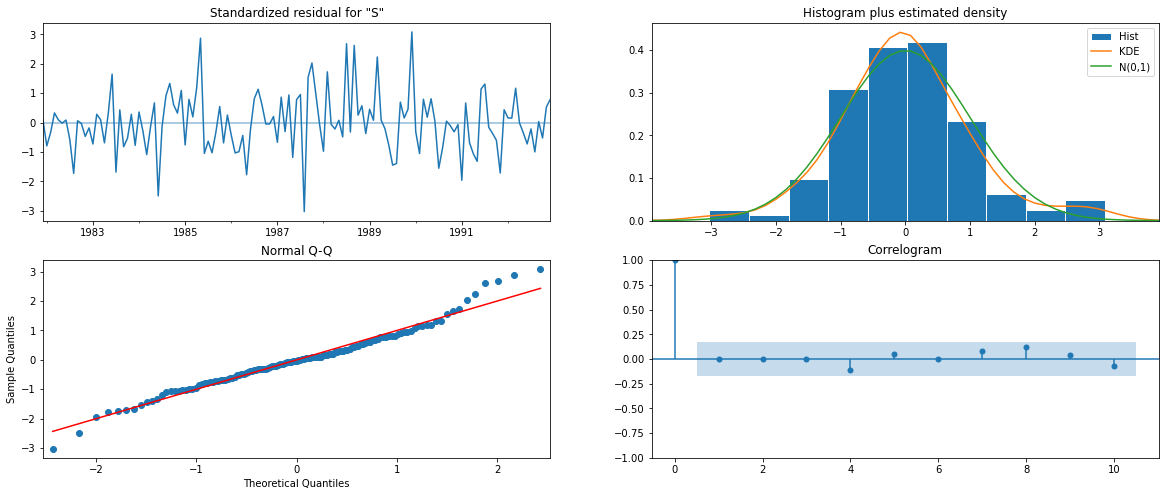

In [190]:
results_auto_SARIMA.plot_diagnostics();

In [191]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [192]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1993-01-01,2364.822492,293.903582,1788.782056,2940.862928
1993-02-01,3183.738896,297.390810,2600.863619,3766.614174
1993-03-01,3456.414668,299.349625,2869.700184,4043.129153
1993-04-01,2914.336703,309.533731,2307.661738,3521.011668
1993-05-01,3022.912788,317.156678,2401.297121,3644.528455


In [209]:
rmse1 = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean,squared=False)
print('RMSE:',rmse1)

RMSE: 601.7657096065248


/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


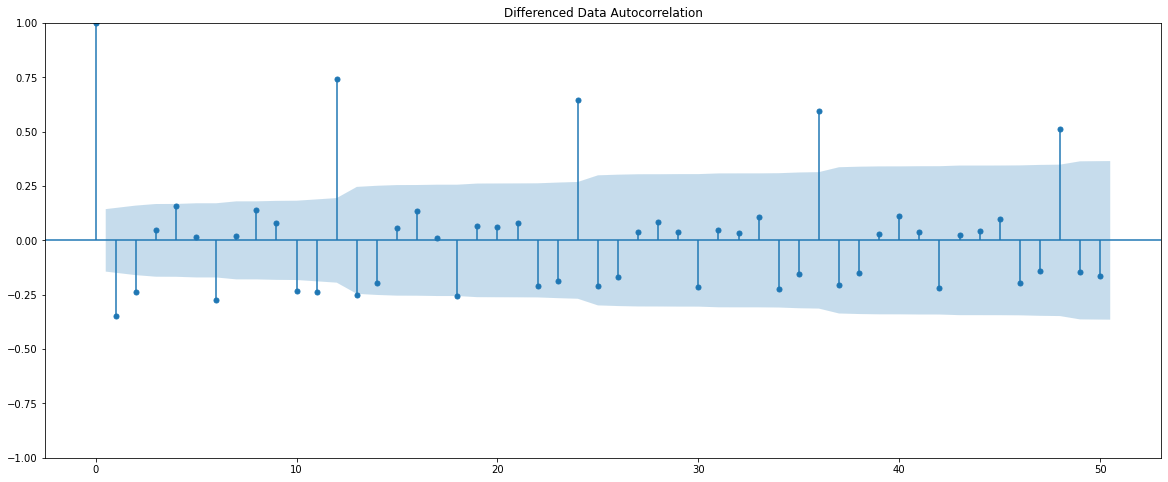

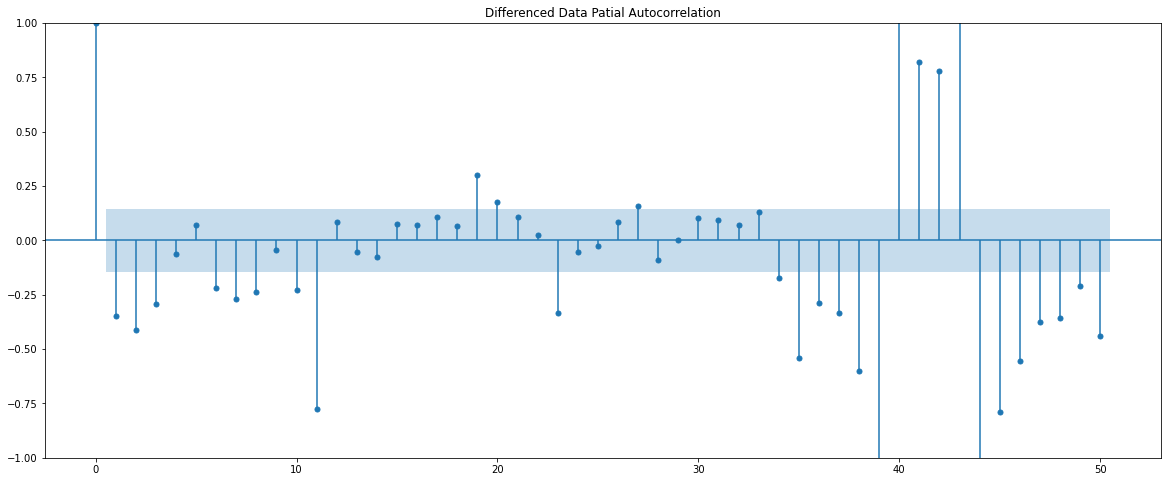

In [196]:
plot_acf(df2['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df2['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

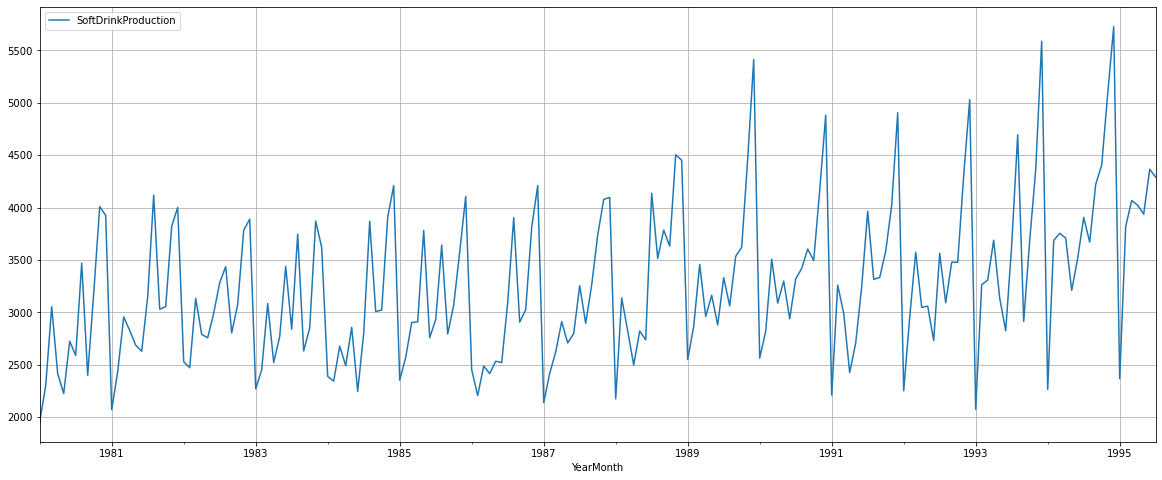

In [197]:
df2.plot()
plt.grid();

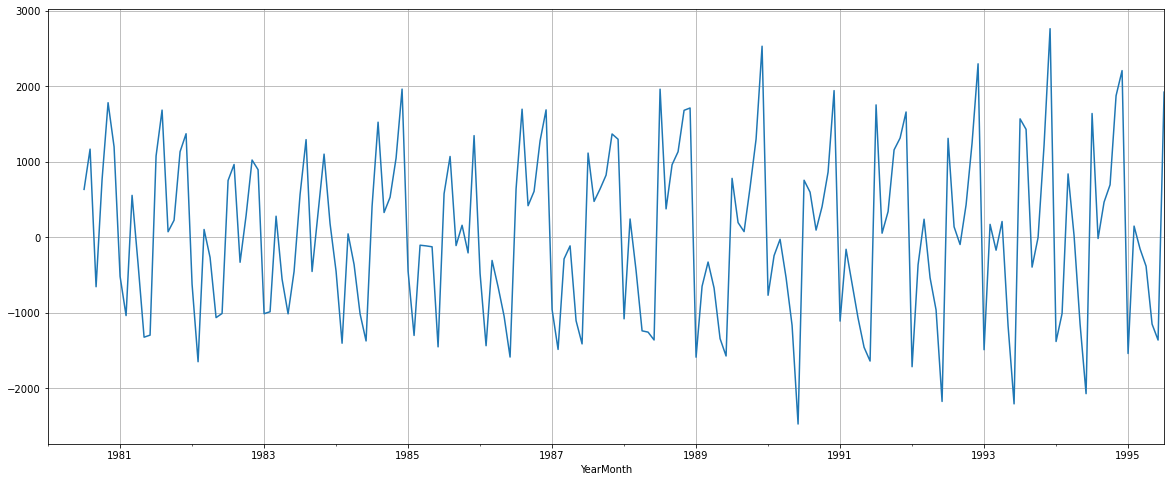

In [199]:
(df2['SoftDrinkProduction'].diff(6)).plot()
plt.grid();

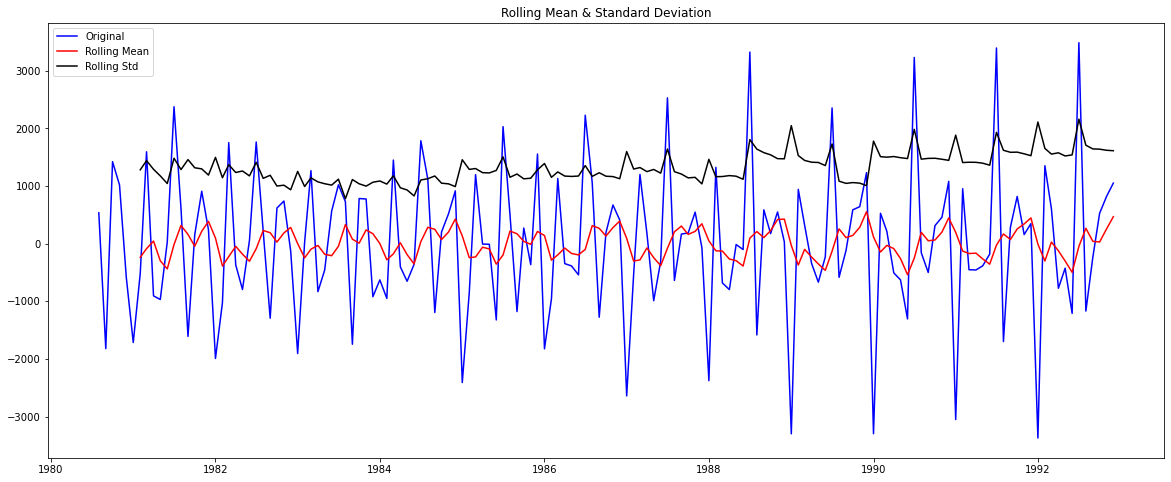

Results of Dickey-Fuller Test:
Test Statistic                -7.980548e+00
p-value                        2.630576e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64 



In [200]:
test_stationarity((train['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna())

/Users/swanandmarathe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


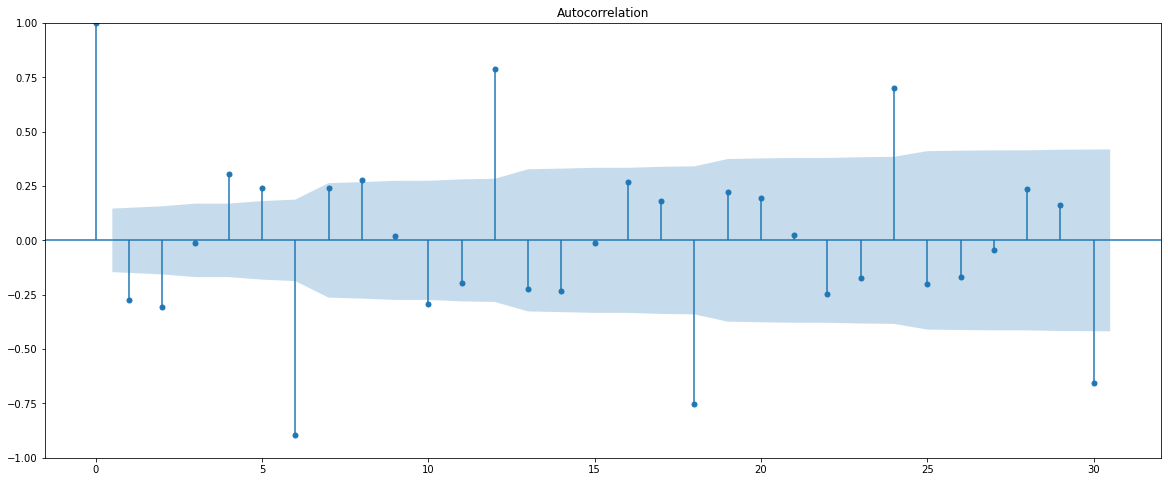

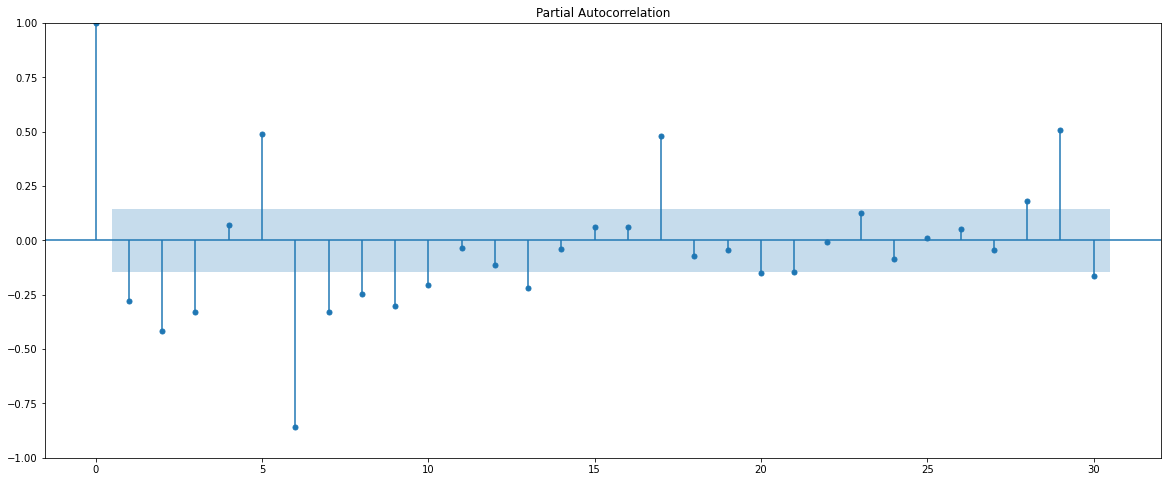

In [202]:
plot_acf((df2['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df2['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [203]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22838D+00    |proj g|=  1.33466D-01

At iterate    5    f=  6.21028D+00    |proj g|=  4.97916D-02

At iterate   10    f=  6.20979D+00    |proj g|=  3.79790D-04

At iterate   15    f=  6.20977D+00    |proj g|=  3.97956D-03

At iterate   20    f=  6.20718D+00    |proj g|=  7.99633D-02

At iterate   25    f=  6.19914D+00    |proj g|=  1.65276D-02

At iterate   30    f=  6.19906D+00    |proj g|=  7.52811D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

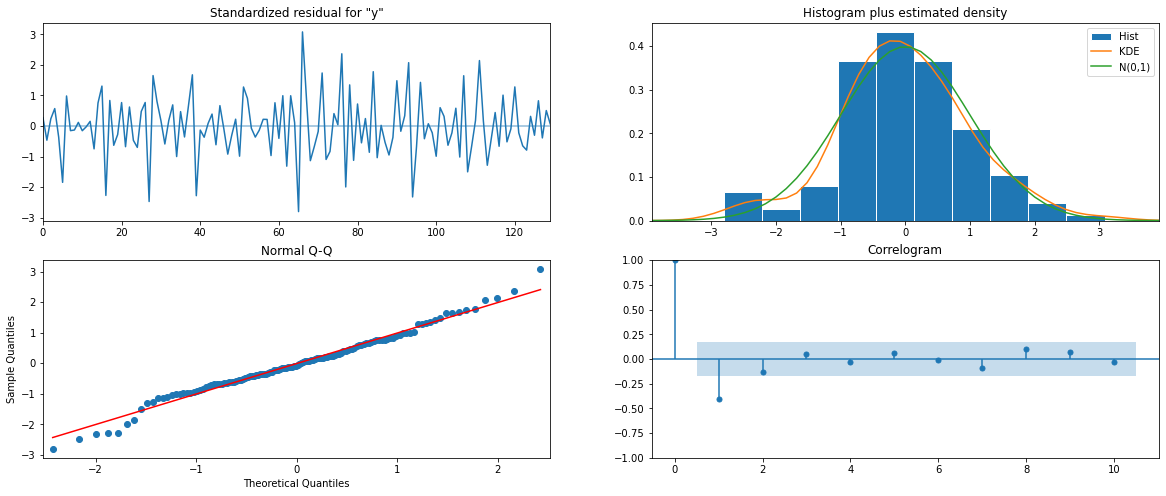

In [204]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [205]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [206]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2486.695776,408.080437,1686.872816,3286.518736
1,3221.206941,577.111973,2090.088259,4352.325623
2,3504.701177,706.814555,2119.370106,4890.032249
3,3053.061316,816.158931,1453.419204,4652.703427
4,3187.055486,912.493281,1398.601519,4975.509452


In [212]:
rmse2 = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse2)

521.358228356771


In [218]:
resultsDf = pd.DataFrame({'RMSE': [rmse1]}
                           ,index=['SARIMA(3,1,3)(2,0,3,6)'])

resultsDf

,RMSE
"SARIMA(3,1,3)(2,0,3,6)",601.76571


In [219]:
resultsDf2 = pd.DataFrame({'RMSE': [rmse2]}
                           ,index=['SARIMA2(1,0,1)(1,1,3,6)'])

resultsDf = pd.concat([resultsDf,resultsDf2])

resultsDf

,RMSE
"SARIMA(3,1,3)(2,0,3,6)",601.765710
"SARIMA2(1,0,1)(1,1,3,6)",521.358228


In [230]:
predicted_manual_SARIMA_6_full_data = results_manual_SARIMA_6.get_forecast(steps=12)

In [231]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2486.695776,408.080437,1686.872816,3286.518736
1,3221.206941,577.111973,2090.088259,4352.325623
2,3504.701177,706.814555,2119.370106,4890.032249
3,3053.061316,816.158931,1453.419204,4652.703427
4,3187.055486,912.493281,1398.601519,4975.509452


In [232]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31', freq='M'))

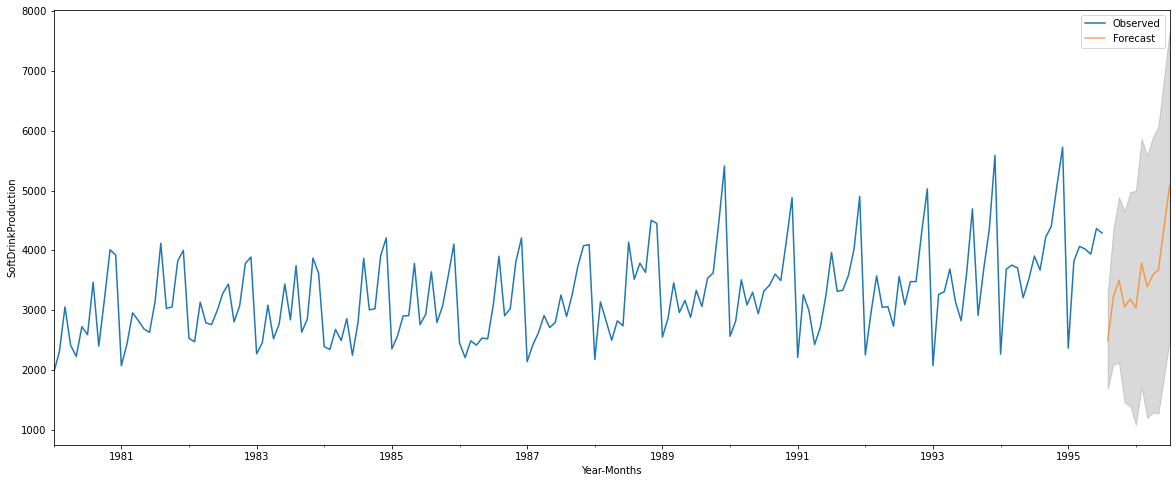

In [233]:
# plot the forecast along with the confidence band

axis = df2['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.show()